# Exploratory data analysis on JOSAA Engineering Schools Seat Allocation (JEE) dataset for Year 2022
### 1. The dataset is downloaded from kaggle.com.
### 2. This dataset contains data of JOSAA seat allocation for year 2022 . Admission to prestigious engineering college in india is done on the basis of marks in jee and this dataset can help summarise various statistics about : 
   ##### i) seats distribution across all Institues.
   ##### ii) seats distribution across all Quota.
   ##### iii) seats distribution across both Genders.
   ##### iv) seats distribution across all Academic Programs.
   ##### v) seats distribution across all Seat Type.
   ##### vi) seats distribution across all Round.
   ##### vii) seats distribution across all Institutes's and diiferent grouping (or combinations) between the following parameters :   Academicprogram , Quota, Seat Type and Gender.
   ##### viii) seats distribution across all IIT's and diiferent grouping between the following parameters :  Academic program , Seat Type and   Gender.
   ##### ix) seats distribution across all IIT's based on Computer Science Program and diiferent grouping between the following parameters :  4     year btech or 5 year integrated btech+mtech, Seat Type and Gender.
   ##### x) seats distribution across all NIT's and diiferent grouping between the following parameters :  Academic program , Quota, Seat Type       Gender.
  ##### xi) seats distribution across all NIT's based on Computer Science Program and diiferent grouping between the following parameters :        Academic program , Quota, Seat Type and Gender.
  ##### xii) seats distribution across National Institute of Technology Delhi(my college) both separately based on following parameters : Academic program ,      Quota, Seat Type and Gender and diiferent grouping (or combinations) between the following parameters :  Academic program , Quota,  Seat Type and Gender.






In [2]:
# Importing all the useful modules that we might use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# magic command that makes the plots generated by matplotlib show into the IPython shell that we are running and not in a separate output window

In [3]:
#firstly open the csv file and import this file into this analysis
josaa22_df=pd.read_csv(r"C:\Users\hp\Desktop\EDA\archive\2022.csv",encoding='latin1')
josaa22_df.head() # only first 5 rows are shown
#I like to check out how the table or dataframe look likes


Institute  \
0  Indian Institute of Technology Bhubaneswar   
1  Indian Institute of Technology Bhubaneswar   
2  Indian Institute of Technology Bhubaneswar   
3  Indian Institute of Technology Bhubaneswar   
4  Indian Institute of Technology Bhubaneswar   

                               Academic Program Name Quota Seat Type  \
0  Civil Engineering (4 Years, Bachelor of Techno...    AI      OPEN   
1  Civil Engineering (4 Years, Bachelor of Techno...    AI      OPEN   
2  Civil Engineering (4 Years, Bachelor of Techno...    AI       EWS   
3  Civil Engineering (4 Years, Bachelor of Techno...    AI       EWS   
4  Civil Engineering (4 Years, Bachelor of Techno...    AI   OBC-NCL   

                                  Gender Opening Rank Closing Rank  Year  \
0                         Gender-Neutral         9193        11771  2022   
1  Female-only (including Supernumerary)        16138        20164  2022   
2                         Gender-Neutral         1605         1744  2022   
3  Female-only (including Supernumerary)         3159         3159  2022   
4                         Gender-Neutral         3997         4297  2022   

   Round  
0      1  
1      1  
2      1  
3      1  
4      1

# Getting number of Rows and Columns of the dataframe


In [4]:
# It returns a tuple object showing number of rows and columns in our josaa22_df dataframe
josaa22_df.shape

(58874, 9)

###### There are 58874 rows and 9 columns in our dataframe

# Distinct values in every column of our dataframe

In [5]:
count_df=josaa22_df.nunique(axis=0).reset_index(name='Number').rename(columns={'index':'Categories'})
# nunique counts number of unique (or distinct) value in every column 
count_df

Categories  Number
0              Institute     114
1  Academic Program Name     189
2                  Quota       6
3              Seat Type      10
4                 Gender       2
5           Opening Rank   12535
6           Closing Rank   16134
7                   Year       1
8                  Round       6

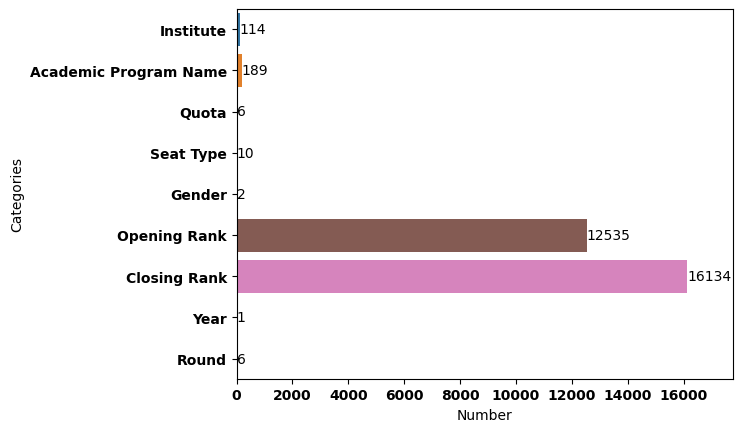

In [6]:
# plotting the above data using barplot
ax=sns.barplot(data=count_df,y='Categories',x='Number',orient='h')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

###### from the above data it is clear that :
1. There are 114 Institutes which participated in Jossa counseling process.
2. Total of 189 academic program were offered.
3. There were 6 quotas.
4. 10 types of seats for 2 genders.
5. There were 6 rounds in whole counselling process.

# Getting information about the dataframe

In [7]:
josaa22_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58874 entries, 0 to 58873
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Institute              58874 non-null  object
 1   Academic Program Name  58874 non-null  object
 2   Quota                  58874 non-null  object
 3   Seat Type              58874 non-null  object
 4   Gender                 58874 non-null  object
 5   Opening Rank           58874 non-null  object
 6   Closing Rank           58874 non-null  object
 7   Year                   58874 non-null  int64 
 8   Round                  58874 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 4.0+ MB


###### There are 2 int64 data types and 7 object data types , however the closing and opening rank should also be of  int64 dtype instead of object , so we have to change their data types 

# Cleaning the data

# Changing dtypes of opening and closing rank

In [8]:
josaa22_df['Closing Rank']=josaa22_df['Closing Rank'].astype('int64')
josaa22_df['Opening Rank']=josaa22_df['Opening Rank'].astype('int64')
josaa22_df.info()

ValueError: invalid literal for int() with base 10: '11P'

## As we can see some value in opening and closing rank column contains string elements like 'P'. hence we have to first replace those 'P' or any other string literal with default value 00 and then apply the change in dtype in order to tackle the above error

In [9]:
# rows containing any string elements in Opening Rank column
josaa22_df.loc[josaa22_df['Opening Rank'].str.contains('[a-zA-z]',regex=True)]


Institute  \
73     Indian Institute of Technology Bhubaneswar   
82     Indian Institute of Technology Bhubaneswar   
139         Indian Institute of Technology Bombay   
142         Indian Institute of Technology Bombay   
160         Indian Institute of Technology Bombay   
...                                           ...   
51860        Indian Institute of Technology Jammu   
51870        Indian Institute of Technology Jammu   
51889      Indian Institute of Technology Dharwad   
51894      Indian Institute of Technology Dharwad   
51925      Indian Institute of Technology Dharwad   

                                   Academic Program Name Quota      Seat Type  \
73     Electronics and Communication Engineering (4 Y...    AI      EWS (PwD)   
82     Mechanical Engineering (4 Years, Bachelor of T...    AI     OPEN (PwD)   
139    Aerospace Engineering (4 Years, Bachelor of Te...    AI  OBC-NCL (PwD)   
142    Aerospace Engineering (4 Years, Bachelor of Te...    AI       SC (PwD)   
160    Chemical Engineering (4 Years, Bachelor of Tec...    AI  OBC-NCL (PwD)   
...                                                  ...   ...            ...   
51860  Materials Engineering (4 Years, Bachelor of Te...    AI             ST   
51870  Mechanical Engineering (4 Years, Bachelor of T...    AI             ST   
51889  Computer Science and Engineering (4 Years, Bac...    AI     OPEN (PwD)   
51894  Computer Science and Engineering (4 Years, Bac...    AI  OBC-NCL (PwD)   
51925  Interdisciplinary Sciences (5 Years, Bachelor ...    AI             ST   

                                      Gender Opening Rank Closing Rank  Year  \
73                            Gender-Neutral          11P          11P  2022   
82                            Gender-Neutral          68P          68P  2022   
139                           Gender-Neutral          14P          14P  2022   
142                           Gender-Neutral           8P           8P  2022   
160                           Gender-Neutral          10P          13P  2022   
...                                      ...          ...          ...   ...   
51860  Female-only (including Supernumerary)         258P         258P  2022   
51870  Female-only (including Supernumerary)         199P         199P  2022   
51889                         Gender-Neutral           4P           4P  2022   
51894                         Gender-Neutral          35P          35P  2022   
51925  Female-only (including Supernumerary)         370P         370P  2022   

       Round  
73         1  
82         1  
139        1  
142        1  
160        1  
...      ...  
51860      6  
51870      6  
51889      6  
51894      6  
51925      6  

[500 rows x 9 columns]

In [10]:
# replacing those 'P' values with taking 00 as default for Opening Rank

josaa22_df.loc[josaa22_df['Opening Rank'].str.contains('[a-zA-z]',regex=True),'Opening Rank']=josaa22_df.loc[josaa22_df['Opening Rank'].str.contains('[a-zA-z]',regex=True)]['Opening Rank'].str.replace('[a-zA-z]','00',regex=True)

josaa22_df.loc[josaa22_df['Opening Rank'].str.contains('[a-zA-z]',regex=True)]


Empty DataFrame
Columns: [Institute, Academic Program Name, Quota, Seat Type, Gender, Opening Rank, Closing Rank, Year, Round]
Index: []

In [11]:
# Similarly replacing those 'P' values with taking 00 as default for Closing Rank

josaa22_df.loc[josaa22_df['Closing Rank'].str.contains('[a-zA-z]',regex=True),'Closing Rank']=josaa22_df.loc[josaa22_df['Closing Rank'].str.contains('[a-zA-z]',regex=True)]['Closing Rank'].str.replace('[a-zA-z]','00',regex=True)
josaa22_df.loc[josaa22_df['Closing Rank'].str.contains('[a-zA-z]',regex=True)]

Empty DataFrame
Columns: [Institute, Academic Program Name, Quota, Seat Type, Gender, Opening Rank, Closing Rank, Year, Round]
Index: []

## Now we can change dtype easily without any error

In [12]:
josaa22_df['Closing Rank']=josaa22_df['Closing Rank'].astype('int64')
josaa22_df['Opening Rank']=josaa22_df['Opening Rank'].astype('int64')
josaa22_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58874 entries, 0 to 58873
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Institute              58874 non-null  object
 1   Academic Program Name  58874 non-null  object
 2   Quota                  58874 non-null  object
 3   Seat Type              58874 non-null  object
 4   Gender                 58874 non-null  object
 5   Opening Rank           58874 non-null  int64 
 6   Closing Rank           58874 non-null  int64 
 7   Year                   58874 non-null  int64 
 8   Round                  58874 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.0+ MB


###### Voila the task is finally done

# Finding number of missing values per column
#### if missing percentage for a column is more than  or equal to 50% meaning half or more than half values in that column are missing. we will simply drop those column(s)

In [13]:
josaa22_df.isnull().sum()

Institute                0
Academic Program Name    0
Quota                    0
Seat Type                0
Gender                   0
Opening Rank             0
Closing Rank             0
Year                     0
Round                    0
dtype: int64

###### Luckily we don't have any missing values

# Using describe method of pandas to get statistical relation between numeric data

In [14]:
josaa22_df.describe()

Opening Rank  Closing Rank     Year         Round
count   58874.000000   58874.00000  58874.0  58874.000000
mean    10614.602694   13011.23394   2022.0      3.486293
std     27563.385735   34213.02252      0.0      1.711186
min         1.000000       1.00000   2022.0      1.000000
25%      1189.250000    1424.00000   2022.0      2.000000
50%      3732.000000    4527.00000   2022.0      3.000000
75%     10065.000000   12060.00000   2022.0      5.000000
max    880196.000000  880196.00000   2022.0      6.000000

# As we are doing EDA on year 2022 dataset , the 'Year' column in our dataframe is redundant and hence we can drop that column

In [15]:
josaa22_df.drop(columns='Year',inplace=True)
josaa22_df.head()

Institute  \
0  Indian Institute of Technology Bhubaneswar   
1  Indian Institute of Technology Bhubaneswar   
2  Indian Institute of Technology Bhubaneswar   
3  Indian Institute of Technology Bhubaneswar   
4  Indian Institute of Technology Bhubaneswar   

                               Academic Program Name Quota Seat Type  \
0  Civil Engineering (4 Years, Bachelor of Techno...    AI      OPEN   
1  Civil Engineering (4 Years, Bachelor of Techno...    AI      OPEN   
2  Civil Engineering (4 Years, Bachelor of Techno...    AI       EWS   
3  Civil Engineering (4 Years, Bachelor of Techno...    AI       EWS   
4  Civil Engineering (4 Years, Bachelor of Techno...    AI   OBC-NCL   

                                  Gender  Opening Rank  Closing Rank  Round  
0                         Gender-Neutral          9193         11771      1  
1  Female-only (including Supernumerary)         16138         20164      1  
2                         Gender-Neutral          1605          1744      1  
3  Female-only (including Supernumerary)          3159          3159      1  
4                         Gender-Neutral          3997          4297      1

# Counting total number of seats per institute

In [16]:
josaa22_df.groupby(by='Institute').size().reset_index(name='Number of seats')

Institute  Number of seats
0                            Assam University, Silchar              314
1    Atal Bihari Vajpayee Indian Institute of Infor...              234
2         Birla Institute of Technology, Mesra, Ranchi              724
3                          Central University of Jammu              124
4           Central University of Rajasthan, Rajasthan               98
..                                                 ...              ...
109       School of Planning & Architecture, New Delhi               78
110      School of Planning & Architecture: Vijayawada               67
111  Shri Mata Vaishno Devi University, Katra, Jamm...               42
112                            University of Hyderabad               42
113  Visvesvaraya National Institute of Technology,...             1229

[114 rows x 2 columns]

# Counting total number of seats based on Gender offered combinedly by all Institutes

In [17]:
Gjosaa22_df=josaa22_df.groupby(by='Gender').size().reset_index(name='Number of seats')
Gjosaa22_df

Gender  Number of seats
0  Female-only (including Supernumerary)            22644
1                         Gender-Neutral            36230

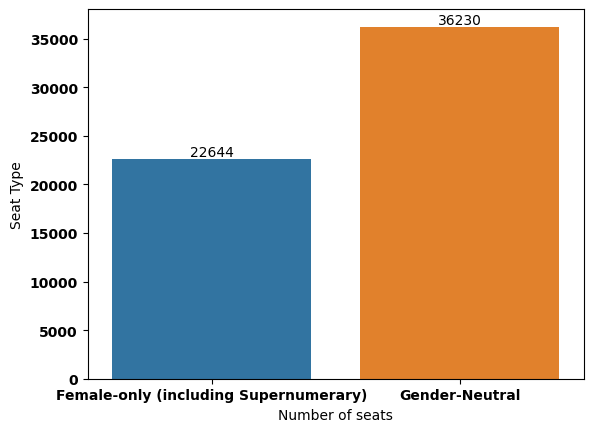

In [18]:
#Plotting the above data using barplot
ax=sns.barplot(data=Gjosaa22_df,x='Gender',y='Number of seats')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel('Seat Type')
plt.xlabel('Number of seats')
ax.bar_label(ax.containers[0])
plt.show()

# Counting total number of seats based on Seat Type offered combinedly by all Institutes

In [19]:
Sjosaa22_df=josaa22_df.groupby(by='Seat Type').size().reset_index(name='Number of seats')
Sjosaa22_df

Seat Type  Number of seats
0            EWS             9895
1      EWS (PwD)              560
2        OBC-NCL            10785
3  OBC-NCL (PwD)             1820
4           OPEN            11731
5     OPEN (PwD)             3248
6             SC            10791
7       SC (PwD)              386
8             ST             9465
9       ST (PwD)              193

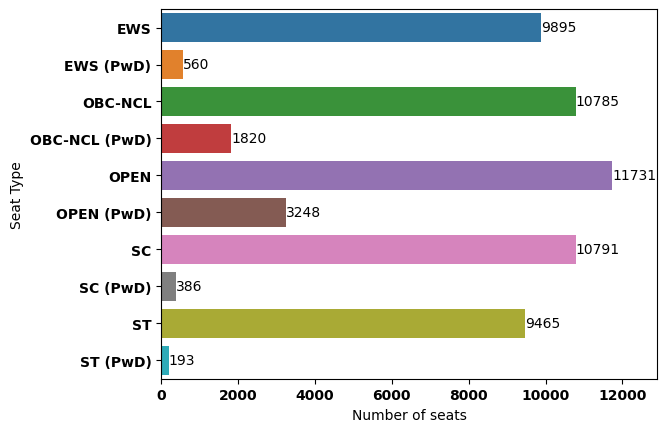

In [20]:
#Plotting the above data using barplot
ax=sns.barplot(data=Sjosaa22_df,y='Seat Type',x='Number of seats')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel('Seat Type')
plt.xlabel('Number of seats')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Grouping by Seat Type and  Quota offered combinedly by all Institutes

In [21]:
SQ_df=josaa22_df.groupby(by=['Seat Type','Quota']).size().reset_index(name='Number of seats')

SQ_df


Seat Type Quota  Number of seats
0             EWS    AI             4398
1             EWS    GO               16
2             EWS    HS             2599
3             EWS    JK               50
4             EWS    OS             2832
5       EWS (PwD)    AI              236
6       EWS (PwD)    HS               61
7       EWS (PwD)    OS              263
8         OBC-NCL    AI             4564
9         OBC-NCL    GO               54
10        OBC-NCL    HS             2828
11        OBC-NCL    JK               63
12        OBC-NCL    OS             3276
13  OBC-NCL (PwD)    AI              724
14  OBC-NCL (PwD)    HS              404
15  OBC-NCL (PwD)    JK                8
16  OBC-NCL (PwD)    OS              684
17           OPEN    AI             4824
18           OPEN    GO               60
19           OPEN    HS             3307
20           OPEN    JK               96
21           OPEN    LA               72
22           OPEN    OS             3372
23     OPEN (PwD)    AI             1336
24     OPEN (PwD)    GO               12
25     OPEN (PwD)    HS              800
26     OPEN (PwD)    JK               32
27     OPEN (PwD)    OS             1068
28             SC    AI             4656
29             SC    GO               24
30             SC    HS             2930
31             SC    JK               85
32             SC    OS             3096
33       SC (PwD)    AI              105
34       SC (PwD)    HS              105
35       SC (PwD)    OS              176
36             ST    AI             4152
37             ST    GO               36
38             ST    HS             2528
39             ST    JK               91
40             ST    OS             2658
41       ST (PwD)    AI               36
42       ST (PwD)    HS               43
43       ST (PwD)    OS              114

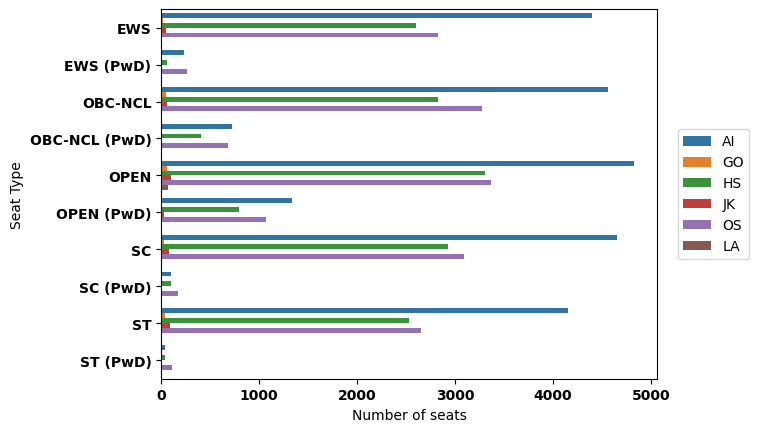

In [22]:
#Plotting the above data using barplot
sns.barplot(data=SQ_df,y='Seat Type',x='Number of seats',hue='Quota',orient='h')
plt.legend(bbox_to_anchor=(1.20, 0.5),loc='center right')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Seat Type and Gender offered combinedly by all Institutes

In [23]:
SG_df=josaa22_df.groupby(by=['Seat Type','Gender']).size().reset_index(name='Number of seats')

SG_df


Seat Type                                 Gender  Number of seats
0             EWS  Female-only (including Supernumerary)             3896
1             EWS                         Gender-Neutral             5999
2       EWS (PwD)  Female-only (including Supernumerary)               38
3       EWS (PwD)                         Gender-Neutral              522
4         OBC-NCL  Female-only (including Supernumerary)             4818
5         OBC-NCL                         Gender-Neutral             5967
6   OBC-NCL (PwD)  Female-only (including Supernumerary)              215
7   OBC-NCL (PwD)                         Gender-Neutral             1605
8            OPEN  Female-only (including Supernumerary)             5209
9            OPEN                         Gender-Neutral             6522
10     OPEN (PwD)  Female-only (including Supernumerary)              480
11     OPEN (PwD)                         Gender-Neutral             2768
12             SC  Female-only (including Supernumerary)             4514
13             SC                         Gender-Neutral             6277
14       SC (PwD)  Female-only (including Supernumerary)               12
15       SC (PwD)                         Gender-Neutral              374
16             ST  Female-only (including Supernumerary)             3456
17             ST                         Gender-Neutral             6009
18       ST (PwD)  Female-only (including Supernumerary)                6
19       ST (PwD)                         Gender-Neutral              187

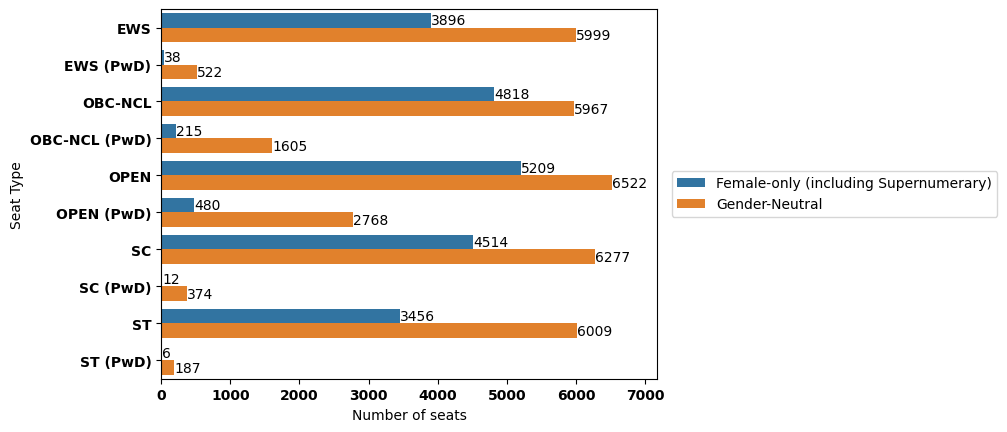

In [24]:
#Plotting the above data using barplot
ax=sns.barplot(data=SG_df,x='Number of seats',y='Seat Type',hue='Gender',orient='h')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
for container in ax.containers:
    ax.bar_label(container)
ax.margins(0.1,0.01)
plt.show()



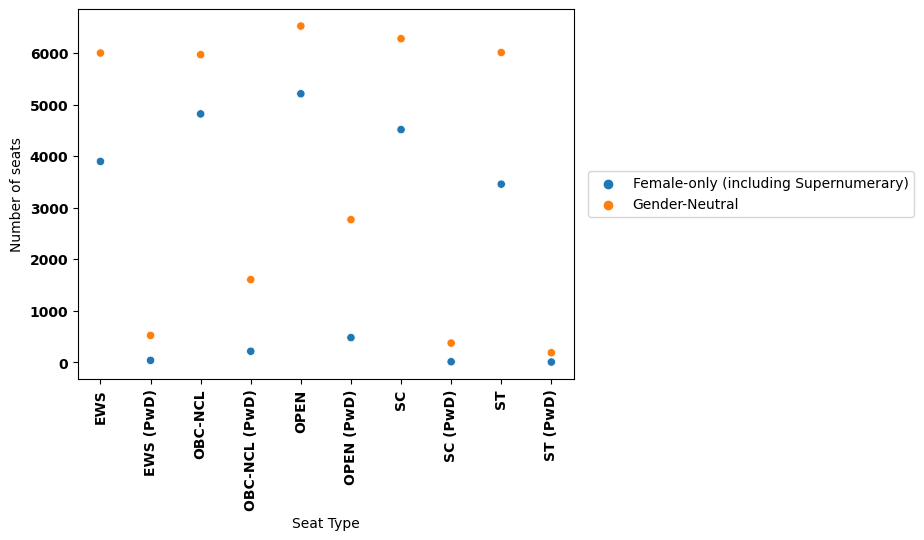

In [25]:
#Plotting the above data using Scatterplot
sns.scatterplot(data=SG_df,x='Seat Type',y='Number of seats',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Seat Type , Quota , Gender offered combinedly by all Institutes

In [26]:
SQG_df=josaa22_df.groupby(by=['Seat Type','Quota','Gender']).size().reset_index(name='Number of seats')
SQG_df

Seat Type Quota                                 Gender  Number of seats
0        EWS    AI  Female-only (including Supernumerary)             1656
1        EWS    AI                         Gender-Neutral             2742
2        EWS    GO  Female-only (including Supernumerary)                1
3        EWS    GO                         Gender-Neutral               15
4        EWS    HS  Female-only (including Supernumerary)             1069
..       ...   ...                                    ...              ...
75        ST    OS                         Gender-Neutral             1650
76  ST (PwD)    AI                         Gender-Neutral               36
77  ST (PwD)    HS                         Gender-Neutral               43
78  ST (PwD)    OS  Female-only (including Supernumerary)                6
79  ST (PwD)    OS                         Gender-Neutral              108

[80 rows x 4 columns]

# Grouping by Quota and Gender offered combinedly by all Institutes

In [27]:
QG_df=josaa22_df.groupby(by=['Quota','Gender']).size().reset_index(name='Number of seats')
QG_df

Quota                                 Gender  Number of seats
0     AI  Female-only (including Supernumerary)             9191
1     AI                         Gender-Neutral            15840
2     GO  Female-only (including Supernumerary)               68
3     GO                         Gender-Neutral              134
4     HS  Female-only (including Supernumerary)             6214
5     HS                         Gender-Neutral             9391
6     JK  Female-only (including Supernumerary)              154
7     JK                         Gender-Neutral              271
8     LA  Female-only (including Supernumerary)               24
9     LA                         Gender-Neutral               48
10    OS  Female-only (including Supernumerary)             6993
11    OS                         Gender-Neutral            10546

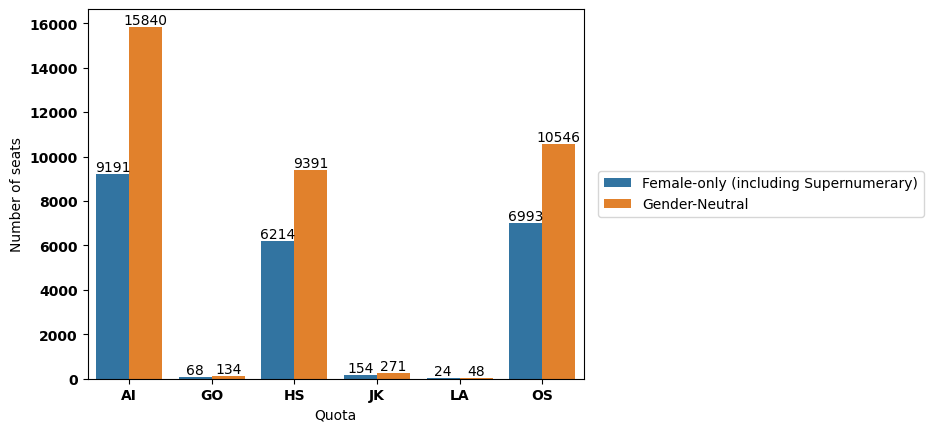

In [28]:
#Plotting the above data using barplot
ax=sns.barplot(data=QG_df,y='Number of seats',x='Quota',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


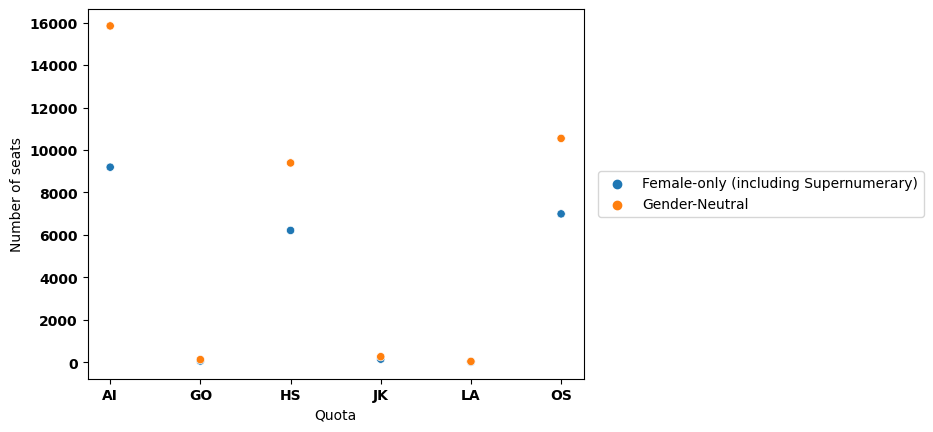

In [29]:
# Plotting the above data using Scatterplot
sns.scatterplot(data=QG_df,x='Quota',y='Number of seats',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Round offered combinedly by all Institutes

In [30]:
R_df=josaa22_df['Round'].value_counts().reset_index(name='Number of seats')
R_df

index  Number of seats
0      1            10022
1      2             9816
2      3             9773
3      4             9768
4      5             9763
5      6             9732

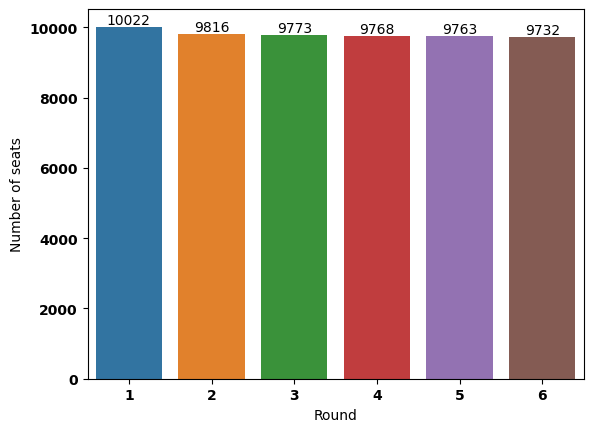

In [31]:
#Plotting the above data using barplot
ax=sns.barplot(data=R_df,x='index',y='Number of seats')
plt.xticks(fontweight='bold')
plt.xlabel('Round')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()


# Grouping by Round and Seat Type offered combinedly by all Institutes 

In [32]:
RS_df=josaa22_df.groupby(by=['Round','Seat Type']).size().reset_index(name='Number of seats')
RS_df

Round      Seat Type  Number of seats
0       1            EWS             1661
1       1      EWS (PwD)              120
2       1        OBC-NCL             1808
3       1  OBC-NCL (PwD)              363
4       1           OPEN             1956
5       1     OPEN (PwD)              615
6       1             SC             1804
7       1       SC (PwD)               72
8       1             ST             1586
9       1       ST (PwD)               37
10      2            EWS             1652
11      2      EWS (PwD)               93
12      2        OBC-NCL             1799
13      2  OBC-NCL (PwD)              300
14      2           OPEN             1955
15      2     OPEN (PwD)              547
16      2             SC             1798
17      2       SC (PwD)               63
18      2             ST             1577
19      2       ST (PwD)               32
20      3            EWS             1647
21      3      EWS (PwD)               87
22      3        OBC-NCL             1796
23      3  OBC-NCL (PwD)              292
24      3           OPEN             1955
25      3     OPEN (PwD)              527
26      3             SC             1798
27      3       SC (PwD)               63
28      3             ST             1577
29      3       ST (PwD)               31
30      4            EWS             1646
31      4      EWS (PwD)               88
32      4        OBC-NCL             1796
33      4  OBC-NCL (PwD)              291
34      4           OPEN             1955
35      4     OPEN (PwD)              525
36      4             SC             1798
37      4       SC (PwD)               63
38      4             ST             1575
39      4       ST (PwD)               31
40      5            EWS             1645
41      5      EWS (PwD)               88
42      5        OBC-NCL             1796
43      5  OBC-NCL (PwD)              289
44      5           OPEN             1955
45      5     OPEN (PwD)              524
46      5             SC             1797
47      5       SC (PwD)               63
48      5             ST             1575
49      5       ST (PwD)               31
50      6            EWS             1644
51      6      EWS (PwD)               84
52      6        OBC-NCL             1790
53      6  OBC-NCL (PwD)              285
54      6           OPEN             1955
55      6     OPEN (PwD)              510
56      6             SC             1796
57      6       SC (PwD)               62
58      6             ST             1575
59      6       ST (PwD)               31

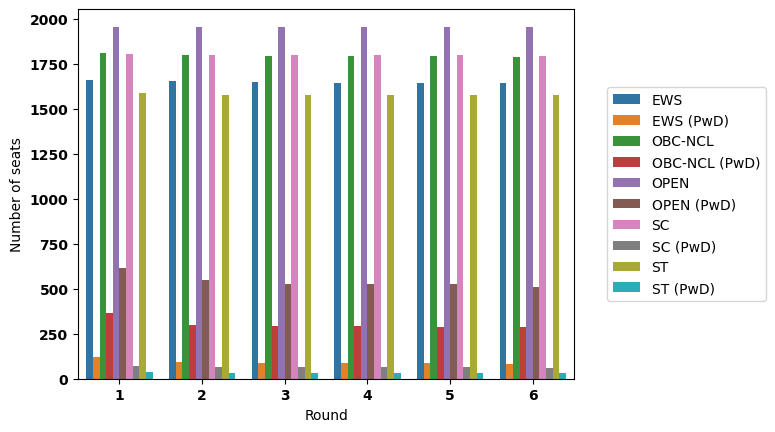

In [33]:
#Plotting the above data using barplot
ax=sns.barplot(data=RS_df,x='Round',y='Number of seats',hue='Seat Type')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.4, 0.5),loc='center right')
plt.show()

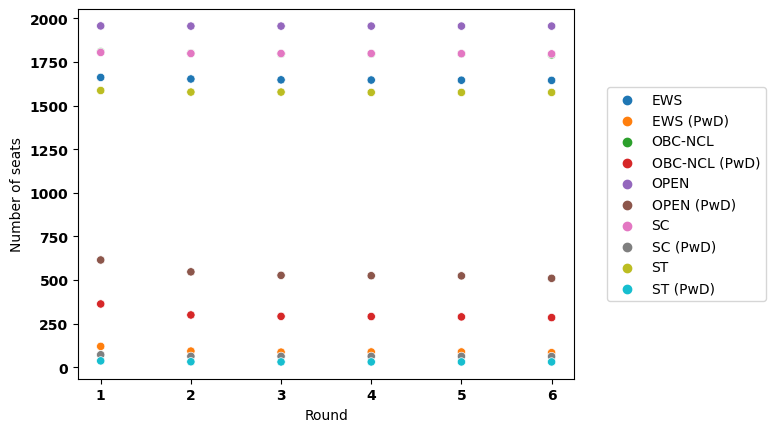

In [34]:
#Plotting the above data using Scatterplot
ax=sns.scatterplot(data=RS_df,x='Round',y='Number of seats',hue='Seat Type')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.4, 0.5),loc='center right')
plt.show()

# Grouping by Round and Quota offered combinedly by all Institutes

In [35]:
RQ_df=josaa22_df.groupby(by=['Round','Quota']).size().reset_index(name='Number of seats')
RQ_df

Round Quota  Number of seats
0       1    AI             4250
1       1    GO               38
2       1    HS             2659
3       1    JK               79
4       1    LA               12
5       1    OS             2984
6       2    AI             4178
7       2    GO               33
8       2    HS             2601
9       2    JK               70
10      2    LA               12
11      2    OS             2922
12      3    AI             4157
13      3    GO               33
14      3    HS             2592
15      3    JK               69
16      3    LA               12
17      3    OS             2910
18      4    AI             4155
19      4    GO               33
20      4    HS             2589
21      4    JK               69
22      4    LA               12
23      4    OS             2910
24      5    AI             4155
25      5    GO               33
26      5    HS             2584
27      5    JK               69
28      5    LA               12
29      5    OS             2910
30      6    AI             4136
31      6    GO               32
32      6    HS             2580
33      6    JK               69
34      6    LA               12
35      6    OS             2903

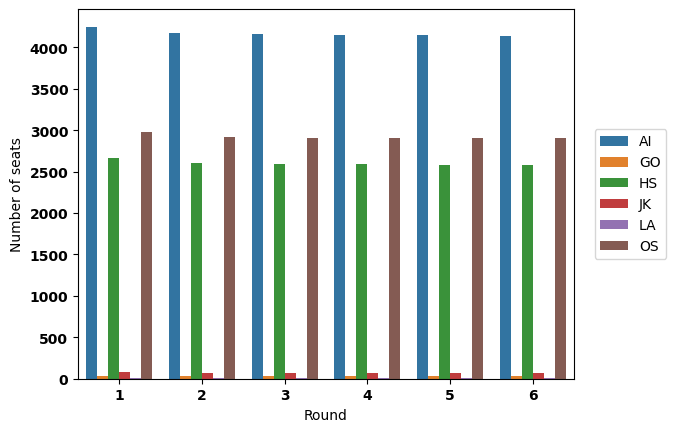

In [36]:
# Plotting the above data using barplot
ax=sns.barplot(data=RQ_df,x='Round',y='Number of seats',hue='Quota')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 0.5),loc='center right')
plt.show()

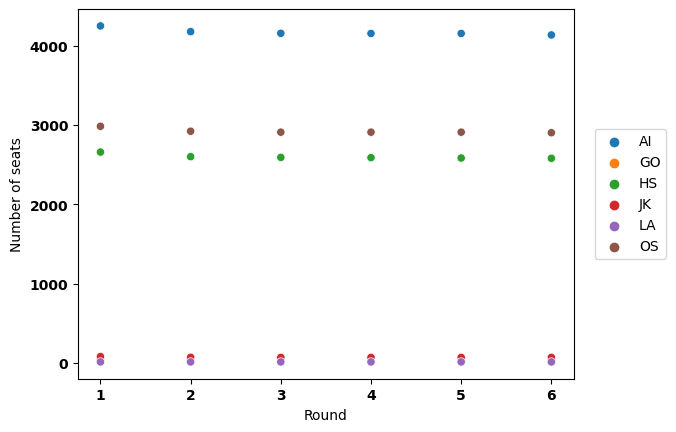

In [37]:
#Plotting the above data using Scatterplot
ax=sns.scatterplot(data=RQ_df,x='Round',y='Number of seats',hue='Quota')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 0.5),loc='center right')
plt.show()

# Grouping by Round and Gender offered combinedly by all Institutes

In [38]:
RG_df=josaa22_df.groupby(by=['Round','Gender']).size().reset_index(name='Number of seats')
RG_df

Round                                 Gender  Number of seats
0       1  Female-only (including Supernumerary)             3805
1       1                         Gender-Neutral             6217
2       2  Female-only (including Supernumerary)             3775
3       2                         Gender-Neutral             6041
4       3  Female-only (including Supernumerary)             3770
5       3                         Gender-Neutral             6003
6       4  Female-only (including Supernumerary)             3769
7       4                         Gender-Neutral             5999
8       5  Female-only (including Supernumerary)             3768
9       5                         Gender-Neutral             5995
10      6  Female-only (including Supernumerary)             3757
11      6                         Gender-Neutral             5975

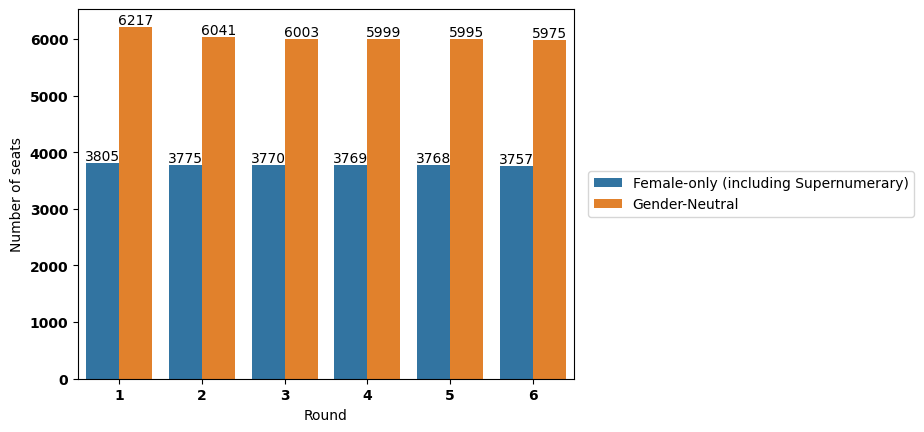

In [39]:
#Plotting the above data using barplot
ax=sns.barplot(data=RG_df,x='Round',y='Number of seats',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
for container in ax.containers:
    ax.bar_label(container)

plt.show()


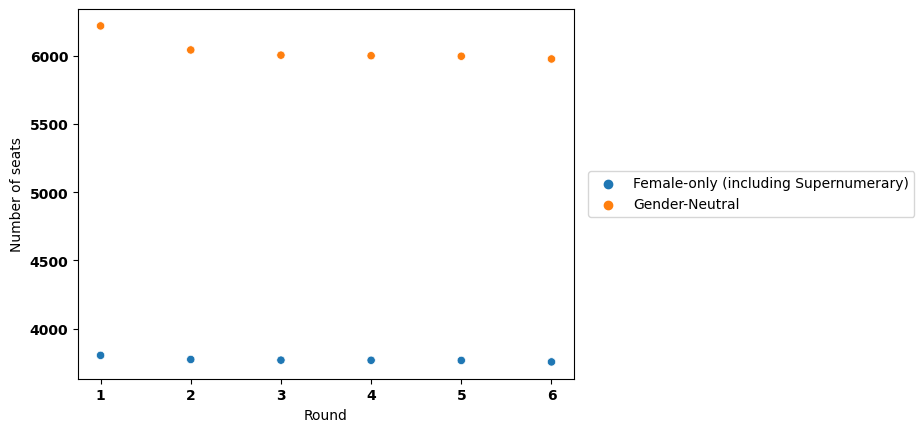

In [40]:
#Plotting the above data using Scatterplot
ax=sns.scatterplot(data=RG_df,x='Round',y='Number of seats',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Academic Program Name offered combinedly by all Institutes

In [41]:
Ajosaa22_df=josaa22_df.groupby(by='Academic Program Name').size().reset_index(name='Number of seats')
Ajosaa22_df

Academic Program Name  Number of seats
0    Aerospace Engineering (4 Years, Bachelor of Te...              439
1    Aerospace Engineering (5 Years, Bachelor and M...               90
2    Agricultural Engineering (4 Years, Bachelor of...              114
3    Agricultural and Food Engineering (4 Years, Ba...               60
4    Agricultural and Food Engineering with M.Tech....               60
..                                                 ...              ...
184  Production and Industrial Engineering (4 Years...              604
185  Quantitative Economics & Data Science (5 Years...               54
186  Smart Manufacturing (4 Years, Bachelor of Tech...              122
187  Statistics and Data Science (4 Years, Bachelor...               60
188  Textile Technology (4 Years, Bachelor of Techn...              163

[189 rows x 2 columns]

# Grouping by Academic Program Name and Seat Type offered combinedly by all Institutes

In [42]:
ASjosaa22_df=josaa22_df.groupby(by=['Academic Program Name','Seat Type']).size().reset_index(name='Number of seats')
ASjosaa22_df

Academic Program Name      Seat Type  \
0     Aerospace Engineering (4 Years, Bachelor of Te...            EWS   
1     Aerospace Engineering (4 Years, Bachelor of Te...        OBC-NCL   
2     Aerospace Engineering (4 Years, Bachelor of Te...  OBC-NCL (PwD)   
3     Aerospace Engineering (4 Years, Bachelor of Te...           OPEN   
4     Aerospace Engineering (4 Years, Bachelor of Te...     OPEN (PwD)   
...                                                 ...            ...   
1114  Textile Technology (4 Years, Bachelor of Techn...        OBC-NCL   
1115  Textile Technology (4 Years, Bachelor of Techn...  OBC-NCL (PwD)   
1116  Textile Technology (4 Years, Bachelor of Techn...           OPEN   
1117  Textile Technology (4 Years, Bachelor of Techn...             SC   
1118  Textile Technology (4 Years, Bachelor of Techn...             ST   

      Number of seats  
0                  78  
1                  72  
2                  12  
3                  84  
4                  31  
...               ...  
1114               36  
1115                1  
1116               36  
1117               36  
1118               24  

[1119 rows x 3 columns]

# Grouping by Academic Program Name and Quota offered combinedly by all Institutes

In [43]:
AQjosaa22_df=josaa22_df.groupby(by=['Academic Program Name','Quota']).size().reset_index(name='Number of seats')
AQjosaa22_df

Academic Program Name Quota  Number of seats
0    Aerospace Engineering (4 Years, Bachelor of Te...    AI              271
1    Aerospace Engineering (4 Years, Bachelor of Te...    HS               78
2    Aerospace Engineering (4 Years, Bachelor of Te...    OS               90
3    Aerospace Engineering (5 Years, Bachelor and M...    AI               90
4    Agricultural Engineering (4 Years, Bachelor of...    AI               60
..                                                 ...   ...              ...
315  Smart Manufacturing (4 Years, Bachelor of Tech...    AI              122
316  Statistics and Data Science (4 Years, Bachelor...    AI               60
317  Textile Technology (4 Years, Bachelor of Techn...    AI               60
318  Textile Technology (4 Years, Bachelor of Techn...    HS               42
319  Textile Technology (4 Years, Bachelor of Techn...    OS               61

[320 rows x 3 columns]

# Grouping by Academic Program Name and Gender offered combinedly by all Institutes

In [44]:
AQjosaa22_df=josaa22_df.groupby(by=['Academic Program Name','Gender']).size().reset_index(name='Number of seats')
AQjosaa22_df

Academic Program Name  \
0    Aerospace Engineering (4 Years, Bachelor of Te...   
1    Aerospace Engineering (4 Years, Bachelor of Te...   
2    Aerospace Engineering (5 Years, Bachelor and M...   
3    Aerospace Engineering (5 Years, Bachelor and M...   
4    Agricultural Engineering (4 Years, Bachelor of...   
..                                                 ...   
348  Smart Manufacturing (4 Years, Bachelor of Tech...   
349  Statistics and Data Science (4 Years, Bachelor...   
350  Statistics and Data Science (4 Years, Bachelor...   
351  Textile Technology (4 Years, Bachelor of Techn...   
352  Textile Technology (4 Years, Bachelor of Techn...   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)              168  
1                           Gender-Neutral              271  
2    Female-only (including Supernumerary)               30  
3                           Gender-Neutral               60  
4    Female-only (including Supernumerary)               42  
..                                     ...              ...  
348                         Gender-Neutral               62  
349  Female-only (including Supernumerary)               24  
350                         Gender-Neutral               36  
351  Female-only (including Supernumerary)               78  
352                         Gender-Neutral               85  

[353 rows x 3 columns]

# Grouping by Academic Program Name, Quota and Seat Type offered combinedly by all Institutes

In [45]:
AQSjosaa22_df=josaa22_df.groupby(by=['Academic Program Name','Quota','Seat Type']).size().reset_index(name='Number of seats')
AQSjosaa22_df

Academic Program Name Quota      Seat Type  \
0     Aerospace Engineering (4 Years, Bachelor of Te...    AI            EWS   
1     Aerospace Engineering (4 Years, Bachelor of Te...    AI        OBC-NCL   
2     Aerospace Engineering (4 Years, Bachelor of Te...    AI  OBC-NCL (PwD)   
3     Aerospace Engineering (4 Years, Bachelor of Te...    AI           OPEN   
4     Aerospace Engineering (4 Years, Bachelor of Te...    AI     OPEN (PwD)   
...                                                 ...   ...            ...   
1795  Textile Technology (4 Years, Bachelor of Techn...    OS        OBC-NCL   
1796  Textile Technology (4 Years, Bachelor of Techn...    OS  OBC-NCL (PwD)   
1797  Textile Technology (4 Years, Bachelor of Techn...    OS           OPEN   
1798  Textile Technology (4 Years, Bachelor of Techn...    OS             SC   
1799  Textile Technology (4 Years, Bachelor of Techn...    OS             ST   

      Number of seats  
0                  48  
1                  48  
2                   6  
3                  48  
4                  19  
...               ...  
1795               12  
1796                1  
1797               12  
1798               12  
1799               12  

[1800 rows x 4 columns]

# Grouping by Academic Program Name, Quota and Gender offered combinedly by all Institutes

In [46]:
AQGjosaa22_df=josaa22_df.groupby(by=['Academic Program Name','Quota','Gender']).size().reset_index(name='Number of seats')
AQGjosaa22_df

Academic Program Name Quota  \
0    Aerospace Engineering (4 Years, Bachelor of Te...    AI   
1    Aerospace Engineering (4 Years, Bachelor of Te...    AI   
2    Aerospace Engineering (4 Years, Bachelor of Te...    HS   
3    Aerospace Engineering (4 Years, Bachelor of Te...    HS   
4    Aerospace Engineering (4 Years, Bachelor of Te...    OS   
..                                                 ...   ...   
580  Textile Technology (4 Years, Bachelor of Techn...    AI   
581  Textile Technology (4 Years, Bachelor of Techn...    HS   
582  Textile Technology (4 Years, Bachelor of Techn...    HS   
583  Textile Technology (4 Years, Bachelor of Techn...    OS   
584  Textile Technology (4 Years, Bachelor of Techn...    OS   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)              120  
1                           Gender-Neutral              151  
2    Female-only (including Supernumerary)               24  
3                           Gender-Neutral               54  
4    Female-only (including Supernumerary)               24  
..                                     ...              ...  
580                         Gender-Neutral               30  
581  Female-only (including Supernumerary)               18  
582                         Gender-Neutral               24  
583  Female-only (including Supernumerary)               30  
584                         Gender-Neutral               31  

[585 rows x 4 columns]

# Grouping by Academic Program Name, Quota ,Seat Type and Gender offered combinedly by all Institutes

In [47]:
AQSGjosaa22_df=josaa22_df.groupby(by=['Academic Program Name','Quota','Seat Type','Gender']).size().reset_index(name='Number of seats')
AQSGjosaa22_df

Academic Program Name Quota      Seat Type  \
0     Aerospace Engineering (4 Years, Bachelor of Te...    AI            EWS   
1     Aerospace Engineering (4 Years, Bachelor of Te...    AI            EWS   
2     Aerospace Engineering (4 Years, Bachelor of Te...    AI        OBC-NCL   
3     Aerospace Engineering (4 Years, Bachelor of Te...    AI        OBC-NCL   
4     Aerospace Engineering (4 Years, Bachelor of Te...    AI  OBC-NCL (PwD)   
...                                                 ...   ...            ...   
2874  Textile Technology (4 Years, Bachelor of Techn...    OS           OPEN   
2875  Textile Technology (4 Years, Bachelor of Techn...    OS             SC   
2876  Textile Technology (4 Years, Bachelor of Techn...    OS             SC   
2877  Textile Technology (4 Years, Bachelor of Techn...    OS             ST   
2878  Textile Technology (4 Years, Bachelor of Techn...    OS             ST   

                                     Gender  Number of seats  
0     Female-only (including Supernumerary)               24  
1                            Gender-Neutral               24  
2     Female-only (including Supernumerary)               24  
3                            Gender-Neutral               24  
4                            Gender-Neutral                6  
...                                     ...              ...  
2874                         Gender-Neutral                6  
2875  Female-only (including Supernumerary)                6  
2876                         Gender-Neutral                6  
2877  Female-only (including Supernumerary)                6  
2878                         Gender-Neutral                6  

[2879 rows x 5 columns]

# Finding number of seats for different tier institutes like IIT's , NIT's and others

In [48]:
josaa22_df.head()

Institute  \
0  Indian Institute of Technology Bhubaneswar   
1  Indian Institute of Technology Bhubaneswar   
2  Indian Institute of Technology Bhubaneswar   
3  Indian Institute of Technology Bhubaneswar   
4  Indian Institute of Technology Bhubaneswar   

                               Academic Program Name Quota Seat Type  \
0  Civil Engineering (4 Years, Bachelor of Techno...    AI      OPEN   
1  Civil Engineering (4 Years, Bachelor of Techno...    AI      OPEN   
2  Civil Engineering (4 Years, Bachelor of Techno...    AI       EWS   
3  Civil Engineering (4 Years, Bachelor of Techno...    AI       EWS   
4  Civil Engineering (4 Years, Bachelor of Techno...    AI   OBC-NCL   

                                  Gender  Opening Rank  Closing Rank  Round  
0                         Gender-Neutral          9193         11771      1  
1  Female-only (including Supernumerary)         16138         20164      1  
2                         Gender-Neutral          1605          1744      1  
3  Female-only (including Supernumerary)          3159          3159      1  
4                         Gender-Neutral          3997          4297      1

# For Indian Institute of Technology's or IIT's

In [49]:
# Creating a IIT dataframe from josaa22_df using all rows where institute name contains Indian Institute of Technology
IIT_df=josaa22_df.loc[(josaa22_df['Institute'].str.contains('Indian Institute of Technology',regex=True))]
IIT_df

Institute  \
0      Indian Institute of Technology Bhubaneswar   
1      Indian Institute of Technology Bhubaneswar   
2      Indian Institute of Technology Bhubaneswar   
3      Indian Institute of Technology Bhubaneswar   
4      Indian Institute of Technology Bhubaneswar   
...                                           ...   
51940      Indian Institute of Technology Dharwad   
51941      Indian Institute of Technology Dharwad   
51942      Indian Institute of Technology Dharwad   
51943      Indian Institute of Technology Dharwad   
51944      Indian Institute of Technology Dharwad   

                                   Academic Program Name Quota Seat Type  \
0      Civil Engineering (4 Years, Bachelor of Techno...    AI      OPEN   
1      Civil Engineering (4 Years, Bachelor of Techno...    AI      OPEN   
2      Civil Engineering (4 Years, Bachelor of Techno...    AI       EWS   
3      Civil Engineering (4 Years, Bachelor of Techno...    AI       EWS   
4      Civil Engineering (4 Years, Bachelor of Techno...    AI   OBC-NCL   
...                                                  ...   ...       ...   
51940  Mechanical Engineering (4 Years, Bachelor of T...    AI   OBC-NCL   
51941  Mechanical Engineering (4 Years, Bachelor of T...    AI        SC   
51942  Mechanical Engineering (4 Years, Bachelor of T...    AI        SC   
51943  Mechanical Engineering (4 Years, Bachelor of T...    AI        ST   
51944  Mechanical Engineering (4 Years, Bachelor of T...    AI        ST   

                                      Gender  Opening Rank  Closing Rank  \
0                             Gender-Neutral          9193         11771   
1      Female-only (including Supernumerary)         16138         20164   
2                             Gender-Neutral          1605          1744   
3      Female-only (including Supernumerary)          3159          3159   
4                             Gender-Neutral          3997          4297   
...                                      ...           ...           ...   
51940  Female-only (including Supernumerary)          7459          8884   
51941                         Gender-Neutral          1709          2379   
51942  Female-only (including Supernumerary)          3122          3122   
51943                         Gender-Neutral          1044          1095   
51944  Female-only (including Supernumerary)          1389          1389   

       Round  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
51940      6  
51941      6  
51942      6  
51943      6  
51944      6  

[16881 rows x 8 columns]

## Finding number of rows and columns 

In [50]:
# returns a tuple showing number of rows and columns
IIT_df.shape

(16881, 8)

## Counting number of distinct values per column 

In [51]:
IITcount_df=IIT_df.nunique(axis=0).reset_index().rename(columns={'index':'Categories',0:'Number'})
IITcount_df

Categories  Number
0              Institute      23
1  Academic Program Name     119
2                  Quota       1
3              Seat Type      10
4                 Gender       2
5           Opening Rank    3239
6           Closing Rank    4197
7                  Round       6

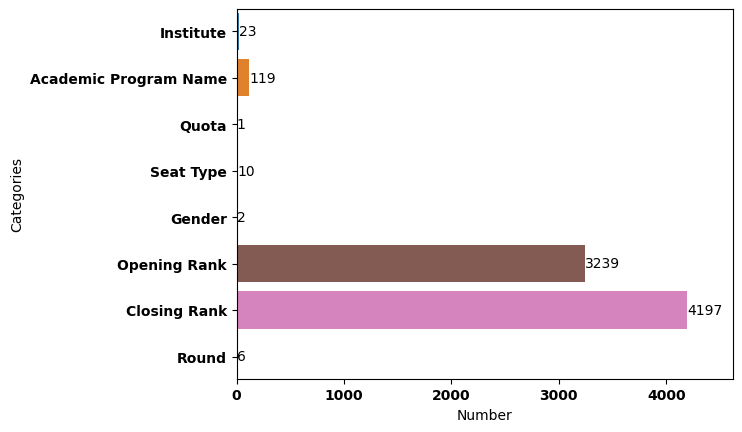

In [52]:
#Plotting the above data using barplot
ax=sns.barplot(data=IITcount_df,y='Categories',x='Number',orient='h')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)

plt.show()

#### From the above data it is clear that :
1. There are 23 IIT's which participated in Jossa counseling process.
2. Total of 119 academic program were offered.
3. Quota is 1 since IIT's seat are for all india domain. There is no reservation for home state students unlike NIT's

# Total number of seats per IIT

In [53]:
TSIIT_df=IIT_df.groupby(by=['Institute']).size().reset_index(name='Number of seats')
TSIIT_df

Institute  Number of seats
0   Indian Institute of Technology (BHU) Varanasi             1411
1    Indian Institute of Technology (ISM) Dhanbad              902
2           Indian Institute of Technology Bhilai              288
3      Indian Institute of Technology Bhubaneswar              792
4           Indian Institute of Technology Bombay             1056
5            Indian Institute of Technology Delhi             1166
6          Indian Institute of Technology Dharwad              445
7      Indian Institute of Technology Gandhinagar              433
8              Indian Institute of Technology Goa              233
9         Indian Institute of Technology Guwahati              787
10       Indian Institute of Technology Hyderabad              858
11          Indian Institute of Technology Indore              331
12           Indian Institute of Technology Jammu              365
13         Indian Institute of Technology Jodhpur              549
14          Indian Institute of Technology Kanpur              936
15       Indian Institute of Technology Kharagpur             2228
16          Indian Institute of Technology Madras              870
17           Indian Institute of Technology Mandi              431
18        Indian Institute of Technology Palakkad              318
19           Indian Institute of Technology Patna              559
20         Indian Institute of Technology Roorkee             1140
21           Indian Institute of Technology Ropar              464
22        Indian Institute of Technology Tirupati              319

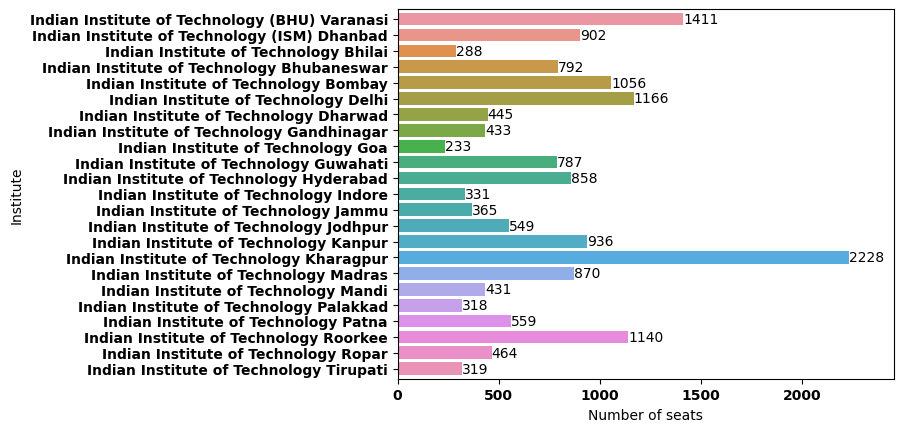

In [54]:
#Plotting the above data using barplot
ax=sns.barplot(data=TSIIT_df,y='Institute',x='Number of seats')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Counting total number of seats based on Seat Type for IIT's


In [55]:
SIIT_df=IIT_df['Seat Type'].value_counts().reset_index()
SIIT_df

index  Seat Type
0           OPEN       3324
1        OBC-NCL       3250
2             SC       3246
3            EWS       3030
4             ST       2802
5     OPEN (PwD)        637
6  OBC-NCL (PwD)        393
7      EWS (PwD)        126
8       SC (PwD)         55
9       ST (PwD)         18

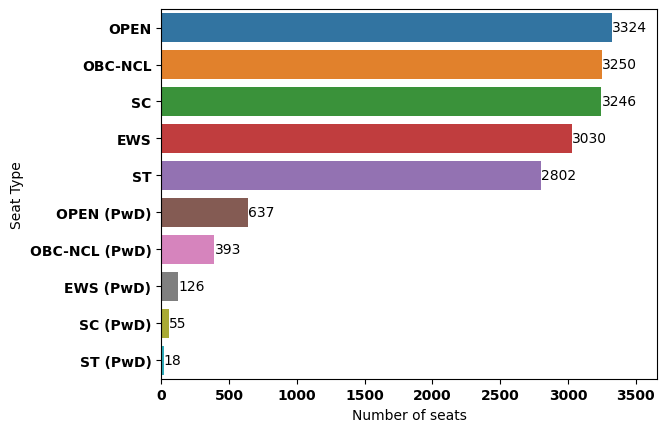

In [56]:
#Plotting the above data using barplot
ax=sns.barplot(data=SIIT_df,x='Seat Type',y='index')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel('Seat Type')
plt.xlabel('Number of seats')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Counting total number of seats based on Gender

In [57]:
GIIT_df=IIT_df.groupby(by='Gender').size().reset_index(name='Number of seats')
GIIT_df

Gender  Number of seats
0  Female-only (including Supernumerary)             7523
1                         Gender-Neutral             9358

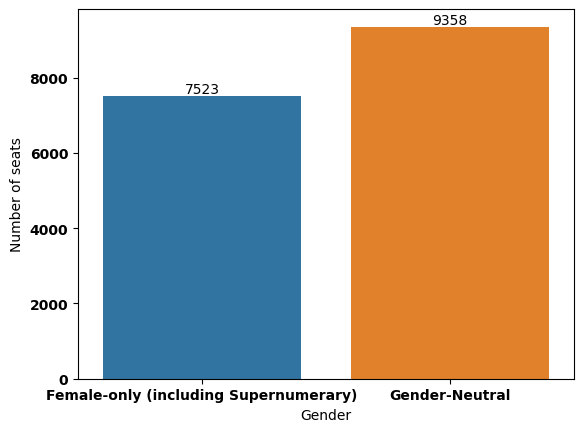

In [58]:
#Plotting the above data using barplot
ax=sns.barplot(data=GIIT_df,x='Gender',y='Number of seats')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()

# There is no logic of grouping Seat Type with Quota since their is only 1 Quota for IIT's (AI Quota) so now I am grouping Seat Type with Gender

In [59]:
SGIIT_df=IIT_df.groupby(by=['Seat Type','Gender']).size().reset_index(name='Number of seats')
SGIIT_df

Seat Type                                 Gender  Number of seats
0             EWS  Female-only (including Supernumerary)             1368
1             EWS                         Gender-Neutral             1662
2       EWS (PwD)                         Gender-Neutral              126
3         OBC-NCL  Female-only (including Supernumerary)             1588
4         OBC-NCL                         Gender-Neutral             1662
5   OBC-NCL (PwD)  Female-only (including Supernumerary)               66
6   OBC-NCL (PwD)                         Gender-Neutral              327
7            OPEN  Female-only (including Supernumerary)             1662
8            OPEN                         Gender-Neutral             1662
9      OPEN (PwD)  Female-only (including Supernumerary)               97
10     OPEN (PwD)                         Gender-Neutral              540
11             SC  Female-only (including Supernumerary)             1584
12             SC                         Gender-Neutral             1662
13       SC (PwD)                         Gender-Neutral               55
14             ST  Female-only (including Supernumerary)             1158
15             ST                         Gender-Neutral             1644
16       ST (PwD)                         Gender-Neutral               18

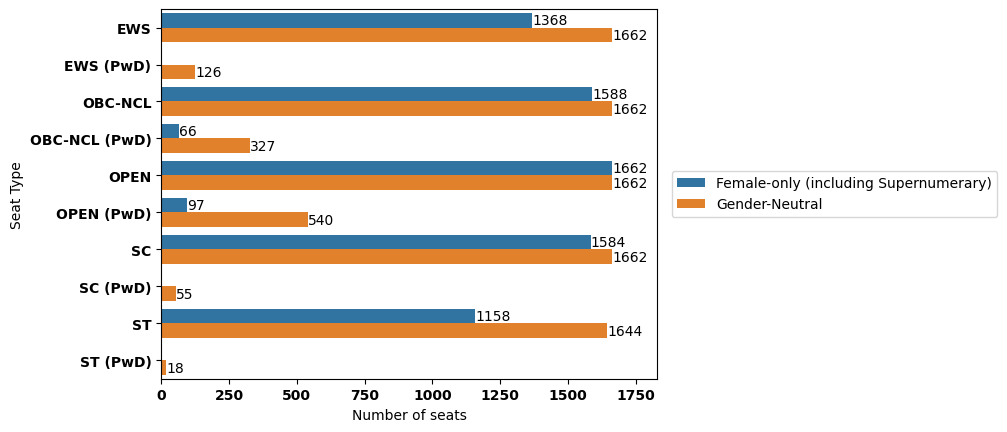

In [60]:
#Plotting the above data using barplot
ax=sns.barplot(data=SGIIT_df,y='Seat Type',x='Number of seats',hue='Gender')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
for container in ax.containers:
    ax.bar_label(container)
ax.margins(0.1,0.01)
plt.show()

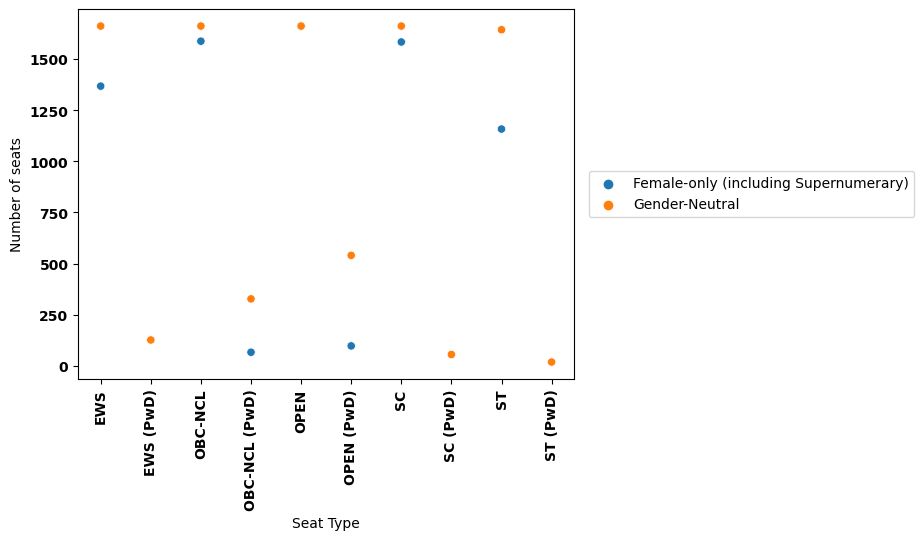

In [61]:
#Plotting the above data using Scatterplot
sns.scatterplot(data=SGIIT_df,x='Seat Type',y='Number of seats',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

# Grouping by Institute(IIT's) and Seat Type

In [62]:
SIIIT_df=IIT_df.groupby(by=['Institute','Seat Type']).size().reset_index(name='Number of seats')
SIIIT_df

Institute      Seat Type  \
0    Indian Institute of Technology (BHU) Varanasi            EWS   
1    Indian Institute of Technology (BHU) Varanasi        OBC-NCL   
2    Indian Institute of Technology (BHU) Varanasi  OBC-NCL (PwD)   
3    Indian Institute of Technology (BHU) Varanasi           OPEN   
4    Indian Institute of Technology (BHU) Varanasi     OPEN (PwD)   
..                                             ...            ...   
176        Indian Institute of Technology Tirupati  OBC-NCL (PwD)   
177        Indian Institute of Technology Tirupati           OPEN   
178        Indian Institute of Technology Tirupati     OPEN (PwD)   
179        Indian Institute of Technology Tirupati             SC   
180        Indian Institute of Technology Tirupati             ST   

     Number of seats  
0                258  
1                277  
2                 12  
3                300  
4                 30  
..               ...  
176                7  
177               60  
178               12  
179               60  
180               60  

[181 rows x 3 columns]

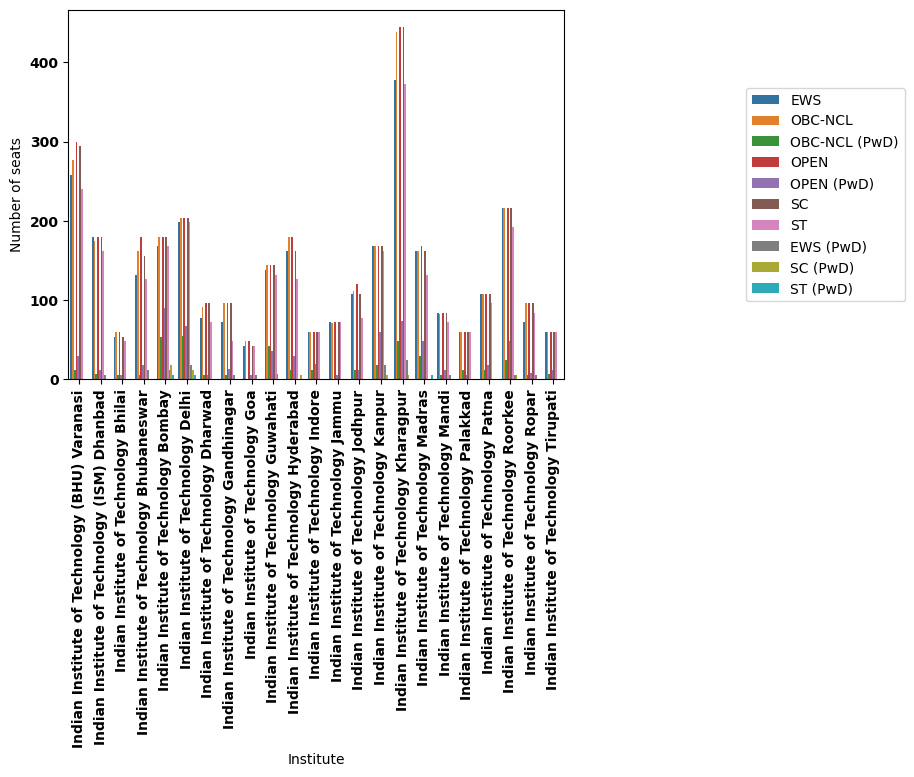

In [63]:
#Plotting the above data using barplot
ax=sns.barplot(data=SIIIT_df,x='Institute',y='Number of seats',hue='Seat Type')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


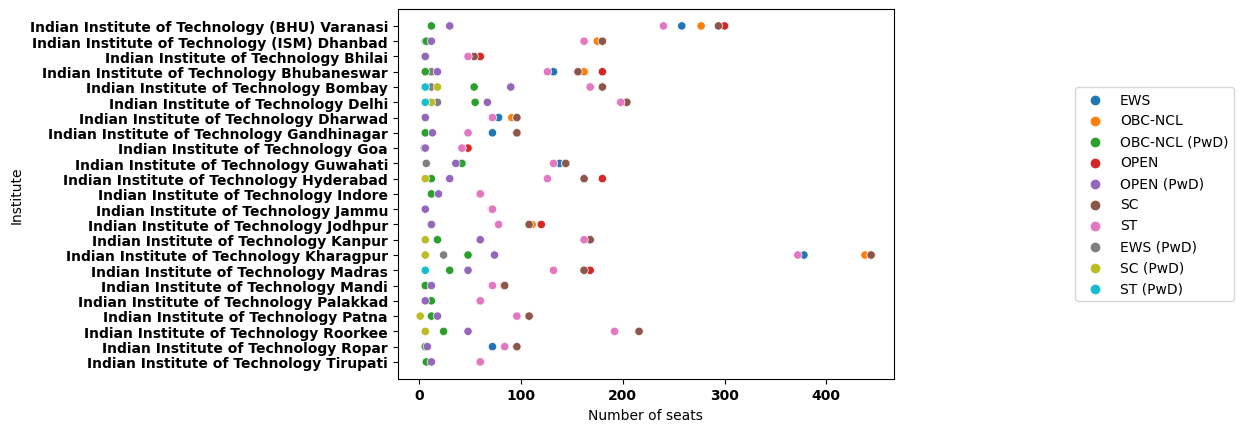

In [64]:
#Plotting the above data using Scatterplot
ax=sns.scatterplot(data=SIIIT_df,y='Institute',x='Number of seats',hue='Seat Type')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Institute(IIT's) and Gender

In [65]:
GIIIT_df=IIT_df.groupby(by=['Institute','Gender']).size().reset_index(name='Number of seats')
GIIIT_df

Institute  \
0   Indian Institute of Technology (BHU) Varanasi   
1   Indian Institute of Technology (BHU) Varanasi   
2    Indian Institute of Technology (ISM) Dhanbad   
3    Indian Institute of Technology (ISM) Dhanbad   
4           Indian Institute of Technology Bhilai   
5           Indian Institute of Technology Bhilai   
6      Indian Institute of Technology Bhubaneswar   
7      Indian Institute of Technology Bhubaneswar   
8           Indian Institute of Technology Bombay   
9           Indian Institute of Technology Bombay   
10           Indian Institute of Technology Delhi   
11           Indian Institute of Technology Delhi   
12         Indian Institute of Technology Dharwad   
13         Indian Institute of Technology Dharwad   
14     Indian Institute of Technology Gandhinagar   
15     Indian Institute of Technology Gandhinagar   
16             Indian Institute of Technology Goa   
17             Indian Institute of Technology Goa   
18        Indian Institute of Technology Guwahati   
19        Indian Institute of Technology Guwahati   
20       Indian Institute of Technology Hyderabad   
21       Indian Institute of Technology Hyderabad   
22          Indian Institute of Technology Indore   
23          Indian Institute of Technology Indore   
24           Indian Institute of Technology Jammu   
25           Indian Institute of Technology Jammu   
26         Indian Institute of Technology Jodhpur   
27         Indian Institute of Technology Jodhpur   
28          Indian Institute of Technology Kanpur   
29          Indian Institute of Technology Kanpur   
30       Indian Institute of Technology Kharagpur   
31       Indian Institute of Technology Kharagpur   
32          Indian Institute of Technology Madras   
33          Indian Institute of Technology Madras   
34           Indian Institute of Technology Mandi   
35           Indian Institute of Technology Mandi   
36        Indian Institute of Technology Palakkad   
37        Indian Institute of Technology Palakkad   
38           Indian Institute of Technology Patna   
39           Indian Institute of Technology Patna   
40         Indian Institute of Technology Roorkee   
41         Indian Institute of Technology Roorkee   
42           Indian Institute of Technology Ropar   
43           Indian Institute of Technology Ropar   
44        Indian Institute of Technology Tirupati   
45        Indian Institute of Technology Tirupati   

                                   Gender  Number of seats  
0   Female-only (including Supernumerary)              619  
1                          Gender-Neutral              792  
2   Female-only (including Supernumerary)              427  
3                          Gender-Neutral              475  
4   Female-only (including Supernumerary)              126  
5                          Gender-Neutral              162  
6   Female-only (including Supernumerary)              324  
7                          Gender-Neutral              468  
8   Female-only (including Supernumerary)              444  
9                          Gender-Neutral              612  
10  Female-only (including Supernumerary)              522  
11                         Gender-Neutral              644  
12  Female-only (including Supernumerary)              193  
13                         Gender-Neutral              252  
14  Female-only (including Supernumerary)              168  
15                         Gender-Neutral              265  
16  Female-only (including Supernumerary)              102  
17                         Gender-Neutral              131  
18  Female-only (including Supernumerary)              360  
19                         Gender-Neutral              427  
20  Female-only (including Supernumerary)              366  
21                         Gender-Neutral              492  
22  Female-only (including Supernumerary)              156  
23                         Gender-Neutral              175  
24  Female-only (includ

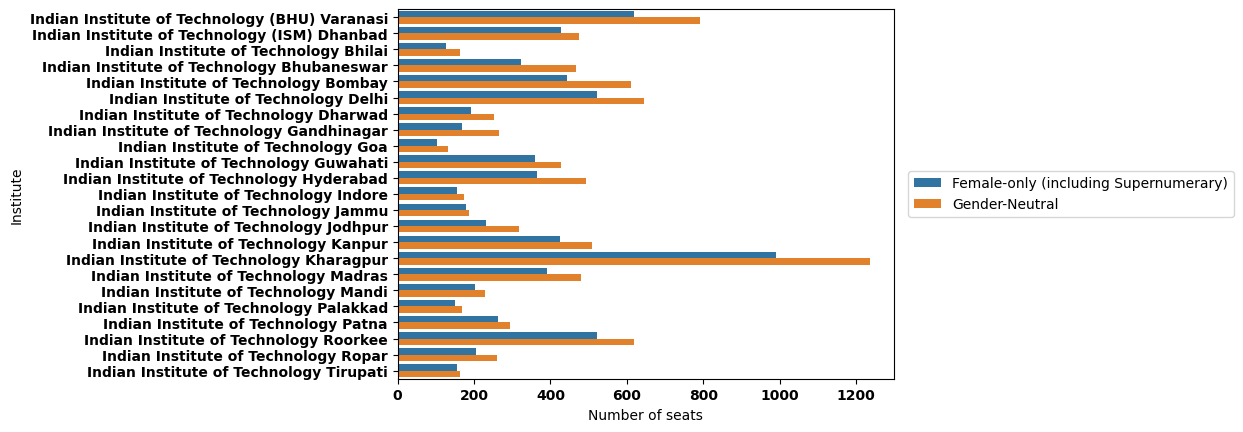

In [66]:
#Plotting the above data using barplot
ax=sns.barplot(data=GIIIT_df,y='Institute',x='Number of seats',hue='Gender',orient='h')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


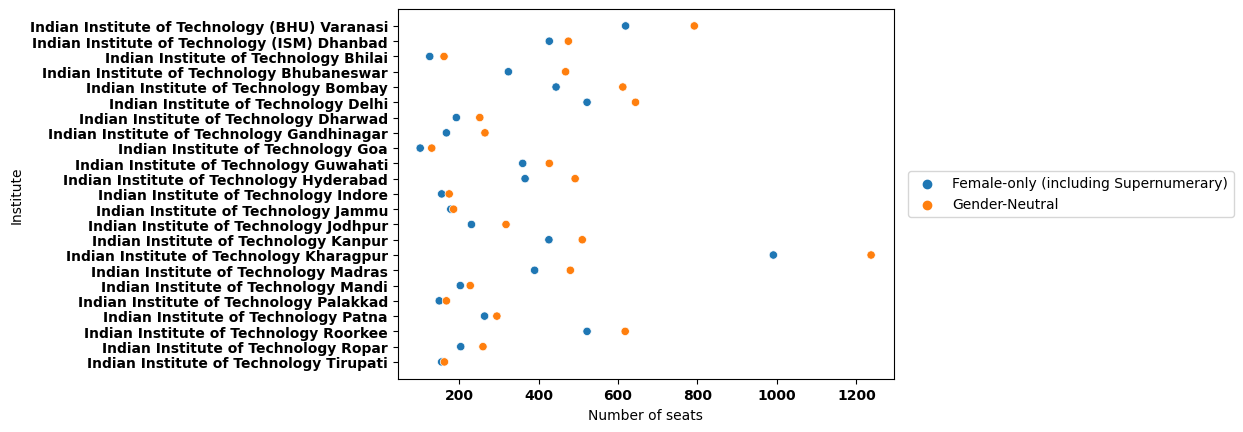

In [67]:
#Plotting the above data using scatterplot
ax=sns.scatterplot(data=GIIIT_df,y='Institute',x='Number of seats',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Institute(IIT's) and Round

In [68]:
RIIIT_df=IIT_df.groupby(by=['Institute','Round']).size().reset_index(name='Number of seats')
RIIIT_df

Institute  Round  Number of seats
0    Indian Institute of Technology (BHU) Varanasi      1              238
1    Indian Institute of Technology (BHU) Varanasi      2              236
2    Indian Institute of Technology (BHU) Varanasi      3              235
3    Indian Institute of Technology (BHU) Varanasi      4              235
4    Indian Institute of Technology (BHU) Varanasi      5              235
..                                             ...    ...              ...
133        Indian Institute of Technology Tirupati      2               53
134        Indian Institute of Technology Tirupati      3               53
135        Indian Institute of Technology Tirupati      4               53
136        Indian Institute of Technology Tirupati      5               53
137        Indian Institute of Technology Tirupati      6               53

[138 rows x 3 columns]

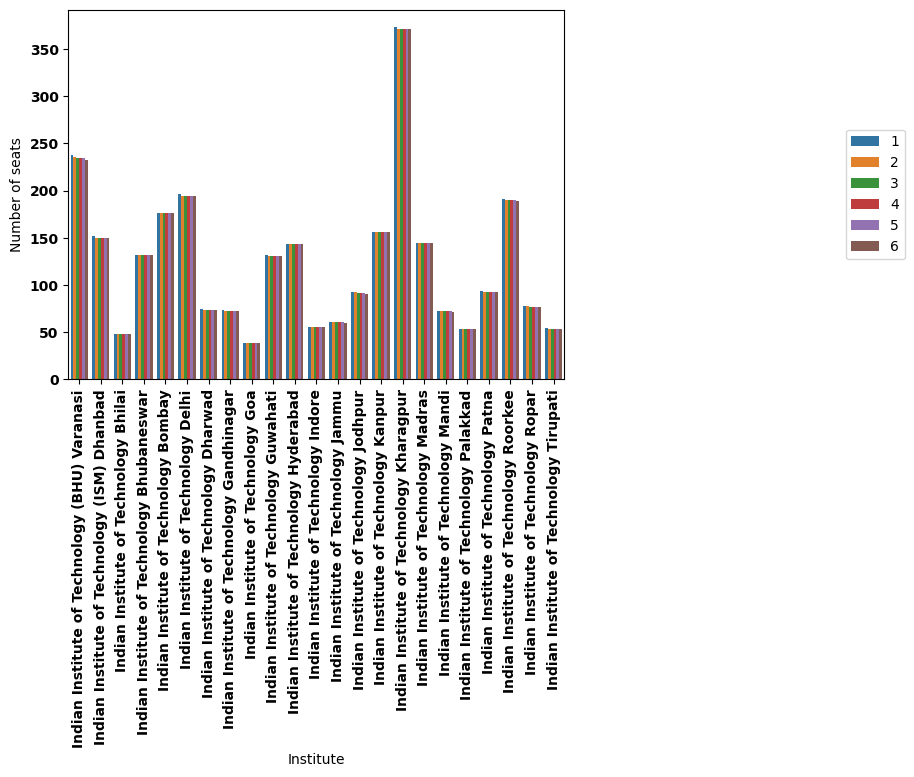

In [69]:
#Plotting the above data using barplot
ax=sns.barplot(data=RIIIT_df,x='Institute',y='Number of seats',hue='Round')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


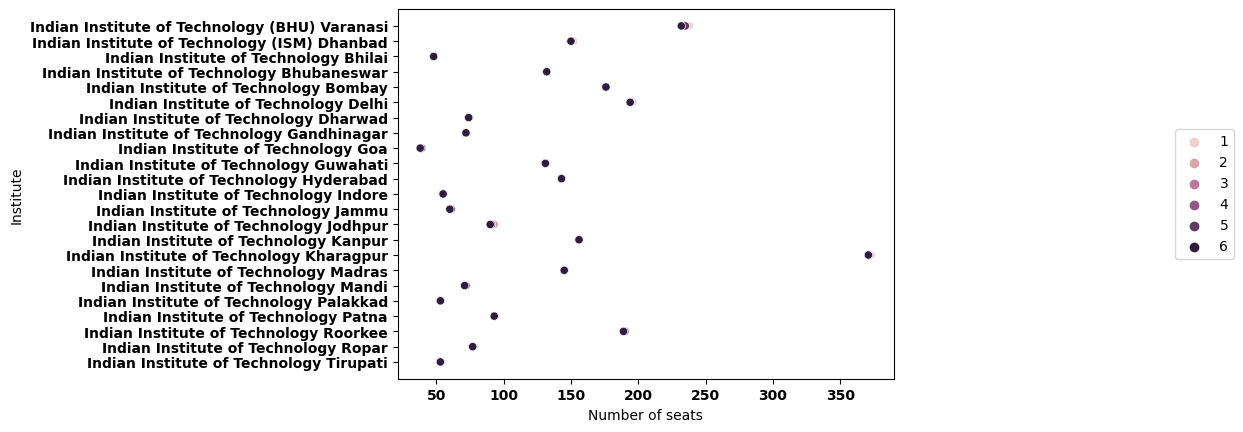

In [70]:
#Plotting the above data using barplot
ax=sns.scatterplot(data=RIIIT_df,y='Institute',x='Number of seats',hue='Round')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Institute(IIT's) and Academic Program Name

In [71]:
AIIIT_df=IIT_df.groupby(by=['Institute','Academic Program Name']).size().reset_index(name='Number of seats')
AIIIT_df

Institute  \
0    Indian Institute of Technology (BHU) Varanasi   
1    Indian Institute of Technology (BHU) Varanasi   
2    Indian Institute of Technology (BHU) Varanasi   
3    Indian Institute of Technology (BHU) Varanasi   
4    Indian Institute of Technology (BHU) Varanasi   
..                                             ...   
272        Indian Institute of Technology Tirupati   
273        Indian Institute of Technology Tirupati   
274        Indian Institute of Technology Tirupati   
275        Indian Institute of Technology Tirupati   
276        Indian Institute of Technology Tirupati   

                                 Academic Program Name  Number of seats  
0     Architecture (5 Years, Bachelor of Architecture)               42  
1    Biochemical Engineering with M.Tech. in Bioche...               48  
2    Bioengineering with M.Tech in Biomedical Techn...               44  
3    Ceramic Engineering (4 Years, Bachelor of Tech...               60  
4    Ceramic Engineering (5 Years, Bachelor and Mas...               43  
..                                                 ...              ...  
272  Chemical Engineering (4 Years, Bachelor of Tec...               66  
273  Civil Engineering (4 Years, Bachelor of Techno...               60  
274  Computer Science and Engineering (4 Years, Bac...               72  
275  Electrical Engineering (4 Years, Bachelor of T...               61  
276  Mechanical Engineering (4 Years, Bachelor of T...               60  

[277 rows x 3 columns]

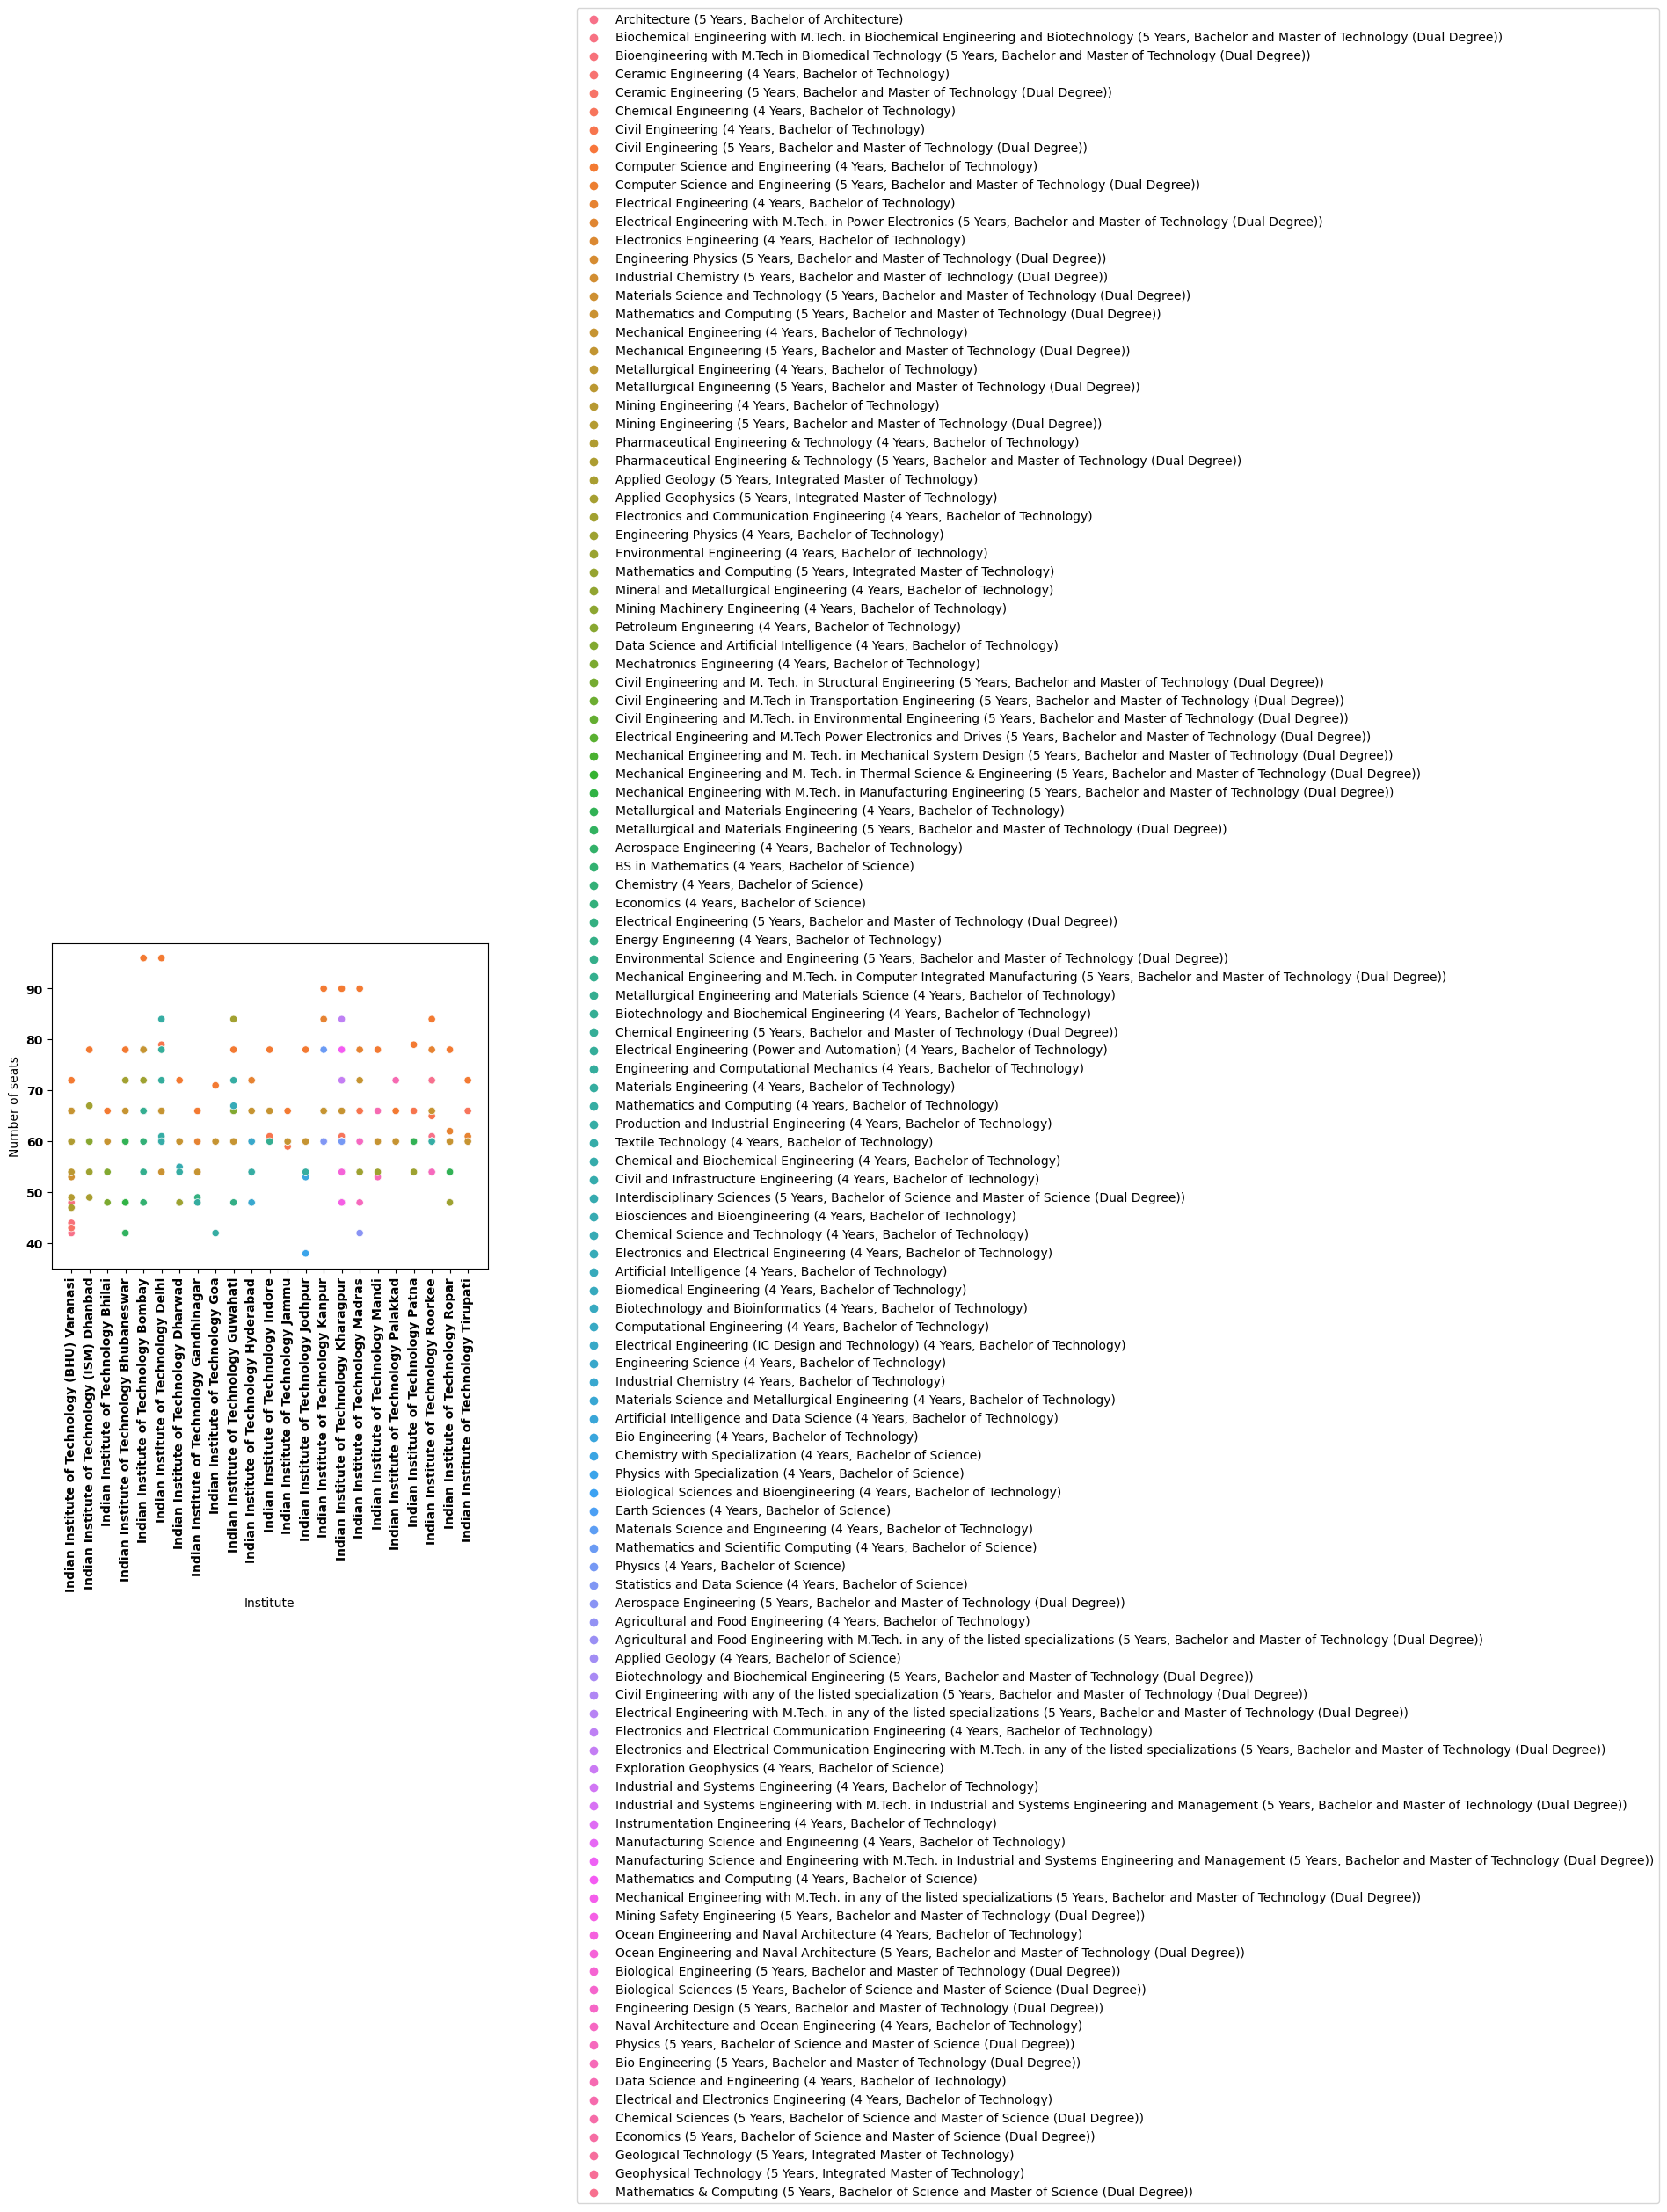

In [72]:
#Plotting the above data using barplot
ax=sns.scatterplot(data=AIIIT_df,x='Institute',y='Number of seats',hue='Academic Program Name')
plt.legend(bbox_to_anchor=(3.70, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# As we can see that plotting  all the academic programs could be little messy so instead of all the programs let's plot the academic program containing the keyword computer science

In [73]:
ONLYCSIIT_df=AIIIT_df.loc[AIIIT_df['Academic Program Name'].str.contains('^Computer Science [a-zA-Z]',regex=True)]
ONLYCSIIT_df


Institute  \
8    Indian Institute of Technology (BHU) Varanasi   
9    Indian Institute of Technology (BHU) Varanasi   
29    Indian Institute of Technology (ISM) Dhanbad   
40           Indian Institute of Technology Bhilai   
49      Indian Institute of Technology Bhubaneswar   
50      Indian Institute of Technology Bhubaneswar   
65           Indian Institute of Technology Bombay   
79            Indian Institute of Technology Delhi   
80            Indian Institute of Technology Delhi   
94          Indian Institute of Technology Dharwad   
102     Indian Institute of Technology Gandhinagar   
103     Indian Institute of Technology Gandhinagar   
108             Indian Institute of Technology Goa   
116        Indian Institute of Technology Guwahati   
130       Indian Institute of Technology Hyderabad   
140          Indian Institute of Technology Indore   
146           Indian Institute of Technology Jammu   
155         Indian Institute of Technology Jodhpur   
165          Indian Institute of Technology Kanpur   
187       Indian Institute of Technology Kharagpur   
188       Indian Institute of Technology Kharagpur   
217          Indian Institute of Technology Madras   
227           Indian Institute of Technology Mandi   
233        Indian Institute of Technology Palakkad   
240           Indian Institute of Technology Patna   
251         Indian Institute of Technology Roorkee   
266           Indian Institute of Technology Ropar   
274        Indian Institute of Technology Tirupati   

                                 Academic Program Name  Number of seats  
8    Computer Science and Engineering (4 Years, Bac...               72  
9    Computer Science and Engineering (5 Years, Bac...               66  
29   Computer Science and Engineering (4 Years, Bac...               78  
40   Computer Science and Engineering (4 Years, Bac...               66  
49   Computer Science and Engineering (4 Years, Bac...               78  
50   Computer Science and Engineering (5 Years, Bac...               42  
65   Computer Science and Engineering (4 Years, Bac...               96  
79   Computer Science and Engineering (4 Years, Bac...               96  
80   Computer Science and Engineering (5 Years, Bac...               66  
94   Computer Science and Engineering (4 Years, Bac...               72  
102  Computer Science and Engineering (4 Years, Bac...               66  
103  Computer Science and Engineering (5 Years, Bac...               54  
108  Computer Science and Engineering (4 Years, Bac...               71  
116  Computer Science and Engineering (4 Years, Bac...               78  
130  Computer Science and Engineering (4 Years, Bac...               72  
140  Computer Science and Engineering (4 Years, Bac...               78  
146  Computer Science and Engineering (4 Years, Bac...               66  
155  Computer Science and Engineering (4 Years, Bac...               78  
165  Computer Science and Engineering (4 Years, Bac...               90  
187  Computer Science and Engineering (4 Years, Bac...               90  
188  Computer Science and Engineering (5 Years, Bac...               72  
217  Computer Science and Engineering (4 Years, Bac...               90  
227  Computer Science and Engineering (4 Years, Bac...               78  
233  Computer Science and Engineering (4 Years, Bac...               66  
240  Computer Science and Engineering (4 Years, Bac...               79  
251  Computer Science and Engineering (4 Years, Bac...               84  
266  Computer Science and Engineering (4 Years, Bac...               78  
274  Computer Science and Engineering (4 Years, Bac...               72

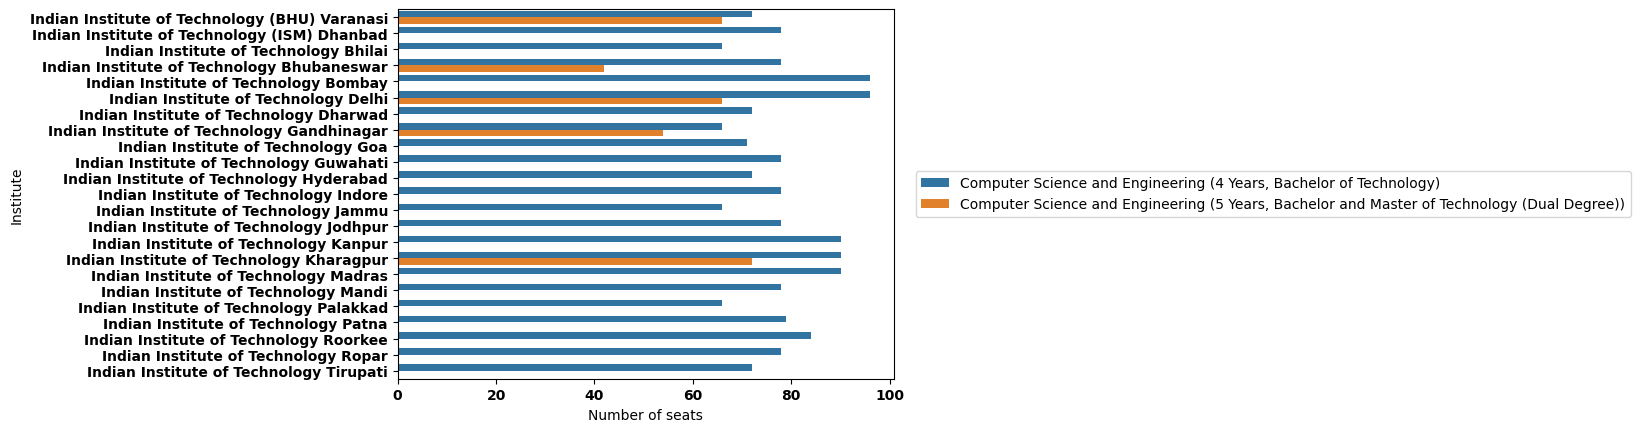

In [74]:
#Plotting the above data using barplot
ax=sns.barplot(data=ONLYCSIIT_df,y='Institute',x='Number of seats',hue='Academic Program Name')
plt.legend(bbox_to_anchor=(2.5, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Institute(IIT's) , Academic Programe Name, Seat Type

In [75]:
IASIIT_df=IIT_df.groupby(by=['Institute','Academic Program Name','Seat Type']).size().reset_index(name='Number of seats')
IASIIT_df

Institute  \
0     Indian Institute of Technology (BHU) Varanasi   
1     Indian Institute of Technology (BHU) Varanasi   
2     Indian Institute of Technology (BHU) Varanasi   
3     Indian Institute of Technology (BHU) Varanasi   
4     Indian Institute of Technology (BHU) Varanasi   
...                                             ...   
1571        Indian Institute of Technology Tirupati   
1572        Indian Institute of Technology Tirupati   
1573        Indian Institute of Technology Tirupati   
1574        Indian Institute of Technology Tirupati   
1575        Indian Institute of Technology Tirupati   

                                  Academic Program Name Seat Type  \
0      Architecture (5 Years, Bachelor of Architecture)       EWS   
1      Architecture (5 Years, Bachelor of Architecture)   OBC-NCL   
2      Architecture (5 Years, Bachelor of Architecture)      OPEN   
3      Architecture (5 Years, Bachelor of Architecture)        SC   
4      Architecture (5 Years, Bachelor of Architecture)        ST   
...                                                 ...       ...   
1571  Mechanical Engineering (4 Years, Bachelor of T...       EWS   
1572  Mechanical Engineering (4 Years, Bachelor of T...   OBC-NCL   
1573  Mechanical Engineering (4 Years, Bachelor of T...      OPEN   
1574  Mechanical Engineering (4 Years, Bachelor of T...        SC   
1575  Mechanical Engineering (4 Years, Bachelor of T...        ST   

      Number of seats  
0                   6  
1                   6  
2                  12  
3                  12  
4                   6  
...               ...  
1571               12  
1572               12  
1573               12  
1574               12  
1575               12  

[1576 rows x 4 columns]

# Grouping by Institute(IIT's) , Academic Programe Name,Gender

In [76]:
IAGIIT_df=IIT_df.groupby(by=['Institute','Academic Program Name','Gender']).size().reset_index(name='Number of seats')
IAGIIT_df

Institute  \
0    Indian Institute of Technology (BHU) Varanasi   
1    Indian Institute of Technology (BHU) Varanasi   
2    Indian Institute of Technology (BHU) Varanasi   
3    Indian Institute of Technology (BHU) Varanasi   
4    Indian Institute of Technology (BHU) Varanasi   
..                                             ...   
549        Indian Institute of Technology Tirupati   
550        Indian Institute of Technology Tirupati   
551        Indian Institute of Technology Tirupati   
552        Indian Institute of Technology Tirupati   
553        Indian Institute of Technology Tirupati   

                                 Academic Program Name  \
0     Architecture (5 Years, Bachelor of Architecture)   
1     Architecture (5 Years, Bachelor of Architecture)   
2    Biochemical Engineering with M.Tech. in Bioche...   
3    Biochemical Engineering with M.Tech. in Bioche...   
4    Bioengineering with M.Tech in Biomedical Techn...   
..                                                 ...   
549  Computer Science and Engineering (4 Years, Bac...   
550  Electrical Engineering (4 Years, Bachelor of T...   
551  Electrical Engineering (4 Years, Bachelor of T...   
552  Mechanical Engineering (4 Years, Bachelor of T...   
553  Mechanical Engineering (4 Years, Bachelor of T...   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)               12  
1                           Gender-Neutral               30  
2    Female-only (including Supernumerary)               18  
3                           Gender-Neutral               30  
4    Female-only (including Supernumerary)               14  
..                                     ...              ...  
549                         Gender-Neutral               36  
550  Female-only (including Supernumerary)               30  
551                         Gender-Neutral               31  
552  Female-only (including Supernumerary)               30  
553                         Gender-Neutral               30  

[554 rows x 4 columns]

# Grouping by Institute(IIT's) , Academic Programe Name, Seat Type and Gender

In [77]:
IASGIIT_df=IIT_df.groupby(by=['Institute','Academic Program Name','Seat Type','Gender']).size().reset_index(name='Number of seats')
IASGIIT_df

Institute  \
0     Indian Institute of Technology (BHU) Varanasi   
1     Indian Institute of Technology (BHU) Varanasi   
2     Indian Institute of Technology (BHU) Varanasi   
3     Indian Institute of Technology (BHU) Varanasi   
4     Indian Institute of Technology (BHU) Varanasi   
...                                             ...   
2825        Indian Institute of Technology Tirupati   
2826        Indian Institute of Technology Tirupati   
2827        Indian Institute of Technology Tirupati   
2828        Indian Institute of Technology Tirupati   
2829        Indian Institute of Technology Tirupati   

                                  Academic Program Name Seat Type  \
0      Architecture (5 Years, Bachelor of Architecture)       EWS   
1      Architecture (5 Years, Bachelor of Architecture)   OBC-NCL   
2      Architecture (5 Years, Bachelor of Architecture)      OPEN   
3      Architecture (5 Years, Bachelor of Architecture)      OPEN   
4      Architecture (5 Years, Bachelor of Architecture)        SC   
...                                                 ...       ...   
2825  Mechanical Engineering (4 Years, Bachelor of T...      OPEN   
2826  Mechanical Engineering (4 Years, Bachelor of T...        SC   
2827  Mechanical Engineering (4 Years, Bachelor of T...        SC   
2828  Mechanical Engineering (4 Years, Bachelor of T...        ST   
2829  Mechanical Engineering (4 Years, Bachelor of T...        ST   

                                     Gender  Number of seats  
0                            Gender-Neutral                6  
1                            Gender-Neutral                6  
2     Female-only (including Supernumerary)                6  
3                            Gender-Neutral                6  
4     Female-only (including Supernumerary)                6  
...                                     ...              ...  
2825                         Gender-Neutral                6  
2826  Female-only (including Supernumerary)                6  
2827                         Gender-Neutral                6  
2828  Female-only (including Supernumerary)                6  
2829                         Gender-Neutral                6  

[2830 rows x 5 columns]

# Academic Program Name	having Computer Science in it for IIT's

In [78]:

CSEIIT_df=IIT_df.loc[IIT_df['Academic Program Name'].str.contains('Computer Science',regex=True)]
CSEIIT_df

Institute  \
31     Indian Institute of Technology Bhubaneswar   
32     Indian Institute of Technology Bhubaneswar   
33     Indian Institute of Technology Bhubaneswar   
34     Indian Institute of Technology Bhubaneswar   
35     Indian Institute of Technology Bhubaneswar   
...                                           ...   
51894      Indian Institute of Technology Dharwad   
51895      Indian Institute of Technology Dharwad   
51896      Indian Institute of Technology Dharwad   
51897      Indian Institute of Technology Dharwad   
51898      Indian Institute of Technology Dharwad   

                                   Academic Program Name Quota      Seat Type  \
31     Computer Science and Engineering (4 Years, Bac...    AI           OPEN   
32     Computer Science and Engineering (4 Years, Bac...    AI           OPEN   
33     Computer Science and Engineering (4 Years, Bac...    AI     OPEN (PwD)   
34     Computer Science and Engineering (4 Years, Bac...    AI            EWS   
35     Computer Science and Engineering (4 Years, Bac...    AI            EWS   
...                                                  ...   ...            ...   
51894  Computer Science and Engineering (4 Years, Bac...    AI  OBC-NCL (PwD)   
51895  Computer Science and Engineering (4 Years, Bac...    AI             SC   
51896  Computer Science and Engineering (4 Years, Bac...    AI             SC   
51897  Computer Science and Engineering (4 Years, Bac...    AI             ST   
51898  Computer Science and Engineering (4 Years, Bac...    AI             ST   

                                      Gender  Opening Rank  Closing Rank  \
31                            Gender-Neutral          1702          2486   
32     Female-only (including Supernumerary)          3119          4620   
33     Female-only (including Supernumerary)            74            74   
34                            Gender-Neutral           283           350   
35     Female-only (including Supernumerary)           550           550   
...                                      ...           ...           ...   
51894                         Gender-Neutral          3500          3500   
51895                         Gender-Neutral           690          1119   
51896  Female-only (including Supernumerary)          1311          1538   
51897                         Gender-Neutral           261           485   
51898  Female-only (including Supernumerary)           434           434   

       Round  
31         1  
32         1  
33         1  
34         1  
35         1  
...      ...  
51894      6  
51895      6  
51896      6  
51897      6  
51898      6  

[2094 rows x 8 columns]

## The above dataframe  contains data of both 4year btech and 5year btech integrated programs offered by IIT's(if they do so)

# Number of seats for both CS programs per IIT

In [79]:
CSSIIT_df=CSEIIT_df.groupby(by=['Institute']).size().reset_index(name='Number of seats')
CSSIIT_df

Institute  Number of seats
0   Indian Institute of Technology (BHU) Varanasi              138
1    Indian Institute of Technology (ISM) Dhanbad               78
2           Indian Institute of Technology Bhilai               66
3      Indian Institute of Technology Bhubaneswar              120
4           Indian Institute of Technology Bombay               96
5            Indian Institute of Technology Delhi              162
6          Indian Institute of Technology Dharwad               72
7      Indian Institute of Technology Gandhinagar              120
8              Indian Institute of Technology Goa               71
9         Indian Institute of Technology Guwahati               78
10       Indian Institute of Technology Hyderabad               72
11          Indian Institute of Technology Indore               78
12           Indian Institute of Technology Jammu               66
13         Indian Institute of Technology Jodhpur               78
14          Indian Institute of Technology Kanpur               90
15       Indian Institute of Technology Kharagpur              162
16          Indian Institute of Technology Madras               90
17           Indian Institute of Technology Mandi               78
18        Indian Institute of Technology Palakkad               66
19           Indian Institute of Technology Patna               79
20         Indian Institute of Technology Roorkee               84
21           Indian Institute of Technology Ropar               78
22        Indian Institute of Technology Tirupati               72

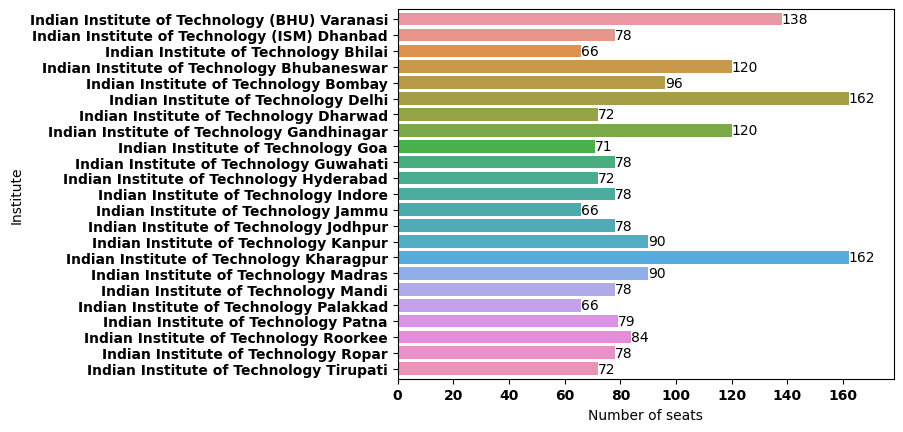

In [80]:
#Plotting the above data using barplot
ax=sns.barplot(data=CSSIIT_df,x='Number of seats',y='Institute')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Total number of CS both program seats based on Seat Type

In [81]:
TSCSEIIT_df=CSEIIT_df.groupby(by=['Seat Type']).size().reset_index(name='Number of seats')
TSCSEIIT_df

Seat Type  Number of seats
0            EWS              318
1      EWS (PwD)               59
2        OBC-NCL              336
3  OBC-NCL (PwD)              180
4           OPEN              336
5     OPEN (PwD)              168
6             SC              330
7       SC (PwD)               37
8             ST              312
9       ST (PwD)               18

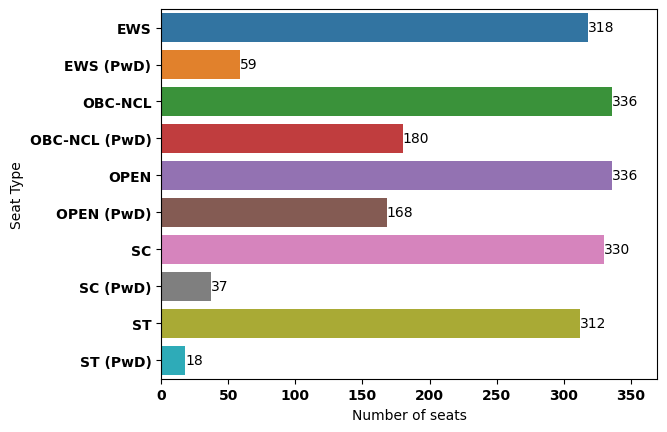

In [82]:
#Plotting the above data using barplot
ax=sns.barplot(data=TSCSEIIT_df,x='Number of seats',y='Seat Type')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel('Seat Type')
plt.xlabel('Number of seats')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Total number of CS both program seats based on Gender

In [83]:
TGCSEIIT_df=CSEIIT_df.groupby(by=['Gender']).size().reset_index(name='Number of seats')
TGCSEIIT_df

Gender  Number of seats
0  Female-only (including Supernumerary)              882
1                         Gender-Neutral             1212

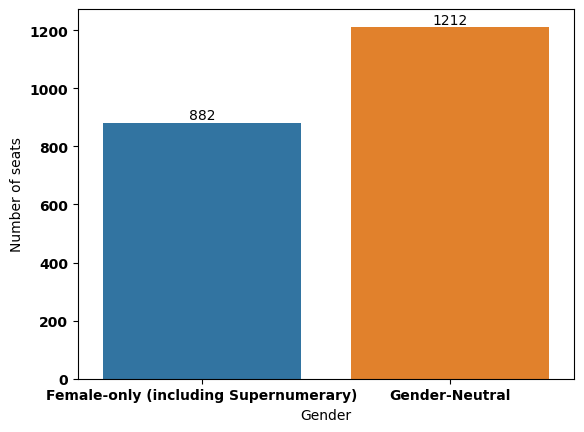

In [84]:
#Plotting the above data using barplot
ax=sns.barplot(data=TGCSEIIT_df,y='Number of seats',x='Gender')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()

# Grouping Institute (IIT's)with Seat Type for CS both programs

In [85]:
ISCSEIIT_df=CSEIIT_df.groupby(by=['Institute','Seat Type']).size().reset_index(name='Number of seats')
ISCSEIIT_df

Institute      Seat Type  \
0    Indian Institute of Technology (BHU) Varanasi            EWS   
1    Indian Institute of Technology (BHU) Varanasi        OBC-NCL   
2    Indian Institute of Technology (BHU) Varanasi  OBC-NCL (PwD)   
3    Indian Institute of Technology (BHU) Varanasi           OPEN   
4    Indian Institute of Technology (BHU) Varanasi     OPEN (PwD)   
..                                             ...            ...   
172        Indian Institute of Technology Tirupati  OBC-NCL (PwD)   
173        Indian Institute of Technology Tirupati           OPEN   
174        Indian Institute of Technology Tirupati     OPEN (PwD)   
175        Indian Institute of Technology Tirupati             SC   
176        Indian Institute of Technology Tirupati             ST   

     Number of seats  
0                 24  
1                 24  
2                 12  
3                 24  
4                  6  
..               ...  
172                6  
173               12  
174                6  
175               12  
176               12  

[177 rows x 3 columns]

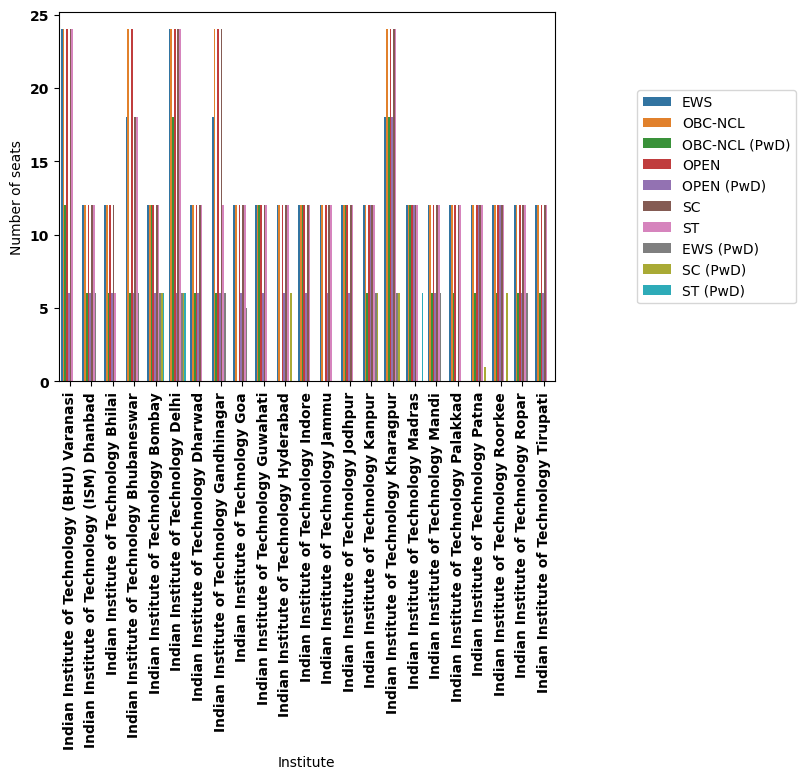

In [86]:
#Plotting the above data using barplot
ax=sns.barplot(data=ISCSEIIT_df,y='Number of seats',x='Institute',hue='Seat Type')
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

# Grouping Institute (IIT's)with Gender for CS both programs


In [87]:
IGCSEIIT_df=CSEIIT_df.groupby(by=['Institute','Gender']).size().reset_index(name='Number of seats')
IGCSEIIT_df

Institute  \
0   Indian Institute of Technology (BHU) Varanasi   
1   Indian Institute of Technology (BHU) Varanasi   
2    Indian Institute of Technology (ISM) Dhanbad   
3    Indian Institute of Technology (ISM) Dhanbad   
4           Indian Institute of Technology Bhilai   
5           Indian Institute of Technology Bhilai   
6      Indian Institute of Technology Bhubaneswar   
7      Indian Institute of Technology Bhubaneswar   
8           Indian Institute of Technology Bombay   
9           Indian Institute of Technology Bombay   
10           Indian Institute of Technology Delhi   
11           Indian Institute of Technology Delhi   
12         Indian Institute of Technology Dharwad   
13         Indian Institute of Technology Dharwad   
14     Indian Institute of Technology Gandhinagar   
15     Indian Institute of Technology Gandhinagar   
16             Indian Institute of Technology Goa   
17             Indian Institute of Technology Goa   
18        Indian Institute of Technology Guwahati   
19        Indian Institute of Technology Guwahati   
20       Indian Institute of Technology Hyderabad   
21       Indian Institute of Technology Hyderabad   
22          Indian Institute of Technology Indore   
23          Indian Institute of Technology Indore   
24           Indian Institute of Technology Jammu   
25           Indian Institute of Technology Jammu   
26         Indian Institute of Technology Jodhpur   
27         Indian Institute of Technology Jodhpur   
28          Indian Institute of Technology Kanpur   
29          Indian Institute of Technology Kanpur   
30       Indian Institute of Technology Kharagpur   
31       Indian Institute of Technology Kharagpur   
32          Indian Institute of Technology Madras   
33          Indian Institute of Technology Madras   
34           Indian Institute of Technology Mandi   
35           Indian Institute of Technology Mandi   
36        Indian Institute of Technology Palakkad   
37        Indian Institute of Technology Palakkad   
38           Indian Institute of Technology Patna   
39           Indian Institute of Technology Patna   
40         Indian Institute of Technology Roorkee   
41         Indian Institute of Technology Roorkee   
42           Indian Institute of Technology Ropar   
43           Indian Institute of Technology Ropar   
44        Indian Institute of Technology Tirupati   
45        Indian Institute of Technology Tirupati   

                                   Gender  Number of seats  
0   Female-only (including Supernumerary)               60  
1                          Gender-Neutral               78  
2   Female-only (including Supernumerary)               30  
3                          Gender-Neutral               48  
4   Female-only (including Supernumerary)               24  
5                          Gender-Neutral               42  
6   Female-only (including Supernumerary)               48  
7                          Gender-Neutral               72  
8   Female-only (including Supernumerary)               36  
9                          Gender-Neutral               60  
10  Female-only (including Supernumerary)               66  
11                         Gender-Neutral               96  
12  Female-only (including Supernumerary)               30  
13                         Gender-Neutral               42  
14  Female-only (including Supernumerary)               42  
15                         Gender-Neutral               78  
16  Female-only (including Supernumerary)               30  
17                         Gender-Neutral               41  
18  Female-only (including Supernumerary)               36  
19                         Gender-Neutral               42  
20  Female-only (including Supernumerary)               30  
21                         Gender-Neutral               42  
22  Female-only (including Supernumerary)               36  
23                         Gender-Neutral               42  
24  Female-only (includ

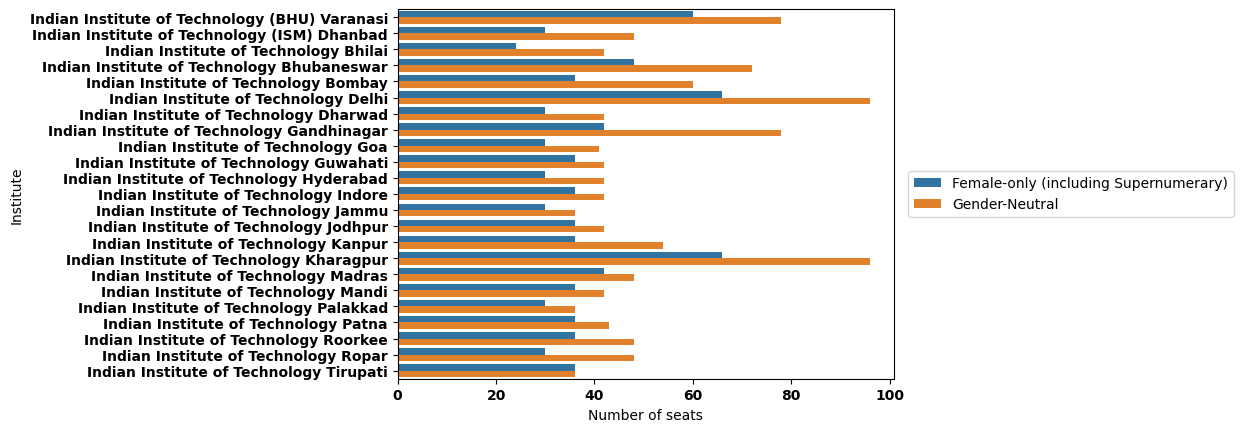

In [88]:
#Plotting the above data using barplot
ax=sns.barplot(data=IGCSEIIT_df,y='Institute',x='Number of seats',hue='Gender',orient='h')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


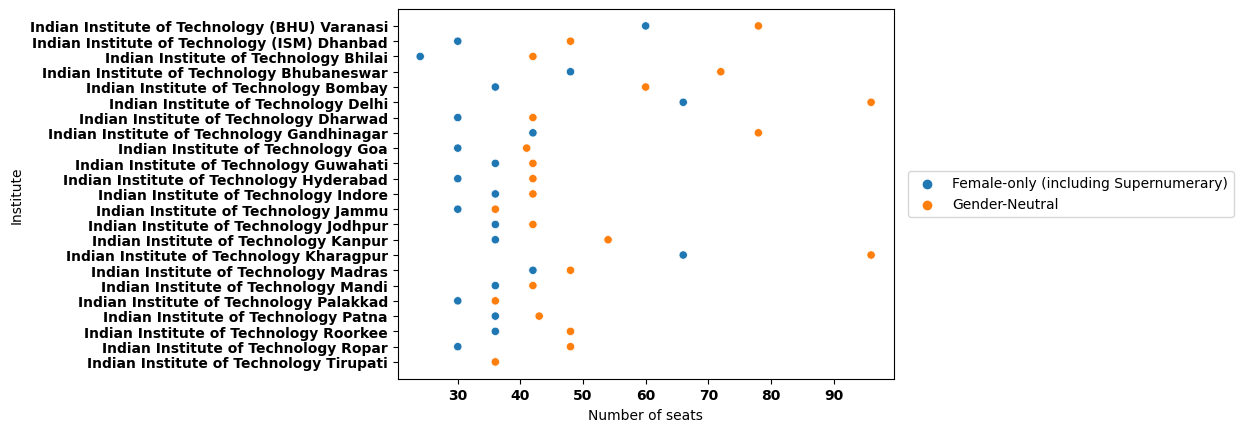

In [89]:
#Plotting the above data using Scatterplot
sns.scatterplot(data=IGCSEIIT_df,y='Institute',x='Number of seats',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

# Grouping Institute (IIT's)with Seat Type and Gender for CS both programs


In [90]:
ISGCSEIIT_df=CSEIIT_df.groupby(by=['Institute','Seat Type','Gender']).size().reset_index(name='Number of seats')
ISGCSEIIT_df

Institute      Seat Type  \
0    Indian Institute of Technology (BHU) Varanasi            EWS   
1    Indian Institute of Technology (BHU) Varanasi            EWS   
2    Indian Institute of Technology (BHU) Varanasi        OBC-NCL   
3    Indian Institute of Technology (BHU) Varanasi        OBC-NCL   
4    Indian Institute of Technology (BHU) Varanasi  OBC-NCL (PwD)   
..                                             ...            ...   
297        Indian Institute of Technology Tirupati     OPEN (PwD)   
298        Indian Institute of Technology Tirupati             SC   
299        Indian Institute of Technology Tirupati             SC   
300        Indian Institute of Technology Tirupati             ST   
301        Indian Institute of Technology Tirupati             ST   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)               12  
1                           Gender-Neutral               12  
2    Female-only (including Supernumerary)               12  
3                           Gender-Neutral               12  
4                           Gender-Neutral               12  
..                                     ...              ...  
297  Female-only (including Supernumerary)                6  
298  Female-only (including Supernumerary)                6  
299                         Gender-Neutral                6  
300  Female-only (including Supernumerary)                6  
301                         Gender-Neutral                6  

[302 rows x 4 columns]

# Now finding Academic Program Name	having Computer Science in it for IIT's only for 4 year btech program

In [91]:
CSEIIT4_df=CSEIIT_df.loc[CSEIIT_df['Academic Program Name'].str.contains('[4]',regex=True)]
CSEIIT4_df

Institute  \
31     Indian Institute of Technology Bhubaneswar   
32     Indian Institute of Technology Bhubaneswar   
33     Indian Institute of Technology Bhubaneswar   
34     Indian Institute of Technology Bhubaneswar   
35     Indian Institute of Technology Bhubaneswar   
...                                           ...   
51894      Indian Institute of Technology Dharwad   
51895      Indian Institute of Technology Dharwad   
51896      Indian Institute of Technology Dharwad   
51897      Indian Institute of Technology Dharwad   
51898      Indian Institute of Technology Dharwad   

                                   Academic Program Name Quota      Seat Type  \
31     Computer Science and Engineering (4 Years, Bac...    AI           OPEN   
32     Computer Science and Engineering (4 Years, Bac...    AI           OPEN   
33     Computer Science and Engineering (4 Years, Bac...    AI     OPEN (PwD)   
34     Computer Science and Engineering (4 Years, Bac...    AI            EWS   
35     Computer Science and Engineering (4 Years, Bac...    AI            EWS   
...                                                  ...   ...            ...   
51894  Computer Science and Engineering (4 Years, Bac...    AI  OBC-NCL (PwD)   
51895  Computer Science and Engineering (4 Years, Bac...    AI             SC   
51896  Computer Science and Engineering (4 Years, Bac...    AI             SC   
51897  Computer Science and Engineering (4 Years, Bac...    AI             ST   
51898  Computer Science and Engineering (4 Years, Bac...    AI             ST   

                                      Gender  Opening Rank  Closing Rank  \
31                            Gender-Neutral          1702          2486   
32     Female-only (including Supernumerary)          3119          4620   
33     Female-only (including Supernumerary)            74            74   
34                            Gender-Neutral           283           350   
35     Female-only (including Supernumerary)           550           550   
...                                      ...           ...           ...   
51894                         Gender-Neutral          3500          3500   
51895                         Gender-Neutral           690          1119   
51896  Female-only (including Supernumerary)          1311          1538   
51897                         Gender-Neutral           261           485   
51898  Female-only (including Supernumerary)           434           434   

       Round  
31         1  
32         1  
33         1  
34         1  
35         1  
...      ...  
51894      6  
51895      6  
51896      6  
51897      6  
51898      6  

[1794 rows x 8 columns]

# Number of CS 4 year seats per IIT

In [92]:
CSS4IIT_df=CSEIIT4_df.groupby(by=['Institute']).size().reset_index(name='Number of seats')
CSS4IIT_df

Institute  Number of seats
0   Indian Institute of Technology (BHU) Varanasi               72
1    Indian Institute of Technology (ISM) Dhanbad               78
2           Indian Institute of Technology Bhilai               66
3      Indian Institute of Technology Bhubaneswar               78
4           Indian Institute of Technology Bombay               96
5            Indian Institute of Technology Delhi               96
6          Indian Institute of Technology Dharwad               72
7      Indian Institute of Technology Gandhinagar               66
8              Indian Institute of Technology Goa               71
9         Indian Institute of Technology Guwahati               78
10       Indian Institute of Technology Hyderabad               72
11          Indian Institute of Technology Indore               78
12           Indian Institute of Technology Jammu               66
13         Indian Institute of Technology Jodhpur               78
14          Indian Institute of Technology Kanpur               90
15       Indian Institute of Technology Kharagpur               90
16          Indian Institute of Technology Madras               90
17           Indian Institute of Technology Mandi               78
18        Indian Institute of Technology Palakkad               66
19           Indian Institute of Technology Patna               79
20         Indian Institute of Technology Roorkee               84
21           Indian Institute of Technology Ropar               78
22        Indian Institute of Technology Tirupati               72

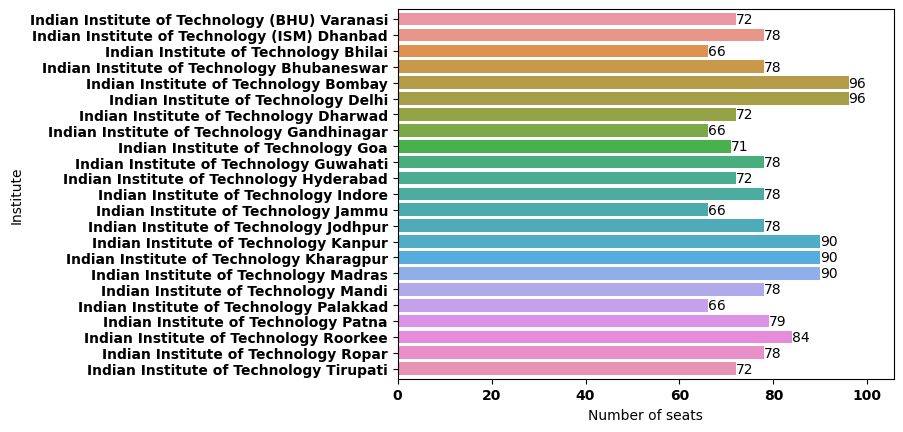

In [93]:
#Plotting the above data using barplot
ax=sns.barplot(data=CSS4IIT_df,x='Number of seats',y='Institute')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Total Number of CS4 yearSeats based on Seat Type per IIT

In [94]:
TSCSEIIT4_df=CSEIIT4_df.groupby('Seat Type').size().reset_index(name='Number of seats')
TSCSEIIT4_df

Seat Type  Number of seats
0            EWS              270
1      EWS (PwD)               59
2        OBC-NCL              276
3  OBC-NCL (PwD)              162
4           OPEN              276
5     OPEN (PwD)              156
6             SC              276
7       SC (PwD)               37
8             ST              264
9       ST (PwD)               18

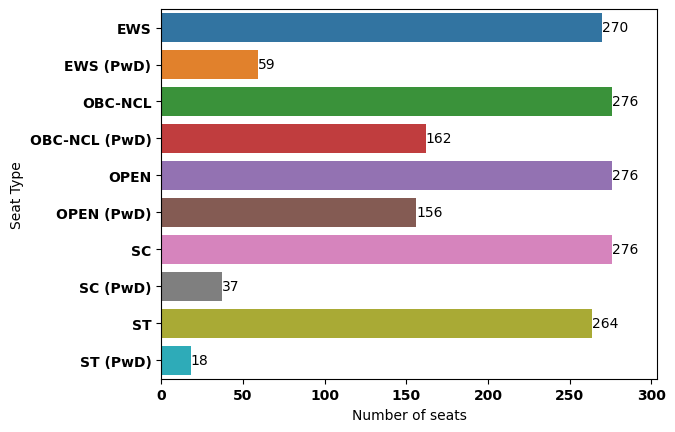

In [95]:
#Plotting the above data using barplot
ax=sns.barplot(data=TSCSEIIT4_df,x='Number of seats',y='Seat Type')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Total Number of CS4 yearSeats based on Gender per IIT

In [96]:
TGCSEIIT4_df=CSEIIT4_df.groupby('Gender').size().reset_index(name='Number of seats')
TGCSEIIT4_df

Gender  Number of seats
0  Female-only (including Supernumerary)              762
1                         Gender-Neutral             1032

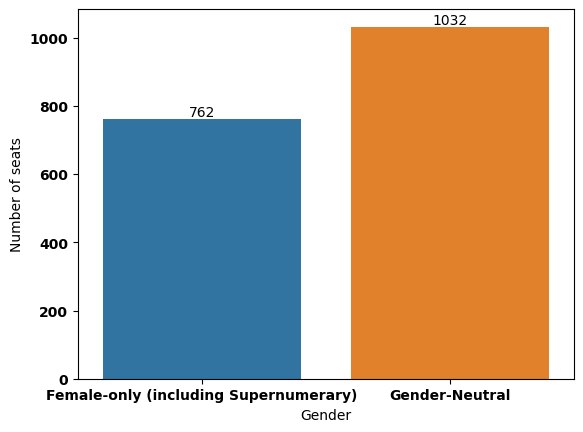

In [97]:
#Plotting the above data using barplot
ax=sns.barplot(data=TGCSEIIT4_df,y='Number of seats',x='Gender')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()

# Grouping Institute (IIT's)with Seat Type for CS 4 year program

In [98]:
ISCSEIIT4_df=CSEIIT4_df.groupby(by=['Institute','Seat Type']).size().reset_index(name='Number of seats')
ISCSEIIT4_df

Institute      Seat Type  \
0    Indian Institute of Technology (BHU) Varanasi            EWS   
1    Indian Institute of Technology (BHU) Varanasi        OBC-NCL   
2    Indian Institute of Technology (BHU) Varanasi  OBC-NCL (PwD)   
3    Indian Institute of Technology (BHU) Varanasi           OPEN   
4    Indian Institute of Technology (BHU) Varanasi     OPEN (PwD)   
..                                             ...            ...   
171        Indian Institute of Technology Tirupati  OBC-NCL (PwD)   
172        Indian Institute of Technology Tirupati           OPEN   
173        Indian Institute of Technology Tirupati     OPEN (PwD)   
174        Indian Institute of Technology Tirupati             SC   
175        Indian Institute of Technology Tirupati             ST   

     Number of seats  
0                 12  
1                 12  
2                  6  
3                 12  
4                  6  
..               ...  
171                6  
172               12  
173                6  
174               12  
175               12  

[176 rows x 3 columns]

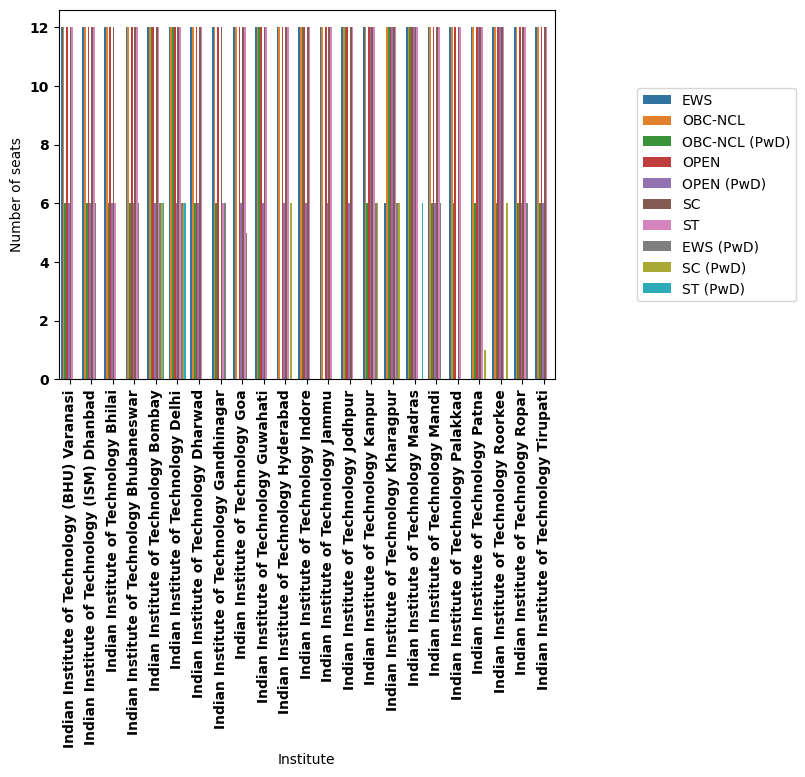

In [99]:
#Plotting the above data using barplot
ax=sns.barplot(data=ISCSEIIT4_df,y='Number of seats',x='Institute',hue='Seat Type')
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

# Grouping Institute (IIT's)with Gender for CS 4 year program


In [100]:
IGCSEIIT4_df=CSEIIT4_df.groupby(by=['Institute','Gender']).size().reset_index(name='Number of seats')
IGCSEIIT4_df

Institute  \
0   Indian Institute of Technology (BHU) Varanasi   
1   Indian Institute of Technology (BHU) Varanasi   
2    Indian Institute of Technology (ISM) Dhanbad   
3    Indian Institute of Technology (ISM) Dhanbad   
4           Indian Institute of Technology Bhilai   
5           Indian Institute of Technology Bhilai   
6      Indian Institute of Technology Bhubaneswar   
7      Indian Institute of Technology Bhubaneswar   
8           Indian Institute of Technology Bombay   
9           Indian Institute of Technology Bombay   
10           Indian Institute of Technology Delhi   
11           Indian Institute of Technology Delhi   
12         Indian Institute of Technology Dharwad   
13         Indian Institute of Technology Dharwad   
14     Indian Institute of Technology Gandhinagar   
15     Indian Institute of Technology Gandhinagar   
16             Indian Institute of Technology Goa   
17             Indian Institute of Technology Goa   
18        Indian Institute of Technology Guwahati   
19        Indian Institute of Technology Guwahati   
20       Indian Institute of Technology Hyderabad   
21       Indian Institute of Technology Hyderabad   
22          Indian Institute of Technology Indore   
23          Indian Institute of Technology Indore   
24           Indian Institute of Technology Jammu   
25           Indian Institute of Technology Jammu   
26         Indian Institute of Technology Jodhpur   
27         Indian Institute of Technology Jodhpur   
28          Indian Institute of Technology Kanpur   
29          Indian Institute of Technology Kanpur   
30       Indian Institute of Technology Kharagpur   
31       Indian Institute of Technology Kharagpur   
32          Indian Institute of Technology Madras   
33          Indian Institute of Technology Madras   
34           Indian Institute of Technology Mandi   
35           Indian Institute of Technology Mandi   
36        Indian Institute of Technology Palakkad   
37        Indian Institute of Technology Palakkad   
38           Indian Institute of Technology Patna   
39           Indian Institute of Technology Patna   
40         Indian Institute of Technology Roorkee   
41         Indian Institute of Technology Roorkee   
42           Indian Institute of Technology Ropar   
43           Indian Institute of Technology Ropar   
44        Indian Institute of Technology Tirupati   
45        Indian Institute of Technology Tirupati   

                                   Gender  Number of seats  
0   Female-only (including Supernumerary)               30  
1                          Gender-Neutral               42  
2   Female-only (including Supernumerary)               30  
3                          Gender-Neutral               48  
4   Female-only (including Supernumerary)               24  
5                          Gender-Neutral               42  
6   Female-only (including Supernumerary)               36  
7                          Gender-Neutral               42  
8   Female-only (including Supernumerary)               36  
9                          Gender-Neutral               60  
10  Female-only (including Supernumerary)               36  
11                         Gender-Neutral               60  
12  Female-only (including Supernumerary)               30  
13                         Gender-Neutral               42  
14  Female-only (including Supernumerary)               24  
15                         Gender-Neutral               42  
16  Female-only (including Supernumerary)               30  
17                         Gender-Neutral               41  
18  Female-only (including Supernumerary)               36  
19                         Gender-Neutral               42  
20  Female-only (including Supernumerary)               30  
21                         Gender-Neutral               42  
22  Female-only (including Supernumerary)               36  
23                         Gender-Neutral               42  
24  Female-only (includ

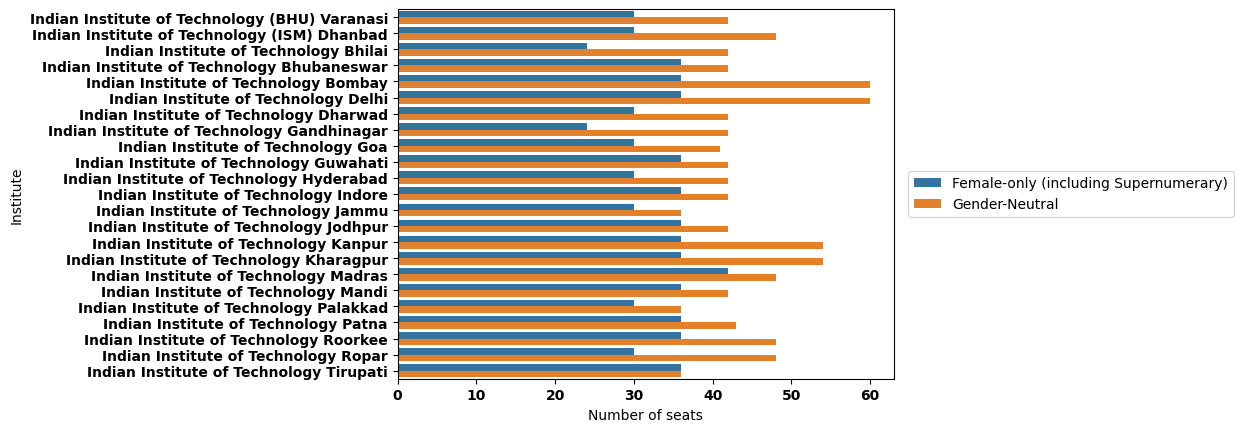

In [101]:
ax=sns.barplot(data=IGCSEIIT4_df,y='Institute',x='Number of seats',hue='Gender',orient='h')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


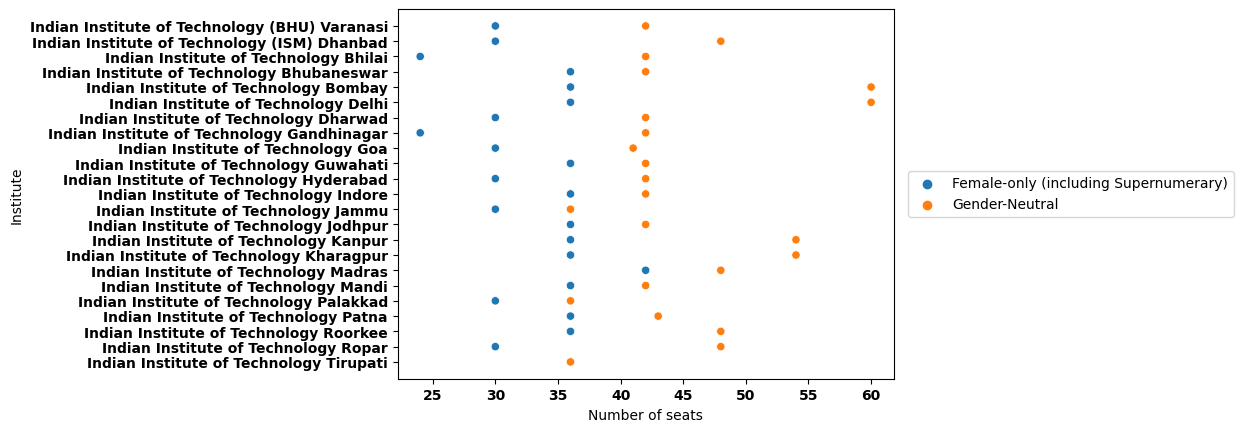

In [102]:
sns.scatterplot(data=IGCSEIIT4_df,y='Institute',x='Number of seats',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

# Grouping Institute (IIT's)with Seat Type and Gender for CS 4 year program


In [103]:
ISGCSEIIT4_df=CSEIIT4_df.groupby(by=['Institute','Seat Type','Gender']).size().reset_index(name='Number of seats')
ISGCSEIIT4_df

Institute      Seat Type  \
0    Indian Institute of Technology (BHU) Varanasi            EWS   
1    Indian Institute of Technology (BHU) Varanasi            EWS   
2    Indian Institute of Technology (BHU) Varanasi        OBC-NCL   
3    Indian Institute of Technology (BHU) Varanasi        OBC-NCL   
4    Indian Institute of Technology (BHU) Varanasi  OBC-NCL (PwD)   
..                                             ...            ...   
295        Indian Institute of Technology Tirupati     OPEN (PwD)   
296        Indian Institute of Technology Tirupati             SC   
297        Indian Institute of Technology Tirupati             SC   
298        Indian Institute of Technology Tirupati             ST   
299        Indian Institute of Technology Tirupati             ST   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)                6  
1                           Gender-Neutral                6  
2    Female-only (including Supernumerary)                6  
3                           Gender-Neutral                6  
4                           Gender-Neutral                6  
..                                     ...              ...  
295  Female-only (including Supernumerary)                6  
296  Female-only (including Supernumerary)                6  
297                         Gender-Neutral                6  
298  Female-only (including Supernumerary)                6  
299                         Gender-Neutral                6  

[300 rows x 4 columns]

# Now getting information about National Institute of Technology (NIT's)

In [104]:
# Creating a NIT dataframe from josaa22_df using all rows where institute name contains National Institute of Technology
NIT_df=josaa22_df.loc[(josaa22_df['Institute'].str.contains('National Institute of Technology',regex=True))]
NIT_df

Institute  \
2830   Dr. B R Ambedkar National Institute of Technol...   
2831   Dr. B R Ambedkar National Institute of Technol...   
2832   Dr. B R Ambedkar National Institute of Technol...   
2833   Dr. B R Ambedkar National Institute of Technol...   
2834   Dr. B R Ambedkar National Institute of Technol...   
...                                                  ...   
57136   National Institute of Technology, Andhra Pradesh   
57137   National Institute of Technology, Andhra Pradesh   
57138   National Institute of Technology, Andhra Pradesh   
57139   National Institute of Technology, Andhra Pradesh   
57140   National Institute of Technology, Andhra Pradesh   

                                   Academic Program Name Quota Seat Type  \
2830    Bio Technology (4 Years, Bachelor of Technology)    HS      OPEN   
2831    Bio Technology (4 Years, Bachelor of Technology)    HS      OPEN   
2832    Bio Technology (4 Years, Bachelor of Technology)    HS       EWS   
2833    Bio Technology (4 Years, Bachelor of Technology)    HS       EWS   
2834    Bio Technology (4 Years, Bachelor of Technology)    HS   OBC-NCL   
...                                                  ...   ...       ...   
57136  Metallurgical and Materials Engineering (4 Yea...    OS   OBC-NCL   
57137  Metallurgical and Materials Engineering (4 Yea...    OS   OBC-NCL   
57138  Metallurgical and Materials Engineering (4 Yea...    OS        SC   
57139  Metallurgical and Materials Engineering (4 Yea...    OS        SC   
57140  Metallurgical and Materials Engineering (4 Yea...    OS        ST   

                                      Gender  Opening Rank  Closing Rank  \
2830                          Gender-Neutral         54131         67053   
2831   Female-only (including Supernumerary)         45890         70992   
2832                          Gender-Neutral         10370         13354   
2833   Female-only (including Supernumerary)         15448         15448   
2834                          Gender-Neutral         29569         49056   
...                                      ...           ...           ...   
57136                         Gender-Neutral         15460         15758   
57137  Female-only (including Supernumerary)         20395         20395   
57138                         Gender-Neutral          7293          7794   
57139  Female-only (including Supernumerary)          9053          9053   
57140                         Gender-Neutral          2342          2342   

       Round  
2830       1  
2831       1  
2832       1  
2833       1  
2834       1  
...      ...  
57136      6  
57137      6  
57138      6  
57139      6  
57140      6  

[31423 rows x 8 columns]

# Getting total number of Rows and Columns

In [105]:
# returns a tuple object showing number of rows and columns
NIT_df.shape

(31423, 8)

# Counting distinct values per column

In [106]:
NITcount_df=NIT_df.nunique(axis=0).reset_index().rename(columns={'index':'Categories',0:'Number'})
NITcount_df

Categories  Number
0              Institute      31
1  Academic Program Name      57
2                  Quota       5
3              Seat Type      10
4                 Gender       2
5           Opening Rank    8403
6           Closing Rank   10621
7                  Round       6

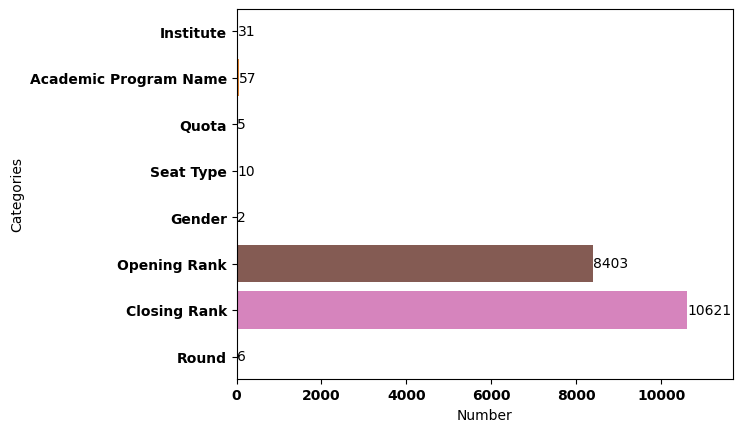

In [107]:
#Plotting the above data using barplot
ax=sns.barplot(data=NITcount_df,y='Categories',x='Number',orient='h')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)

plt.show()

###### from the above data it is clear that :
1. There are 31 NIT's which participated in Jossa counseling process.
2. Total of 57 academic program were offered.
3. There are 5 Quotas

# Total number of seats per NIT

In [108]:
TSNIT_df=NIT_df.groupby(by=['Institute']).size().reset_index(name='Number of seats')
TSNIT_df

Institute  Number of seats
0   Dr. B R Ambedkar National Institute of Technol...             1301
1    Malaviya National Institute of Technology Jaipur             1133
2   Maulana Azad National Institute of Technology ...             1325
3   Motilal Nehru National Institute of Technology...             1143
4           National Institute of Technology Agartala             1273
5   National Institute of Technology Arunachal Pra...              428
6            National Institute of Technology Calicut             1425
7              National Institute of Technology Delhi              628
8           National Institute of Technology Durgapur             1262
9                National Institute of Technology Goa              568
10          National Institute of Technology Hamirpur             1387
11  National Institute of Technology Karnataka, Su...             1466
12         National Institute of Technology Meghalaya              391
13          National Institute of Technology Nagaland              313
14             National Institute of Technology Patna             1472
15        National Institute of Technology Puducherry              478
16            National Institute of Technology Raipur             1500
17            National Institute of Technology Sikkim              340
18   National Institute of Technology, Andhra Pradesh             1045
19       National Institute of Technology, Jamshedpur             1044
20      National Institute of Technology, Kurukshetra              933
21          National Institute of Technology, Manipur              440
22          National Institute of Technology, Mizoram              376
23         National Institute of Technology, Rourkela             2429
24          National Institute of Technology, Silchar              812
25         National Institute of Technology, Srinagar             1021
26  National Institute of Technology, Tiruchirappalli             1414
27      National Institute of Technology, Uttarakhand              492
28         National Institute of Technology, Warangal             1332
29  Sardar Vallabhbhai National Institute of Techn...             1023
30  Visvesvaraya National Institute of Technology,...             1229

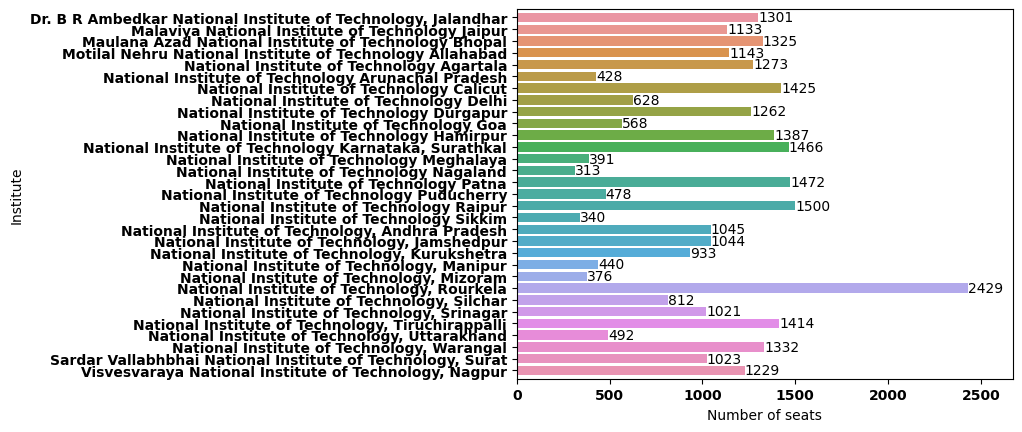

In [109]:
#Plotting the above data using barplot
ax=sns.barplot(data=TSNIT_df,x='Number of seats',y='Institute')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Counting total number of seats based on Seat Type for NIT's


In [110]:
SNIT_df=NIT_df['Seat Type'].value_counts().reset_index()
SNIT_df

index  Seat Type
0           OPEN       6367
1        OBC-NCL       5873
2             SC       5603
3            EWS       5040
4             ST       4920
5     OPEN (PwD)       1805
6  OBC-NCL (PwD)       1077
7      EWS (PwD)        312
8       SC (PwD)        269
9       ST (PwD)        157

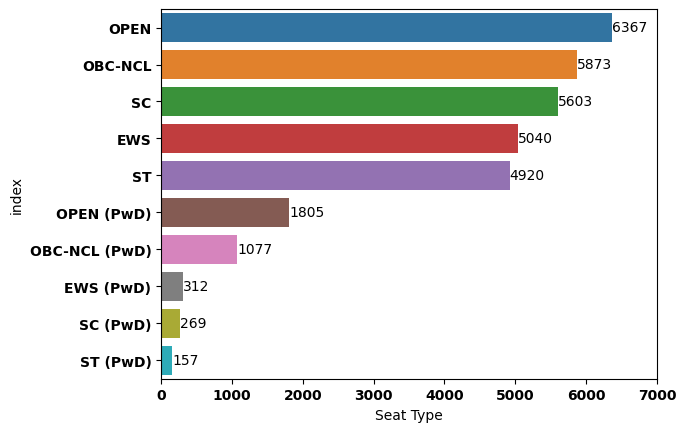

In [111]:
#Plotting the above data using barplot
ax=sns.barplot(data=SNIT_df,x='Seat Type',y='index')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Counting total number of seats based on Gender for NIT's

In [112]:
GNIT_df=NIT_df.groupby(by='Gender').size().reset_index(name='Number of seats')
GNIT_df

Gender  Number of seats
0  Female-only (including Supernumerary)            12865
1                         Gender-Neutral            18558

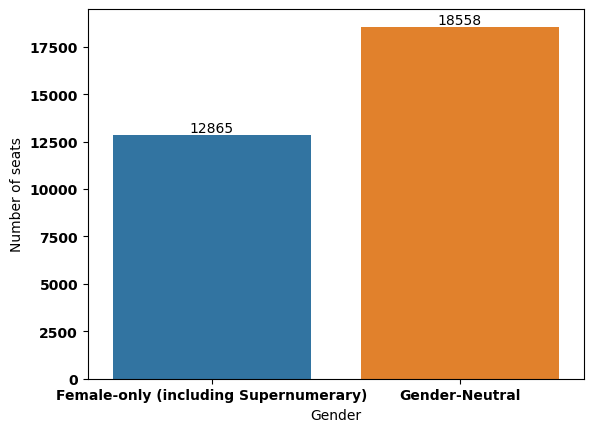

In [113]:
#Plotting the above data using barplot
ax=sns.barplot(data=GNIT_df,x='Gender',y='Number of seats')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()

# Counting total number of seats based on Quota for NIT's

In [114]:
TQNIT_df=NIT_df.groupby(by=['Quota']).size().reset_index(name='Number of seats') 
TQNIT_df

Quota  Number of seats
0    GO              202
1    HS            14130
2    JK              425
3    LA               72
4    OS            16594

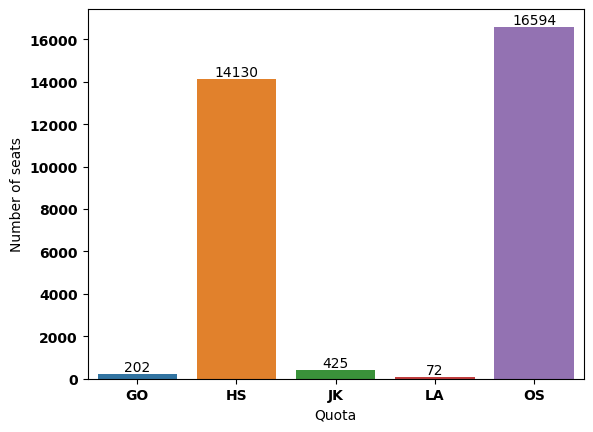

In [115]:
#Plotting the above data using barplot
ax=sns.barplot(data=TQNIT_df,y='Number of seats',x='Quota') 
plt.xticks(fontweight='bold') 
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0]) 
plt.show()

# Grouping by Seat Type and Quota for all NIT's

In [116]:
SQNIT_df=NIT_df.groupby(by=['Seat Type','Quota']).size().reset_index(name='Number of seats')
SQNIT_df

Seat Type Quota  Number of seats
0             EWS    GO               16
1             EWS    HS             2310
2             EWS    JK               50
3             EWS    OS             2664
4       EWS (PwD)    HS               61
5       EWS (PwD)    OS              251
6         OBC-NCL    GO               54
7         OBC-NCL    HS             2618
8         OBC-NCL    JK               63
9         OBC-NCL    OS             3138
10  OBC-NCL (PwD)    HS              403
11  OBC-NCL (PwD)    JK                8
12  OBC-NCL (PwD)    OS              666
13           OPEN    GO               60
14           OPEN    HS             2959
15           OPEN    JK               96
16           OPEN    LA               72
17           OPEN    OS             3180
18     OPEN (PwD)    GO               12
19     OPEN (PwD)    HS              750
20     OPEN (PwD)    JK               32
21     OPEN (PwD)    OS             1011
22             SC    GO               24
23             SC    HS             2584
24             SC    JK               85
25             SC    OS             2910
26       SC (PwD)    HS              105
27       SC (PwD)    OS              164
28             ST    GO               36
29             ST    HS             2297
30             ST    JK               91
31             ST    OS             2496
32       ST (PwD)    HS               43
33       ST (PwD)    OS              114

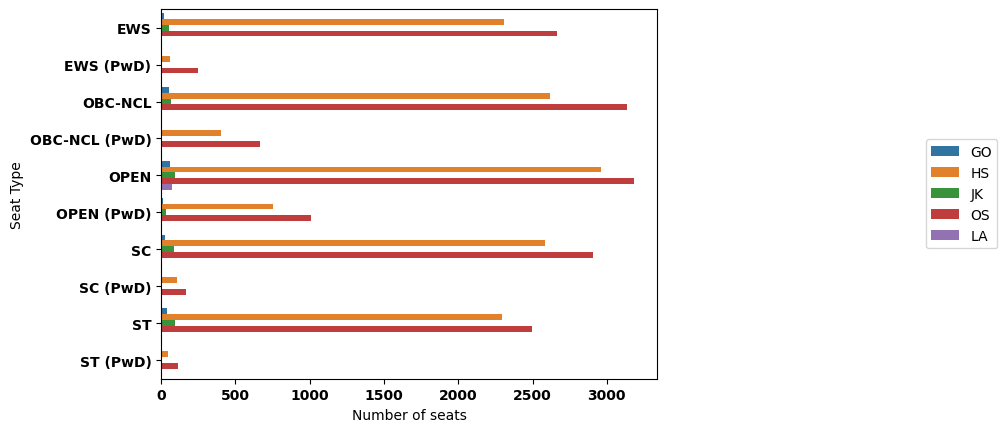

In [117]:
#Plotting the above data using barplot
ax=sns.barplot(data=SQNIT_df,x='Number of seats',y='Seat Type',hue='Quota')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()



# Grouping by Seat Type and Gender for all NIT's

In [118]:
SGNIT_df=NIT_df.groupby(by=['Seat Type','Gender']).size().reset_index(name='Number of seats')
SGNIT_df

Seat Type                                 Gender  Number of seats
0             EWS  Female-only (including Supernumerary)             2138
1             EWS                         Gender-Neutral             2902
2       EWS (PwD)  Female-only (including Supernumerary)               38
3       EWS (PwD)                         Gender-Neutral              274
4         OBC-NCL  Female-only (including Supernumerary)             2762
5         OBC-NCL                         Gender-Neutral             3111
6   OBC-NCL (PwD)  Female-only (including Supernumerary)              117
7   OBC-NCL (PwD)                         Gender-Neutral              960
8            OPEN  Female-only (including Supernumerary)             3067
9            OPEN                         Gender-Neutral             3300
10     OPEN (PwD)  Female-only (including Supernumerary)              307
11     OPEN (PwD)                         Gender-Neutral             1498
12             SC  Female-only (including Supernumerary)             2480
13             SC                         Gender-Neutral             3123
14       SC (PwD)  Female-only (including Supernumerary)               12
15       SC (PwD)                         Gender-Neutral              257
16             ST  Female-only (including Supernumerary)             1938
17             ST                         Gender-Neutral             2982
18       ST (PwD)  Female-only (including Supernumerary)                6
19       ST (PwD)                         Gender-Neutral              151

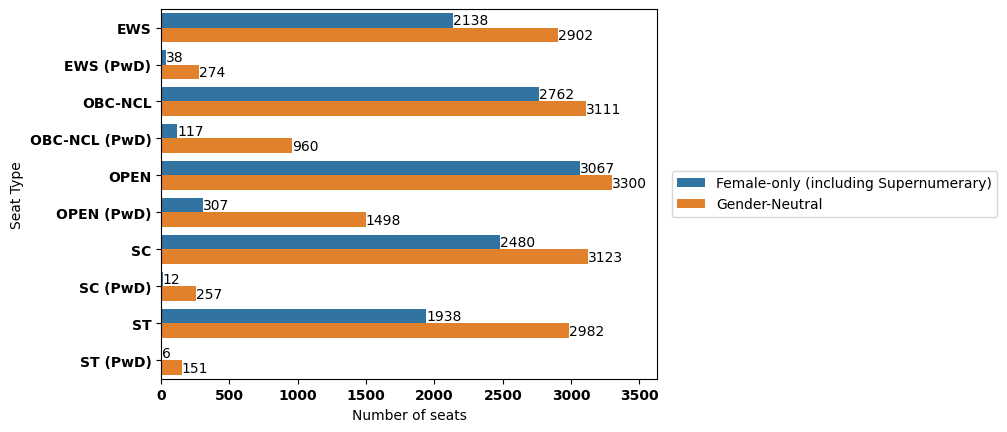

In [119]:
#Plotting the above data using barplot
ax=sns.barplot(data=SGNIT_df,x='Number of seats',y='Seat Type',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
for container in ax.containers:
    ax.bar_label(container)
ax.margins(0.1,0.01)
plt.show()



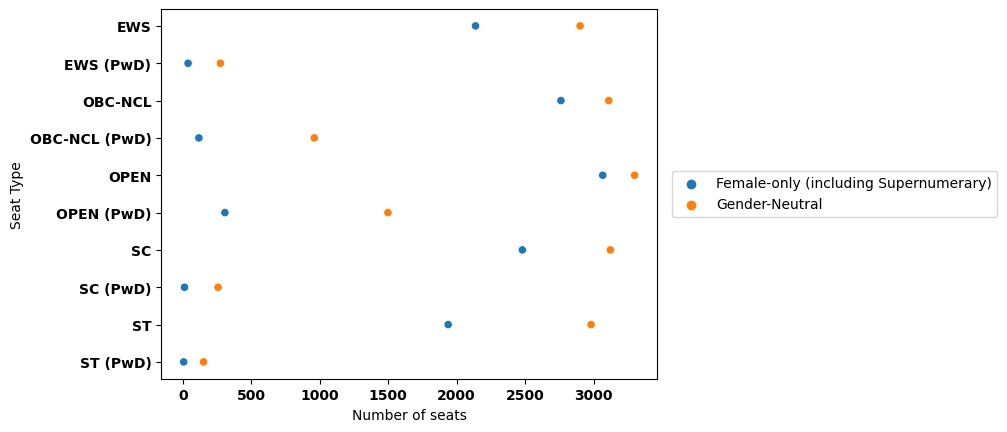

In [120]:
#Plotting the above data using Scatterplot
sns.scatterplot(data=SGNIT_df,y='Seat Type',x='Number of seats',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

# Grouping by Seat Type , Quota and Gender for all NIT's

In [121]:
SQGNIT_df=NIT_df.groupby(by=['Seat Type','Quota','Gender']).size().reset_index(name='Number of seats')
SQGNIT_df

Seat Type Quota                                 Gender  Number of seats
0        EWS    GO  Female-only (including Supernumerary)                1
1        EWS    GO                         Gender-Neutral               15
2        EWS    HS  Female-only (including Supernumerary)             1009
3        EWS    HS                         Gender-Neutral             1301
4        EWS    JK  Female-only (including Supernumerary)                6
..       ...   ...                                    ...              ...
58        ST    OS  Female-only (including Supernumerary)              978
59        ST    OS                         Gender-Neutral             1518
60  ST (PwD)    HS                         Gender-Neutral               43
61  ST (PwD)    OS  Female-only (including Supernumerary)                6
62  ST (PwD)    OS                         Gender-Neutral              108

[63 rows x 4 columns]

In [122]:
NIT_df.head()

Institute  \
2830  Dr. B R Ambedkar National Institute of Technol...   
2831  Dr. B R Ambedkar National Institute of Technol...   
2832  Dr. B R Ambedkar National Institute of Technol...   
2833  Dr. B R Ambedkar National Institute of Technol...   
2834  Dr. B R Ambedkar National Institute of Technol...   

                                 Academic Program Name Quota Seat Type  \
2830  Bio Technology (4 Years, Bachelor of Technology)    HS      OPEN   
2831  Bio Technology (4 Years, Bachelor of Technology)    HS      OPEN   
2832  Bio Technology (4 Years, Bachelor of Technology)    HS       EWS   
2833  Bio Technology (4 Years, Bachelor of Technology)    HS       EWS   
2834  Bio Technology (4 Years, Bachelor of Technology)    HS   OBC-NCL   

                                     Gender  Opening Rank  Closing Rank  Round  
2830                         Gender-Neutral         54131         67053      1  
2831  Female-only (including Supernumerary)         45890         70992      1  
2832                         Gender-Neutral         10370         13354      1  
2833  Female-only (including Supernumerary)         15448         15448      1  
2834                         Gender-Neutral         29569         49056      1

# Grouping by Institute(NIT's) and Academic Program Name

In [123]:
IANIT_df=NIT_df.groupby(by=['Institute','Academic Program Name']).size().reset_index(name='Number of seats')
IANIT_df

Institute  \
0    Dr. B R Ambedkar National Institute of Technol...   
1    Dr. B R Ambedkar National Institute of Technol...   
2    Dr. B R Ambedkar National Institute of Technol...   
3    Dr. B R Ambedkar National Institute of Technol...   
4    Dr. B R Ambedkar National Institute of Technol...   
..                                                 ...   
267  Visvesvaraya National Institute of Technology,...   
268  Visvesvaraya National Institute of Technology,...   
269  Visvesvaraya National Institute of Technology,...   
270  Visvesvaraya National Institute of Technology,...   
271  Visvesvaraya National Institute of Technology,...   

                                 Academic Program Name  Number of seats  
0     Bio Technology (4 Years, Bachelor of Technology)              103  
1    Chemical Engineering (4 Years, Bachelor of Tec...              112  
2    Civil Engineering (4 Years, Bachelor of Techno...              103  
3    Computer Science and Engineering (4 Years, Bac...              156  
4    Electrical Engineering (4 Years, Bachelor of T...              114  
..                                                 ...              ...  
267  Electrical and Electronics Engineering (4 Year...              156  
268  Electronics and Communication Engineering (4 Y...              144  
269  Mechanical Engineering (4 Years, Bachelor of T...              144  
270  Metallurgical and Materials Engineering (4 Yea...              132  
271  Mining Engineering (4 Years, Bachelor of Techn...               96  

[272 rows x 3 columns]

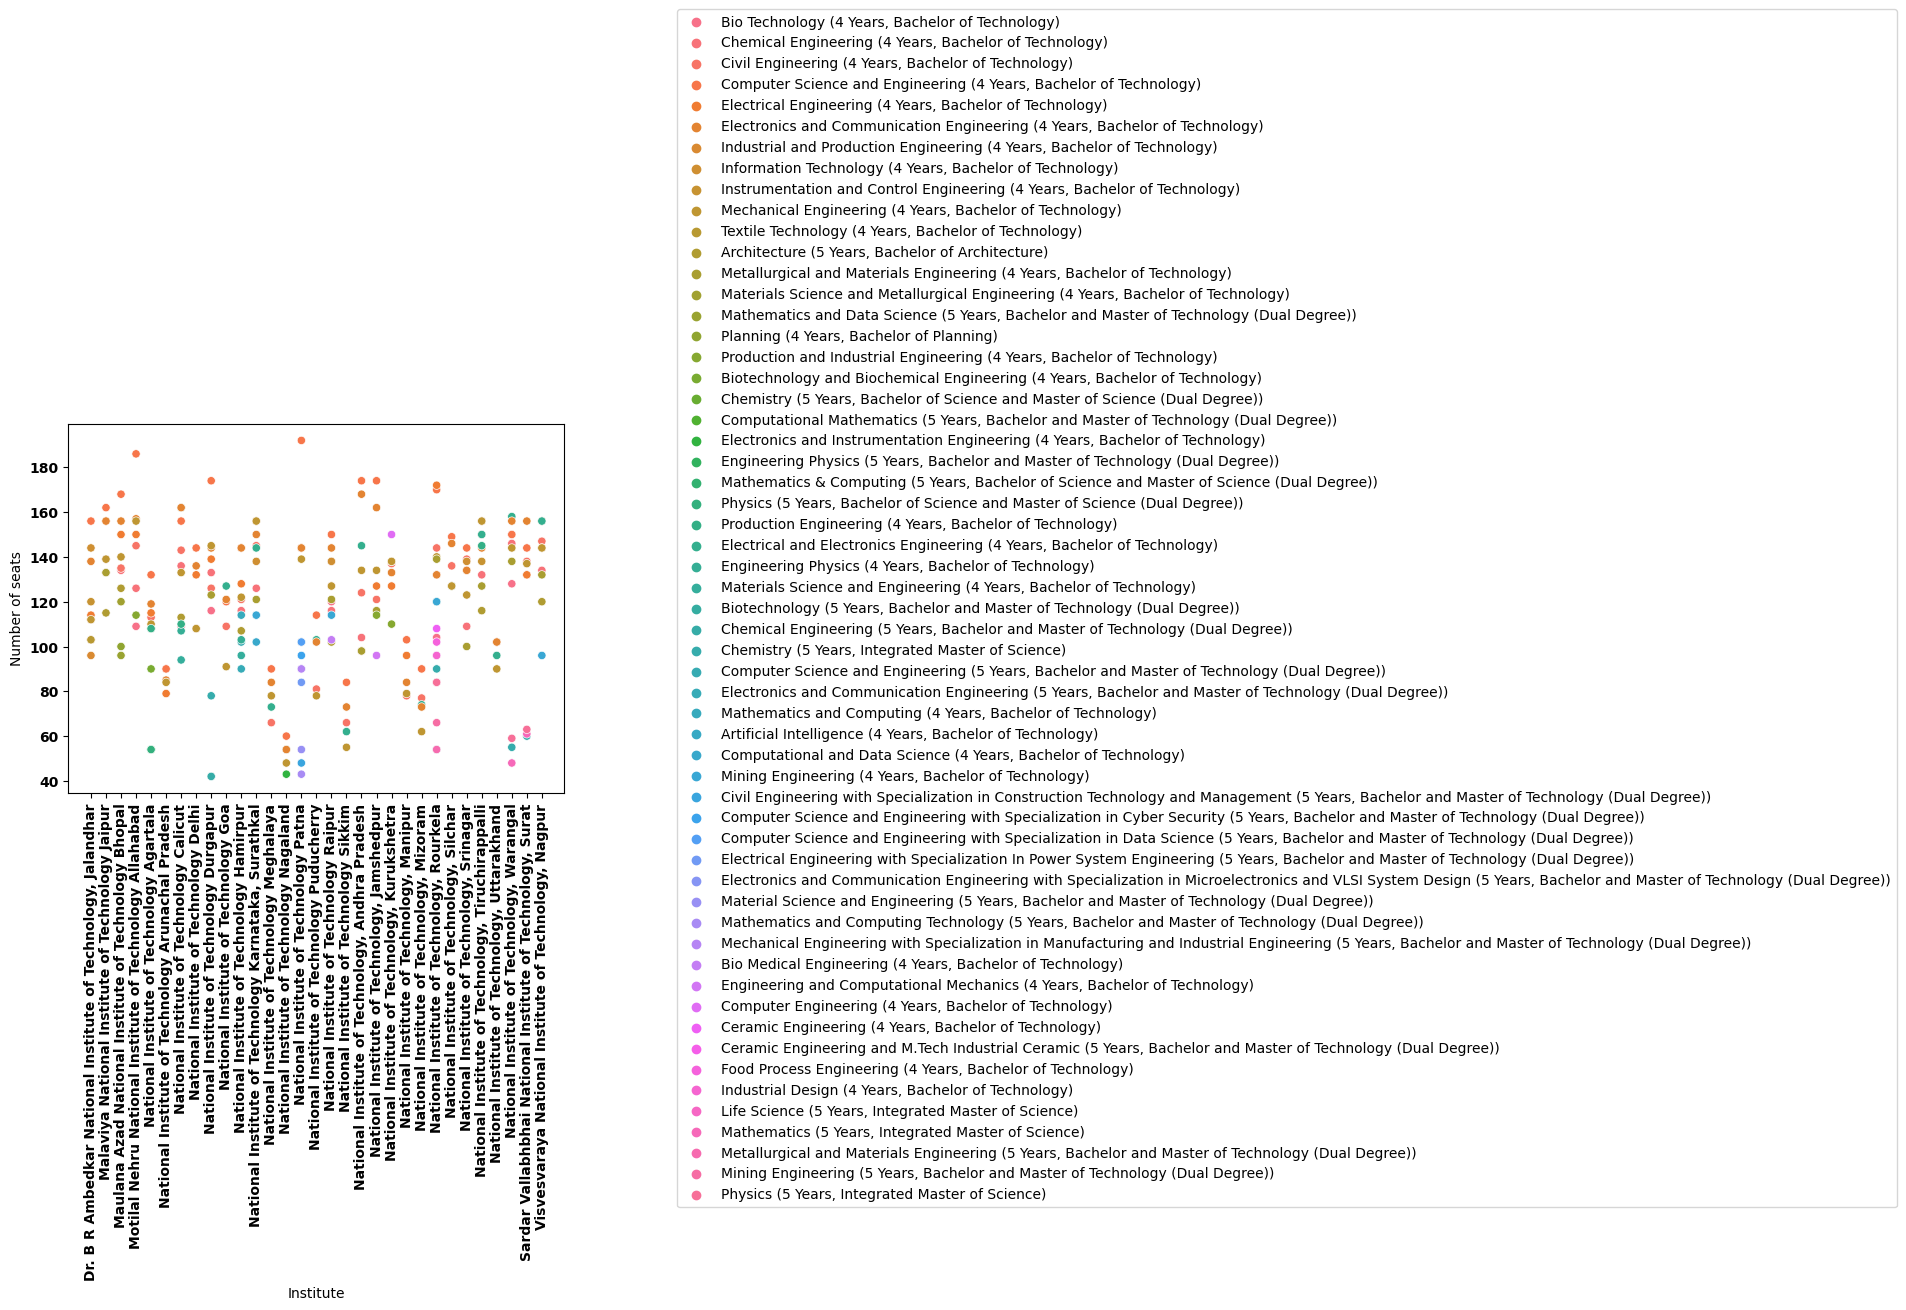

In [124]:
#Plotting the above data using Scatterplot
ax=sns.scatterplot(data=IANIT_df,x='Institute',y='Number of seats',hue='Academic Program Name')
plt.legend(bbox_to_anchor=(3.70, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Institute(NIT's) and Quota

In [125]:
IQNIT_df=NIT_df.groupby(by=['Institute','Quota']).size().reset_index(name='Number of seats')
IQNIT_df

Institute Quota  Number of seats
0   Dr. B R Ambedkar National Institute of Technol...    HS              572
1   Dr. B R Ambedkar National Institute of Technol...    OS              729
2    Malaviya National Institute of Technology Jaipur    HS              555
3    Malaviya National Institute of Technology Jaipur    OS              578
4   Maulana Azad National Institute of Technology ...    HS              645
..                                                ...   ...              ...
59         National Institute of Technology, Warangal    OS              677
60  Sardar Vallabhbhai National Institute of Techn...    HS              479
61  Sardar Vallabhbhai National Institute of Techn...    OS              544
62  Visvesvaraya National Institute of Technology,...    HS              609
63  Visvesvaraya National Institute of Technology,...    OS              620

[64 rows x 3 columns]

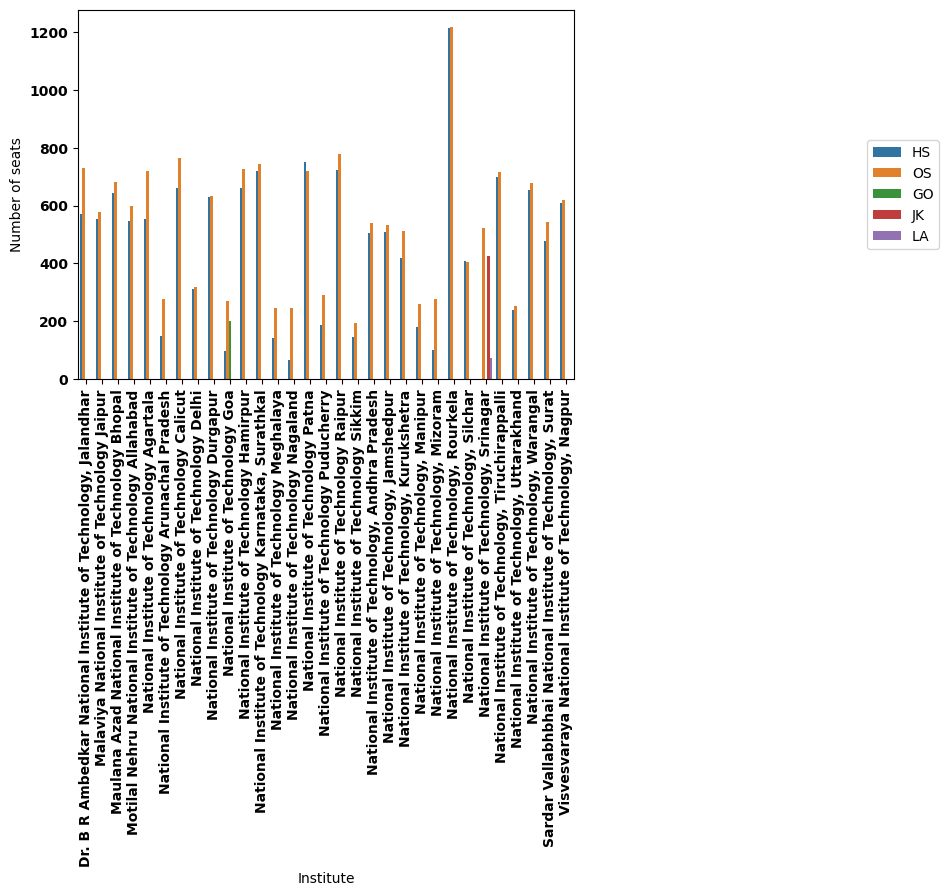

In [126]:
#Plotting the above data using barplot
ax=sns.barplot(data=IQNIT_df,x='Institute',y='Number of seats',hue='Quota')
plt.legend(bbox_to_anchor=(1.75, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Institute(NIT's) and Seat Type

In [127]:
ISNIT_df=NIT_df.groupby(by=['Institute','Seat Type']).size().reset_index(name='Number of seats')
ISNIT_df

Institute      Seat Type  \
0    Dr. B R Ambedkar National Institute of Technol...            EWS   
1    Dr. B R Ambedkar National Institute of Technol...      EWS (PwD)   
2    Dr. B R Ambedkar National Institute of Technol...        OBC-NCL   
3    Dr. B R Ambedkar National Institute of Technol...  OBC-NCL (PwD)   
4    Dr. B R Ambedkar National Institute of Technol...           OPEN   
..                                                 ...            ...   
269  Visvesvaraya National Institute of Technology,...     OPEN (PwD)   
270  Visvesvaraya National Institute of Technology,...             SC   
271  Visvesvaraya National Institute of Technology,...       SC (PwD)   
272  Visvesvaraya National Institute of Technology,...             ST   
273  Visvesvaraya National Institute of Technology,...       ST (PwD)   

     Number of seats  
0                252  
1                  7  
2                264  
3                 33  
4                264  
..               ...  
269               96  
270              216  
271               13  
272              192  
273                6  

[274 rows x 3 columns]

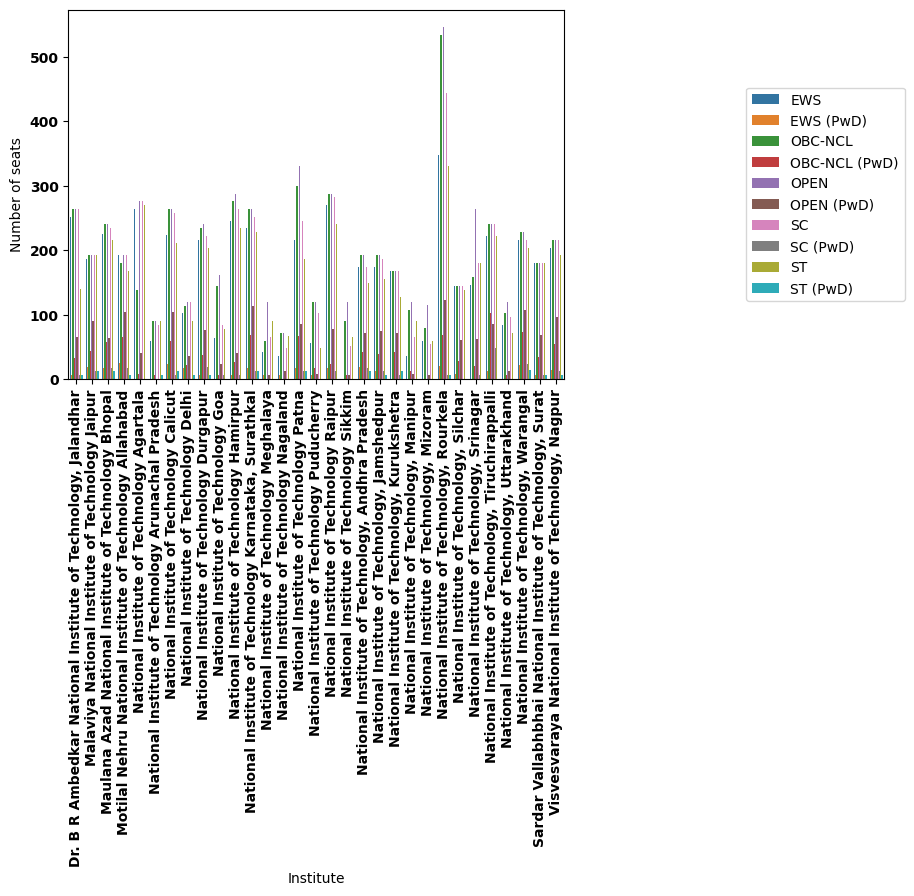

In [128]:
#Plotting the above data using barplot
ax=sns.barplot(data=ISNIT_df,x='Institute',y='Number of seats',hue='Seat Type')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


# Grouping by Institute(NIT's) and Gender

In [129]:
IGNIT_df=NIT_df.groupby(by=['Institute','Gender']).size().reset_index(name='Number of seats')
IGNIT_df

Institute  \
0   Dr. B R Ambedkar National Institute of Technol...   
1   Dr. B R Ambedkar National Institute of Technol...   
2    Malaviya National Institute of Technology Jaipur   
3    Malaviya National Institute of Technology Jaipur   
4   Maulana Azad National Institute of Technology ...   
..                                                ...   
57         National Institute of Technology, Warangal   
58  Sardar Vallabhbhai National Institute of Techn...   
59  Sardar Vallabhbhai National Institute of Techn...   
60  Visvesvaraya National Institute of Technology,...   
61  Visvesvaraya National Institute of Technology,...   

                                   Gender  Number of seats  
0   Female-only (including Supernumerary)              589  
1                          Gender-Neutral              712  
2   Female-only (including Supernumerary)              498  
3                          Gender-Neutral              635  
4   Female-only (including Supernumerary)              556  
..                                    ...              ...  
57                         Gender-Neutral              839  
58  Female-only (including Supernumerary)              372  
59                         Gender-Neutral              651  
60  Female-only (including Supernumerary)              504  
61                         Gender-Neutral              725  

[62 rows x 3 columns]

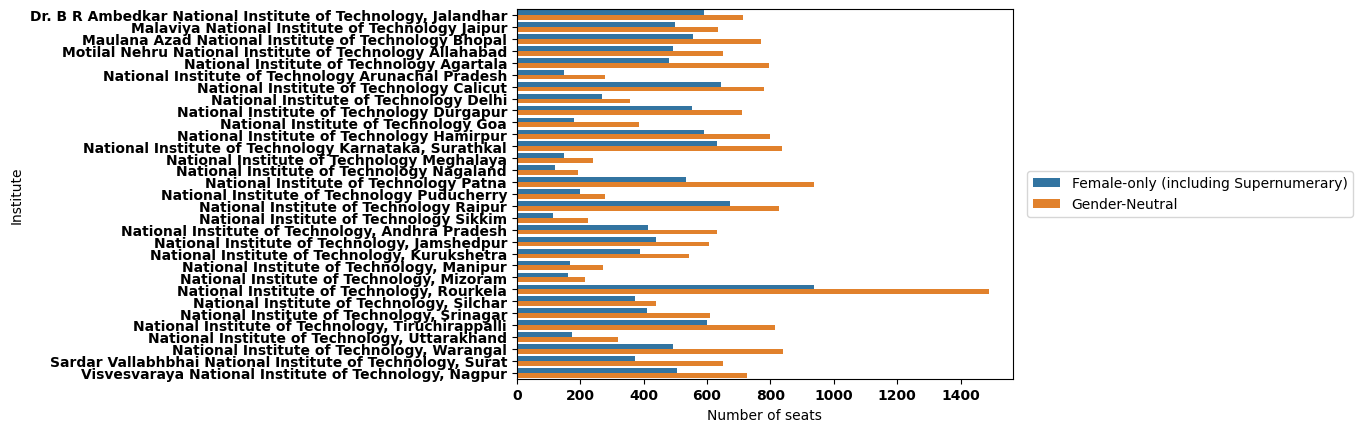

In [130]:
#Plotting the above data using barplot
ax=sns.barplot(data=IGNIT_df,x='Number of seats',y='Institute',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()



# Grouping by Institute(NIT's) ,Academic Program Name and Quota 

In [131]:
IAQNIT_df=NIT_df.groupby(by=['Institute','Academic Program Name','Quota']).size().reset_index(name='Number of seats')
IAQNIT_df

Institute  \
0    Dr. B R Ambedkar National Institute of Technol...   
1    Dr. B R Ambedkar National Institute of Technol...   
2    Dr. B R Ambedkar National Institute of Technol...   
3    Dr. B R Ambedkar National Institute of Technol...   
4    Dr. B R Ambedkar National Institute of Technol...   
..                                                 ...   
552  Visvesvaraya National Institute of Technology,...   
553  Visvesvaraya National Institute of Technology,...   
554  Visvesvaraya National Institute of Technology,...   
555  Visvesvaraya National Institute of Technology,...   
556  Visvesvaraya National Institute of Technology,...   

                                 Academic Program Name Quota  Number of seats  
0     Bio Technology (4 Years, Bachelor of Technology)    HS               48  
1     Bio Technology (4 Years, Bachelor of Technology)    OS               55  
2    Chemical Engineering (4 Years, Bachelor of Tec...    HS               49  
3    Chemical Engineering (4 Years, Bachelor of Tec...    OS               63  
4    Civil Engineering (4 Years, Bachelor of Techno...    HS               49  
..                                                 ...   ...              ...  
552  Mechanical Engineering (4 Years, Bachelor of T...    OS               72  
553  Metallurgical and Materials Engineering (4 Yea...    HS               66  
554  Metallurgical and Materials Engineering (4 Yea...    OS               66  
555  Mining Engineering (4 Years, Bachelor of Techn...    HS               48  
556  Mining Engineering (4 Years, Bachelor of Techn...    OS               48  

[557 rows x 4 columns]

# Grouping by Institute(NIT's) ,Academic Program Name and Seat Type¶

In [132]:
IASNIT_df=NIT_df.groupby(by=['Institute','Academic Program Name','Seat Type']).size().reset_index(name='Number of seats')
IASNIT_df

Institute  \
0     Dr. B R Ambedkar National Institute of Technol...   
1     Dr. B R Ambedkar National Institute of Technol...   
2     Dr. B R Ambedkar National Institute of Technol...   
3     Dr. B R Ambedkar National Institute of Technol...   
4     Dr. B R Ambedkar National Institute of Technol...   
...                                                 ...   
1803  Visvesvaraya National Institute of Technology,...   
1804  Visvesvaraya National Institute of Technology,...   
1805  Visvesvaraya National Institute of Technology,...   
1806  Visvesvaraya National Institute of Technology,...   
1807  Visvesvaraya National Institute of Technology,...   

                                  Academic Program Name   Seat Type  \
0      Bio Technology (4 Years, Bachelor of Technology)         EWS   
1      Bio Technology (4 Years, Bachelor of Technology)     OBC-NCL   
2      Bio Technology (4 Years, Bachelor of Technology)        OPEN   
3      Bio Technology (4 Years, Bachelor of Technology)  OPEN (PwD)   
4      Bio Technology (4 Years, Bachelor of Technology)          SC   
...                                                 ...         ...   
1803  Mining Engineering (4 Years, Bachelor of Techn...         EWS   
1804  Mining Engineering (4 Years, Bachelor of Techn...     OBC-NCL   
1805  Mining Engineering (4 Years, Bachelor of Techn...        OPEN   
1806  Mining Engineering (4 Years, Bachelor of Techn...          SC   
1807  Mining Engineering (4 Years, Bachelor of Techn...          ST   

      Number of seats  
0                  24  
1                  24  
2                  24  
3                   1  
4                  24  
...               ...  
1803               12  
1804               24  
1805               24  
1806               24  
1807               12  

[1808 rows x 4 columns]

# Grouping by Institute(NIT's) ,Academic Program Name and Gender

In [133]:
IAGNIT_df=NIT_df.groupby(by=['Institute','Academic Program Name','Gender']).size().reset_index(name='Number of seats')
IAGNIT_df

Institute  \
0    Dr. B R Ambedkar National Institute of Technol...   
1    Dr. B R Ambedkar National Institute of Technol...   
2    Dr. B R Ambedkar National Institute of Technol...   
3    Dr. B R Ambedkar National Institute of Technol...   
4    Dr. B R Ambedkar National Institute of Technol...   
..                                                 ...   
528  Visvesvaraya National Institute of Technology,...   
529  Visvesvaraya National Institute of Technology,...   
530  Visvesvaraya National Institute of Technology,...   
531  Visvesvaraya National Institute of Technology,...   
532  Visvesvaraya National Institute of Technology,...   

                                 Academic Program Name  \
0     Bio Technology (4 Years, Bachelor of Technology)   
1     Bio Technology (4 Years, Bachelor of Technology)   
2    Chemical Engineering (4 Years, Bachelor of Tec...   
3    Chemical Engineering (4 Years, Bachelor of Tec...   
4    Civil Engineering (4 Years, Bachelor of Techno...   
..                                                 ...   
528  Mechanical Engineering (4 Years, Bachelor of T...   
529  Metallurgical and Materials Engineering (4 Yea...   
530  Metallurgical and Materials Engineering (4 Yea...   
531  Mining Engineering (4 Years, Bachelor of Techn...   
532  Mining Engineering (4 Years, Bachelor of Techn...   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)               48  
1                           Gender-Neutral               55  
2    Female-only (including Supernumerary)               55  
3                           Gender-Neutral               57  
4    Female-only (including Supernumerary)               48  
..                                     ...              ...  
528                         Gender-Neutral               84  
529  Female-only (including Supernumerary)               60  
530                         Gender-Neutral               72  
531  Female-only (including Supernumerary)               36  
532                         Gender-Neutral               60  

[533 rows x 4 columns]

# Grouping by Institute(NIT's) ,Quota and Seat Type

In [134]:
IQSNIT_df=NIT_df.groupby(by=['Institute','Quota','Seat Type']).size().reset_index(name='Number of seats')
IQSNIT_df

Institute Quota      Seat Type  \
0    Dr. B R Ambedkar National Institute of Technol...    HS            EWS   
1    Dr. B R Ambedkar National Institute of Technol...    HS        OBC-NCL   
2    Dr. B R Ambedkar National Institute of Technol...    HS  OBC-NCL (PwD)   
3    Dr. B R Ambedkar National Institute of Technol...    HS           OPEN   
4    Dr. B R Ambedkar National Institute of Technol...    HS     OPEN (PwD)   
..                                                 ...   ...            ...   
490  Visvesvaraya National Institute of Technology,...    OS     OPEN (PwD)   
491  Visvesvaraya National Institute of Technology,...    OS             SC   
492  Visvesvaraya National Institute of Technology,...    OS       SC (PwD)   
493  Visvesvaraya National Institute of Technology,...    OS             ST   
494  Visvesvaraya National Institute of Technology,...    OS       ST (PwD)   

     Number of seats  
0                126  
1                132  
2                  6  
3                132  
4                 18  
..               ...  
490               48  
491              108  
492                6  
493               96  
494                6  

[495 rows x 4 columns]

# Grouping by Institute ,Quota and Gender

In [135]:
IQGNIT_df=NIT_df.groupby(by=['Institute','Quota','Gender']).size().reset_index(name='Number of seats')
IQGNIT_df

Institute Quota  \
0    Dr. B R Ambedkar National Institute of Technol...    HS   
1    Dr. B R Ambedkar National Institute of Technol...    HS   
2    Dr. B R Ambedkar National Institute of Technol...    OS   
3    Dr. B R Ambedkar National Institute of Technol...    OS   
4     Malaviya National Institute of Technology Jaipur    HS   
..                                                 ...   ...   
123  Sardar Vallabhbhai National Institute of Techn...    OS   
124  Visvesvaraya National Institute of Technology,...    HS   
125  Visvesvaraya National Institute of Technology,...    HS   
126  Visvesvaraya National Institute of Technology,...    OS   
127  Visvesvaraya National Institute of Technology,...    OS   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)              265  
1                           Gender-Neutral              307  
2    Female-only (including Supernumerary)              324  
3                           Gender-Neutral              405  
4    Female-only (including Supernumerary)              246  
..                                     ...              ...  
123                         Gender-Neutral              352  
124  Female-only (including Supernumerary)              252  
125                         Gender-Neutral              357  
126  Female-only (including Supernumerary)              252  
127                         Gender-Neutral              368  

[128 rows x 4 columns]

# Grouping by Institute ,Seat Type and Gender

In [136]:
ISGNIT_df=NIT_df.groupby(by=['Institute','Seat Type','Gender']).size().reset_index(name='Number of seats')
ISGNIT_df

Institute  Seat Type  \
0    Dr. B R Ambedkar National Institute of Technol...        EWS   
1    Dr. B R Ambedkar National Institute of Technol...        EWS   
2    Dr. B R Ambedkar National Institute of Technol...  EWS (PwD)   
3    Dr. B R Ambedkar National Institute of Technol...  EWS (PwD)   
4    Dr. B R Ambedkar National Institute of Technol...    OBC-NCL   
..                                                 ...        ...   
460  Visvesvaraya National Institute of Technology,...         SC   
461  Visvesvaraya National Institute of Technology,...   SC (PwD)   
462  Visvesvaraya National Institute of Technology,...         ST   
463  Visvesvaraya National Institute of Technology,...         ST   
464  Visvesvaraya National Institute of Technology,...   ST (PwD)   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)              120  
1                           Gender-Neutral              132  
2    Female-only (including Supernumerary)                6  
3                           Gender-Neutral                1  
4    Female-only (including Supernumerary)              132  
..                                     ...              ...  
460                         Gender-Neutral              108  
461                         Gender-Neutral               13  
462  Female-only (including Supernumerary)               84  
463                         Gender-Neutral              108  
464                         Gender-Neutral                6  

[465 rows x 4 columns]

# Grouping by Institute ,Academic Program Name ,Quota and Seat Type

In [137]:
IAQSNIT_df=NIT_df.groupby(by=['Institute','Academic Program Name','Quota','Seat Type']).size().reset_index(name='Number of seats')
IAQSNIT_df

Institute  \
0     Dr. B R Ambedkar National Institute of Technol...   
1     Dr. B R Ambedkar National Institute of Technol...   
2     Dr. B R Ambedkar National Institute of Technol...   
3     Dr. B R Ambedkar National Institute of Technol...   
4     Dr. B R Ambedkar National Institute of Technol...   
...                                                 ...   
3246  Visvesvaraya National Institute of Technology,...   
3247  Visvesvaraya National Institute of Technology,...   
3248  Visvesvaraya National Institute of Technology,...   
3249  Visvesvaraya National Institute of Technology,...   
3250  Visvesvaraya National Institute of Technology,...   

                                  Academic Program Name Quota Seat Type  \
0      Bio Technology (4 Years, Bachelor of Technology)    HS       EWS   
1      Bio Technology (4 Years, Bachelor of Technology)    HS   OBC-NCL   
2      Bio Technology (4 Years, Bachelor of Technology)    HS      OPEN   
3      Bio Technology (4 Years, Bachelor of Technology)    HS        SC   
4      Bio Technology (4 Years, Bachelor of Technology)    OS       EWS   
...                                                 ...   ...       ...   
3246  Mining Engineering (4 Years, Bachelor of Techn...    OS       EWS   
3247  Mining Engineering (4 Years, Bachelor of Techn...    OS   OBC-NCL   
3248  Mining Engineering (4 Years, Bachelor of Techn...    OS      OPEN   
3249  Mining Engineering (4 Years, Bachelor of Techn...    OS        SC   
3250  Mining Engineering (4 Years, Bachelor of Techn...    OS        ST   

      Number of seats  
0                  12  
1                  12  
2                  12  
3                  12  
4                  12  
...               ...  
3246                6  
3247               12  
3248               12  
3249               12  
3250                6  

[3251 rows x 5 columns]

# Grouping by Institute ,Academic Program Name ,Quota and Gender

In [138]:
IAQGNIT_df=NIT_df.groupby(by=['Institute','Academic Program Name','Quota','Gender']).size().reset_index(name='Number of seats')
IAQGNIT_df

Institute  \
0     Dr. B R Ambedkar National Institute of Technol...   
1     Dr. B R Ambedkar National Institute of Technol...   
2     Dr. B R Ambedkar National Institute of Technol...   
3     Dr. B R Ambedkar National Institute of Technol...   
4     Dr. B R Ambedkar National Institute of Technol...   
...                                                 ...   
1081  Visvesvaraya National Institute of Technology,...   
1082  Visvesvaraya National Institute of Technology,...   
1083  Visvesvaraya National Institute of Technology,...   
1084  Visvesvaraya National Institute of Technology,...   
1085  Visvesvaraya National Institute of Technology,...   

                                  Academic Program Name Quota  \
0      Bio Technology (4 Years, Bachelor of Technology)    HS   
1      Bio Technology (4 Years, Bachelor of Technology)    HS   
2      Bio Technology (4 Years, Bachelor of Technology)    OS   
3      Bio Technology (4 Years, Bachelor of Technology)    OS   
4     Chemical Engineering (4 Years, Bachelor of Tec...    HS   
...                                                 ...   ...   
1081  Metallurgical and Materials Engineering (4 Yea...    OS   
1082  Mining Engineering (4 Years, Bachelor of Techn...    HS   
1083  Mining Engineering (4 Years, Bachelor of Techn...    HS   
1084  Mining Engineering (4 Years, Bachelor of Techn...    OS   
1085  Mining Engineering (4 Years, Bachelor of Techn...    OS   

                                     Gender  Number of seats  
0     Female-only (including Supernumerary)               24  
1                            Gender-Neutral               24  
2     Female-only (including Supernumerary)               24  
3                            Gender-Neutral               31  
4     Female-only (including Supernumerary)               25  
...                                     ...              ...  
1081                         Gender-Neutral               36  
1082  Female-only (including Supernumerary)               18  
1083                         Gender-Neutral               30  
1084  Female-only (including Supernumerary)               18  
1085                         Gender-Neutral               30  

[1086 rows x 5 columns]

# Grouping by Institute ,Academic Program Name ,Quota ,Seat Type and Gender

In [139]:
IAQSGNIT_df=NIT_df.groupby(by=['Institute','Academic Program Name','Quota','Seat Type','Gender']).size().reset_index(name='Number of seats')
IAQSGNIT_df

Institute  \
0     Dr. B R Ambedkar National Institute of Technol...   
1     Dr. B R Ambedkar National Institute of Technol...   
2     Dr. B R Ambedkar National Institute of Technol...   
3     Dr. B R Ambedkar National Institute of Technol...   
4     Dr. B R Ambedkar National Institute of Technol...   
...                                                 ...   
5356  Visvesvaraya National Institute of Technology,...   
5357  Visvesvaraya National Institute of Technology,...   
5358  Visvesvaraya National Institute of Technology,...   
5359  Visvesvaraya National Institute of Technology,...   
5360  Visvesvaraya National Institute of Technology,...   

                                  Academic Program Name Quota Seat Type  \
0      Bio Technology (4 Years, Bachelor of Technology)    HS       EWS   
1      Bio Technology (4 Years, Bachelor of Technology)    HS       EWS   
2      Bio Technology (4 Years, Bachelor of Technology)    HS   OBC-NCL   
3      Bio Technology (4 Years, Bachelor of Technology)    HS   OBC-NCL   
4      Bio Technology (4 Years, Bachelor of Technology)    HS      OPEN   
...                                                 ...   ...       ...   
5356  Mining Engineering (4 Years, Bachelor of Techn...    OS      OPEN   
5357  Mining Engineering (4 Years, Bachelor of Techn...    OS      OPEN   
5358  Mining Engineering (4 Years, Bachelor of Techn...    OS        SC   
5359  Mining Engineering (4 Years, Bachelor of Techn...    OS        SC   
5360  Mining Engineering (4 Years, Bachelor of Techn...    OS        ST   

                                     Gender  Number of seats  
0     Female-only (including Supernumerary)                6  
1                            Gender-Neutral                6  
2     Female-only (including Supernumerary)                6  
3                            Gender-Neutral                6  
4     Female-only (including Supernumerary)                6  
...                                     ...              ...  
5356  Female-only (including Supernumerary)                6  
5357                         Gender-Neutral                6  
5358  Female-only (including Supernumerary)                6  
5359                         Gender-Neutral                6  
5360                         Gender-Neutral                6  

[5361 rows x 6 columns]

# Now finding details about 4 year Computer Science Program for every NIT

In [140]:
CSENIT_df=NIT_df.loc[NIT_df['Academic Program Name'].str.contains('Computer Science',regex=True)]

CSENIT4_df=CSENIT_df.loc[CSENIT_df['Academic Program Name'].str.contains('[4]',regex=True)]
CSENIT4_df

Institute  \
2887   Dr. B R Ambedkar National Institute of Technol...   
2888   Dr. B R Ambedkar National Institute of Technol...   
2889   Dr. B R Ambedkar National Institute of Technol...   
2890   Dr. B R Ambedkar National Institute of Technol...   
2891   Dr. B R Ambedkar National Institute of Technol...   
...                                                  ...   
57046   National Institute of Technology, Andhra Pradesh   
57047   National Institute of Technology, Andhra Pradesh   
57048   National Institute of Technology, Andhra Pradesh   
57049   National Institute of Technology, Andhra Pradesh   
57050   National Institute of Technology, Andhra Pradesh   

                                   Academic Program Name Quota   Seat Type  \
2887   Computer Science and Engineering (4 Years, Bac...    HS        OPEN   
2888   Computer Science and Engineering (4 Years, Bac...    HS        OPEN   
2889   Computer Science and Engineering (4 Years, Bac...    HS  OPEN (PwD)   
2890   Computer Science and Engineering (4 Years, Bac...    HS         EWS   
2891   Computer Science and Engineering (4 Years, Bac...    HS         EWS   
...                                                  ...   ...         ...   
57046  Computer Science and Engineering (4 Years, Bac...    OS          SC   
57047  Computer Science and Engineering (4 Years, Bac...    OS          SC   
57048  Computer Science and Engineering (4 Years, Bac...    OS    SC (PwD)   
57049  Computer Science and Engineering (4 Years, Bac...    OS          ST   
57050  Computer Science and Engineering (4 Years, Bac...    OS          ST   

                                      Gender  Opening Rank  Closing Rank  \
2887                          Gender-Neutral          6628         12211   
2888   Female-only (including Supernumerary)          3613         17193   
2889                          Gender-Neutral           127           127   
2890                          Gender-Neutral          2233          2677   
2891   Female-only (including Supernumerary)          3963          3963   
...                                      ...           ...           ...   
57046                         Gender-Neutral          2010          2789   
57047  Female-only (including Supernumerary)          3896          3967   
57048                         Gender-Neutral            66            66   
57049                         Gender-Neutral           365           642   
57050  Female-only (including Supernumerary)           793           793   

       Round  
2887       1  
2888       1  
2889       1  
2890       1  
2891       1  
...      ...  
57046      6  
57047      6  
57048      6  
57049      6  
57050      6  

[4184 rows x 8 columns]

# Total number of CS 4 year seats per NIT

In [141]:
CSS4NIT_df=CSENIT4_df.groupby(by=['Institute']).size().reset_index(name='Number of seats')
CSS4NIT_df

Institute  Number of seats
0   Dr. B R Ambedkar National Institute of Technol...              156
1    Malaviya National Institute of Technology Jaipur              162
2   Maulana Azad National Institute of Technology ...              168
3   Motilal Nehru National Institute of Technology...              186
4           National Institute of Technology Agartala              132
5   National Institute of Technology Arunachal Pra...               90
6            National Institute of Technology Calicut              156
7              National Institute of Technology Delhi              144
8           National Institute of Technology Durgapur              174
9                National Institute of Technology Goa              120
10          National Institute of Technology Hamirpur              144
11  National Institute of Technology Karnataka, Su...              156
12         National Institute of Technology Meghalaya               90
13          National Institute of Technology Nagaland               60
14             National Institute of Technology Patna              192
15        National Institute of Technology Puducherry              114
16            National Institute of Technology Raipur              150
17            National Institute of Technology Sikkim               84
18   National Institute of Technology, Andhra Pradesh              174
19       National Institute of Technology, Jamshedpur              174
20          National Institute of Technology, Manipur              103
21          National Institute of Technology, Mizoram               90
22         National Institute of Technology, Rourkela              170
23          National Institute of Technology, Silchar              149
24         National Institute of Technology, Srinagar              144
25  National Institute of Technology, Tiruchirappalli              150
26      National Institute of Technology, Uttarakhand              102
27         National Institute of Technology, Warangal              150
28  Sardar Vallabhbhai National Institute of Techn...              144
29  Visvesvaraya National Institute of Technology,...              156

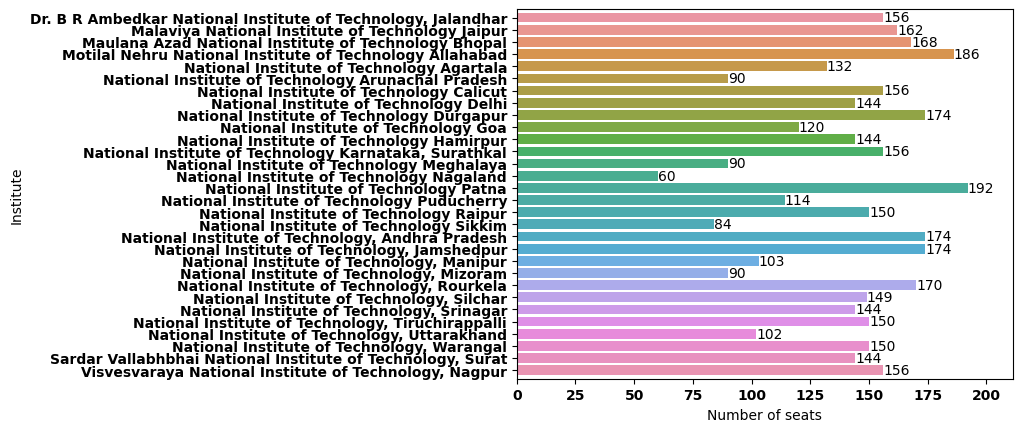

In [142]:
#Plotting the above data using barplot
ax=sns.barplot(data=CSS4NIT_df,x='Number of seats',y='Institute')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Total number of CS 4 year seats based on Seat Type per NIT

In [143]:
TSCSENIT4_df=CSENIT4_df.groupby(by=['Seat Type']).size().reset_index(name='Number of seats')
TSCSENIT4_df

Seat Type  Number of seats
0            EWS              606
1      EWS (PwD)              104
2        OBC-NCL              678
3  OBC-NCL (PwD)              239
4           OPEN              714
5     OPEN (PwD)              379
6             SC              654
7       SC (PwD)              132
8             ST              630
9       ST (PwD)               48

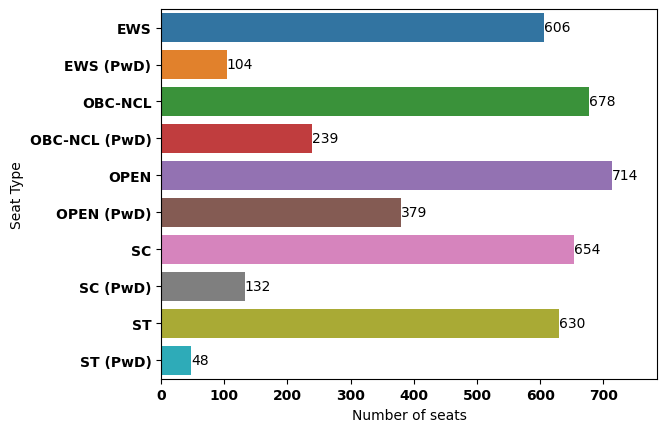

In [144]:
#Plotting the above data using barplot
ax=sns.barplot(data=TSCSENIT4_df,x='Number of seats',y='Seat Type')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Total number of CS 4 year seats based on Gender per NIT

In [145]:
TGCSENIT4_df=CSENIT4_df.groupby(by=['Gender']).size().reset_index(name='Number of seats')
TGCSENIT4_df

Gender  Number of seats
0  Female-only (including Supernumerary)             1728
1                         Gender-Neutral             2456

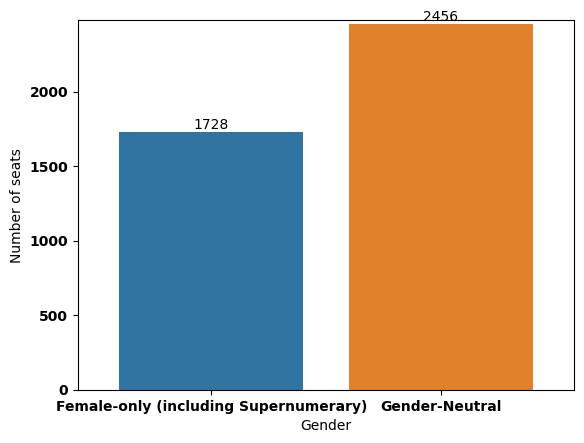

In [146]:
#Plotting the above data using barplot
ax=sns.barplot(data=TGCSENIT4_df,y='Number of seats',x='Gender')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Total number of CS 4 year seats based on Quota per NIT

In [147]:
TQCSENIT4_df=CSENIT4_df.groupby(by=['Quota']).size().reset_index(name='Number of seats')
TQCSENIT4_df

Quota  Number of seats
0    GO               48
1    HS             1838
2    JK               72
3    LA                6
4    OS             2220

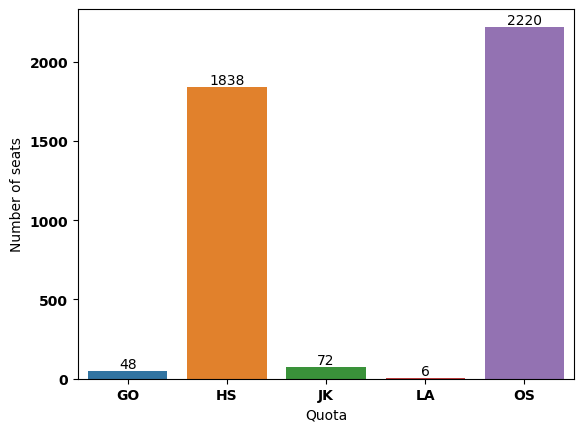

In [148]:
#Plotting the above data using barplot
ax=sns.barplot(data=TQCSENIT4_df,y='Number of seats',x='Quota')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()

# Grouping Seat Type and Quota for CS 4 year program for all NIT's

In [149]:
SQCSNIT4_df=CSENIT4_df.groupby(by=['Seat Type','Quota']).size().reset_index(name='Number of seats')
SQCSNIT4_df

Seat Type Quota  Number of seats
0             EWS    GO                6
1             EWS    HS              258
2             EWS    JK               12
3             EWS    OS              330
4       EWS (PwD)    HS               20
5       EWS (PwD)    OS               84
6         OBC-NCL    GO                6
7         OBC-NCL    HS              300
8         OBC-NCL    JK               12
9         OBC-NCL    OS              360
10  OBC-NCL (PwD)    HS              101
11  OBC-NCL (PwD)    JK                6
12  OBC-NCL (PwD)    OS              132
13           OPEN    GO               12
14           OPEN    HS              324
15           OPEN    JK               12
16           OPEN    LA                6
17           OPEN    OS              360
18     OPEN (PwD)    GO                6
19     OPEN (PwD)    HS              169
20     OPEN (PwD)    JK                6
21     OPEN (PwD)    OS              198
22             SC    GO                6
23             SC    HS              294
24             SC    JK               12
25             SC    OS              342
26       SC (PwD)    HS               42
27       SC (PwD)    OS               90
28             ST    GO               12
29             ST    HS              318
30             ST    JK               12
31             ST    OS              288
32       ST (PwD)    HS               12
33       ST (PwD)    OS               36

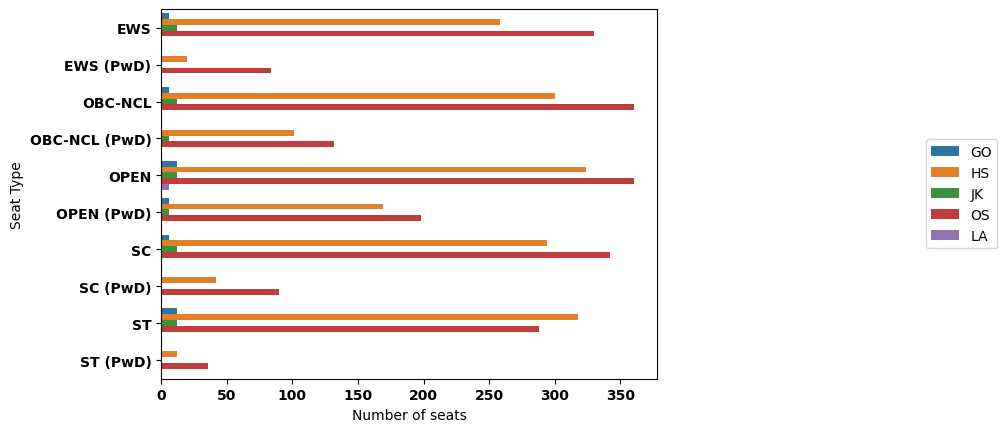

In [150]:
#Plotting the above data using barplot
ax=sns.barplot(data=SQCSNIT4_df,x='Number of seats',y='Seat Type',hue='Quota')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()



# Grouping by Seat Type and Gender for CS 4 year program for all NIT's

In [151]:
SGCSNIT4_df=CSENIT4_df.groupby(by=['Seat Type','Gender']).size().reset_index(name='Number of seats')
SGCSNIT4_df

Seat Type                                 Gender  Number of seats
0             EWS  Female-only (including Supernumerary)              282
1             EWS                         Gender-Neutral              324
2       EWS (PwD)  Female-only (including Supernumerary)               18
3       EWS (PwD)                         Gender-Neutral               86
4         OBC-NCL  Female-only (including Supernumerary)              330
5         OBC-NCL                         Gender-Neutral              348
6   OBC-NCL (PwD)  Female-only (including Supernumerary)               42
7   OBC-NCL (PwD)                         Gender-Neutral              197
8            OPEN  Female-only (including Supernumerary)              348
9            OPEN                         Gender-Neutral              366
10     OPEN (PwD)  Female-only (including Supernumerary)              114
11     OPEN (PwD)                         Gender-Neutral              265
12             SC  Female-only (including Supernumerary)              306
13             SC                         Gender-Neutral              348
14       SC (PwD)  Female-only (including Supernumerary)                6
15       SC (PwD)                         Gender-Neutral              126
16             ST  Female-only (including Supernumerary)              276
17             ST                         Gender-Neutral              354
18       ST (PwD)  Female-only (including Supernumerary)                6
19       ST (PwD)                         Gender-Neutral               42

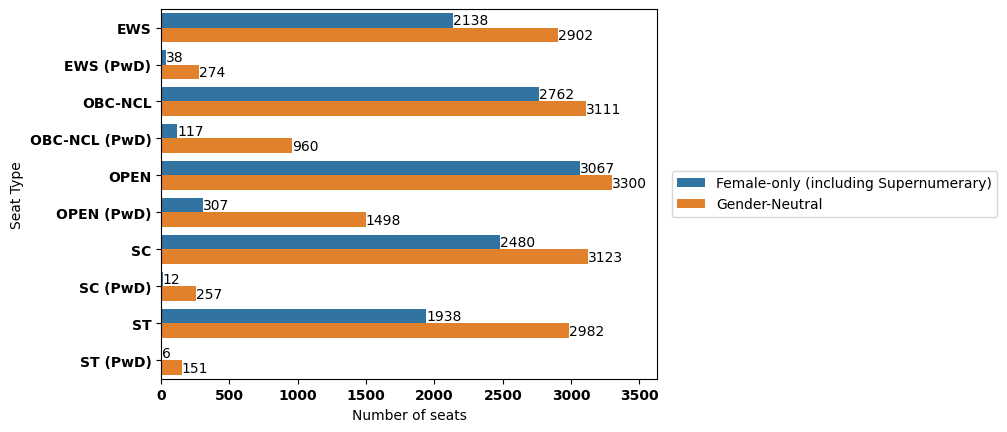

In [152]:
#Plotting the above data using barplot
ax=sns.barplot(data=SGNIT_df,x='Number of seats',y='Seat Type',hue='Gender')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')
for container in ax.containers:
    ax.bar_label(container)
ax.margins(0.1,0.01)
plt.show()



# Grouping by Seat Type , Quota and Gender for CS 4 year program for all NIT's

In [153]:
SQGCSNIT4_df=CSENIT4_df.groupby(by=['Seat Type','Quota','Gender']).size().reset_index(name='Number of seats')
SQGCSNIT4_df

Seat Type Quota                                 Gender  \
0             EWS    GO                         Gender-Neutral   
1             EWS    HS  Female-only (including Supernumerary)   
2             EWS    HS                         Gender-Neutral   
3             EWS    JK  Female-only (including Supernumerary)   
4             EWS    JK                         Gender-Neutral   
5             EWS    OS  Female-only (including Supernumerary)   
6             EWS    OS                         Gender-Neutral   
7       EWS (PwD)    HS                         Gender-Neutral   
8       EWS (PwD)    OS  Female-only (including Supernumerary)   
9       EWS (PwD)    OS                         Gender-Neutral   
10        OBC-NCL    GO                         Gender-Neutral   
11        OBC-NCL    HS  Female-only (including Supernumerary)   
12        OBC-NCL    HS                         Gender-Neutral   
13        OBC-NCL    JK  Female-only (including Supernumerary)   
14        OBC-NCL    JK                         Gender-Neutral   
15        OBC-NCL    OS  Female-only (including Supernumerary)   
16        OBC-NCL    OS                         Gender-Neutral   
17  OBC-NCL (PwD)    HS  Female-only (including Supernumerary)   
18  OBC-NCL (PwD)    HS                         Gender-Neutral   
19  OBC-NCL (PwD)    JK                         Gender-Neutral   
20  OBC-NCL (PwD)    OS  Female-only (including Supernumerary)   
21  OBC-NCL (PwD)    OS                         Gender-Neutral   
22           OPEN    GO  Female-only (including Supernumerary)   
23           OPEN    GO                         Gender-Neutral   
24           OPEN    HS  Female-only (including Supernumerary)   
25           OPEN    HS                         Gender-Neutral   
26           OPEN    JK  Female-only (including Supernumerary)   
27           OPEN    JK                         Gender-Neutral   
28           OPEN    LA                         Gender-Neutral   
29           OPEN    OS  Female-only (including Supernumerary)   
30           OPEN    OS                         Gender-Neutral   
31     OPEN (PwD)    GO                         Gender-Neutral   
32     OPEN (PwD)    HS  Female-only (including Supernumerary)   
33     OPEN (PwD)    HS                         Gender-Neutral   
34     OPEN (PwD)    JK                         Gender-Neutral   
35     OPEN (PwD)    OS  Female-only (including Supernumerary)   
36     OPEN (PwD)    OS                         Gender-Neutral   
37             SC    GO                         Gender-Neutral   
38             SC    HS  Female-only (including Supernumerary)   
39             SC    HS                         Gender-Neutral   
40             SC    JK  Female-only (including Supernumerary)   
41             SC    JK                         Gender-Neutral   
42             SC    OS  Female-only (including Supernumerary)   
43             SC    OS                         Gender-Neutral   
44       SC (PwD)    HS                         Gender-Neutral   
45       SC (PwD)    OS  Female-only (including Supernumerary)   
46       SC (PwD)    OS                         Gender-Neutral   
47             ST    GO  Female-only (including Supernumerary)   
48             ST    GO                         Gender-Neutral   
49             ST    HS  Female-only (including Supernumerary)   
50             ST    HS                         Gender-Neutral   
51             ST    JK  Female-only (including Supernumerary)   
52             ST    JK                         Gender-Neutral   
53             ST    OS  Female-only (including Supernumerary)   
54             ST    OS                         Gender-Neutral   
55       ST (PwD)    HS                         Gender-Neutral   
56       ST (PwD)    OS  Female-only (including Supernumerary)   
57       ST (PwD)    OS                         Gender-Neutral   

    Number of seats  
0                 6  
1               120  
2               138  
3                 6  
4  

# Grouping by Institute(NIT's) and Quota for CS4 year program

In [154]:
IQCSNIT4_df=CSENIT4_df.groupby(by=['Institute','Quota']).size().reset_index(name='Number of seats') 
IQCSNIT4_df

Institute Quota  Number of seats
0   Dr. B R Ambedkar National Institute of Technol...    HS               72
1   Dr. B R Ambedkar National Institute of Technol...    OS               84
2    Malaviya National Institute of Technology Jaipur    HS               78
3    Malaviya National Institute of Technology Jaipur    OS               84
4   Maulana Azad National Institute of Technology ...    HS               78
..                                                ...   ...              ...
57         National Institute of Technology, Warangal    OS               78
58  Sardar Vallabhbhai National Institute of Techn...    HS               66
59  Sardar Vallabhbhai National Institute of Techn...    OS               78
60  Visvesvaraya National Institute of Technology,...    HS               72
61  Visvesvaraya National Institute of Technology,...    OS               84

[62 rows x 3 columns]

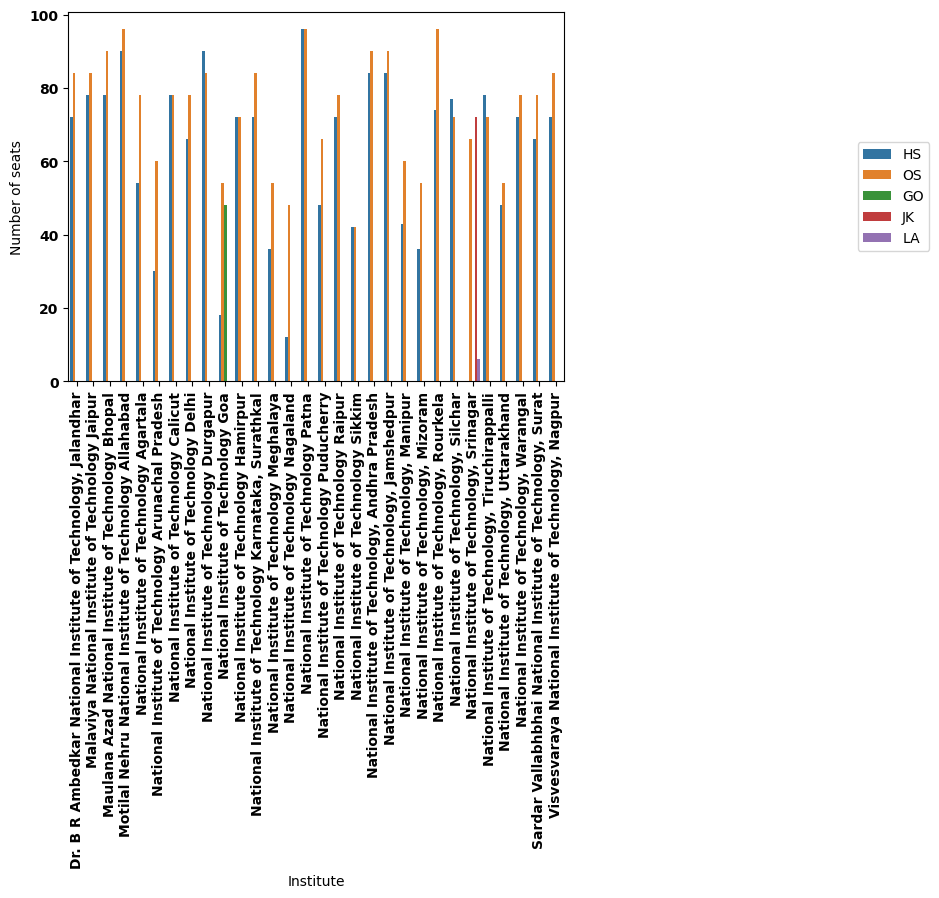

In [155]:
#Plotting the above data using barplot
ax=sns.barplot(data=IQCSNIT4_df,x='Institute',y='Number of seats',hue='Quota')
plt.legend(bbox_to_anchor=(1.75, 0.5),loc='center right') 
plt.xticks(rotation=90,fontweight='bold') 
plt.yticks(fontweight='bold')
plt.show()

# Grouping by Institute(NIT's) and Seat Type for CS 4 year program

In [156]:
ISCSNIT4_df=CSENIT4_df.groupby(by=['Institute','Seat Type']).size().reset_index(name='Number of seats')
ISCSNIT4_df

Institute      Seat Type  \
0    Dr. B R Ambedkar National Institute of Technol...            EWS   
1    Dr. B R Ambedkar National Institute of Technol...        OBC-NCL   
2    Dr. B R Ambedkar National Institute of Technol...  OBC-NCL (PwD)   
3    Dr. B R Ambedkar National Institute of Technol...           OPEN   
4    Dr. B R Ambedkar National Institute of Technol...     OPEN (PwD)   
..                                                 ...            ...   
231  Visvesvaraya National Institute of Technology,...           OPEN   
232  Visvesvaraya National Institute of Technology,...     OPEN (PwD)   
233  Visvesvaraya National Institute of Technology,...             SC   
234  Visvesvaraya National Institute of Technology,...       SC (PwD)   
235  Visvesvaraya National Institute of Technology,...             ST   

     Number of seats  
0                 24  
1                 24  
2                 12  
3                 24  
4                 18  
..               ...  
231               24  
232               12  
233               24  
234                6  
235               24  

[236 rows x 3 columns]

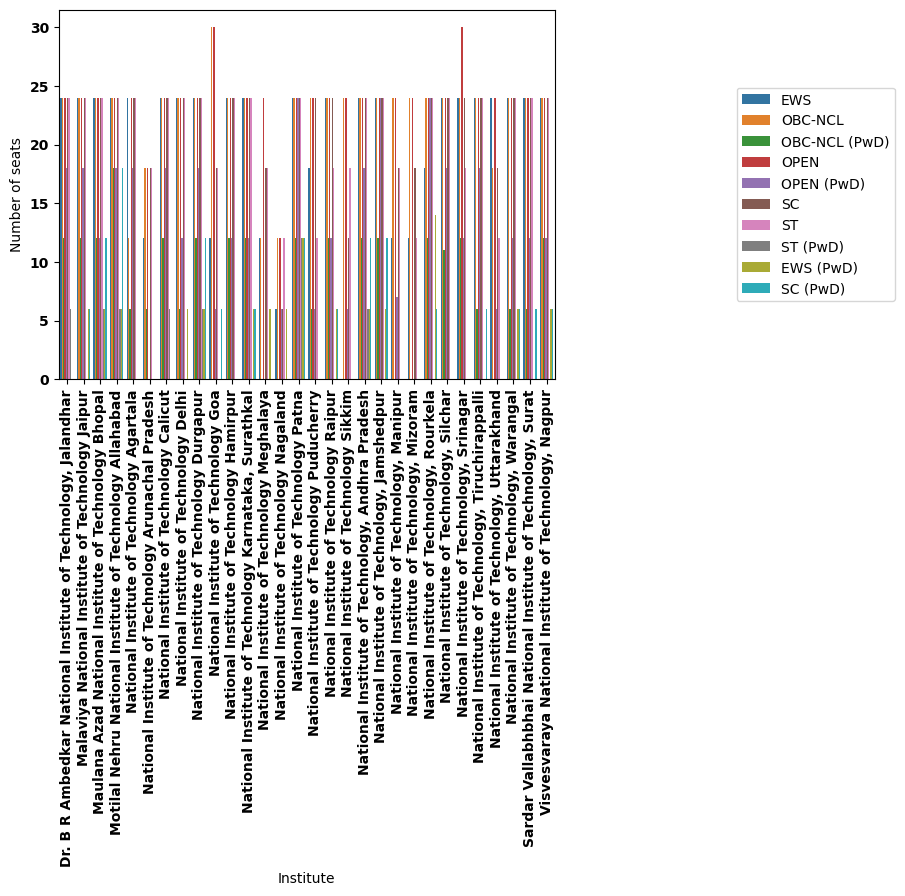

In [157]:
#Plotting the above data using barplot
ax=sns.barplot(data=ISCSNIT4_df,x='Institute',y='Number of seats',hue='Seat Type')
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=90,fontweight='bold') 
plt.yticks(fontweight='bold') 
plt.show()

# Grouping by Institute(NIT's) and Gender for CS 4 year program

In [158]:
IGCSNIT4_df=CSENIT4_df.groupby(by=['Institute','Gender']).size().reset_index(name='Number of seats') 
IGCSNIT4_df

Institute  \
0   Dr. B R Ambedkar National Institute of Technol...   
1   Dr. B R Ambedkar National Institute of Technol...   
2    Malaviya National Institute of Technology Jaipur   
3    Malaviya National Institute of Technology Jaipur   
4   Maulana Azad National Institute of Technology ...   
5   Maulana Azad National Institute of Technology ...   
6   Motilal Nehru National Institute of Technology...   
7   Motilal Nehru National Institute of Technology...   
8           National Institute of Technology Agartala   
9           National Institute of Technology Agartala   
10  National Institute of Technology Arunachal Pra...   
11  National Institute of Technology Arunachal Pra...   
12           National Institute of Technology Calicut   
13           National Institute of Technology Calicut   
14             National Institute of Technology Delhi   
15             National Institute of Technology Delhi   
16          National Institute of Technology Durgapur   
17          National Institute of Technology Durgapur   
18               National Institute of Technology Goa   
19               National Institute of Technology Goa   
20          National Institute of Technology Hamirpur   
21          National Institute of Technology Hamirpur   
22  National Institute of Technology Karnataka, Su...   
23  National Institute of Technology Karnataka, Su...   
24         National Institute of Technology Meghalaya   
25         National Institute of Technology Meghalaya   
26          National Institute of Technology Nagaland   
27          National Institute of Technology Nagaland   
28             National Institute of Technology Patna   
29             National Institute of Technology Patna   
30        National Institute of Technology Puducherry   
31        National Institute of Technology Puducherry   
32            National Institute of Technology Raipur   
33            National Institute of Technology Raipur   
34            National Institute of Technology Sikkim   
35            National Institute of Technology Sikkim   
36   National Institute of Technology, Andhra Pradesh   
37   National Institute of Technology, Andhra Pradesh   
38       National Institute of Technology, Jamshedpur   
39       National Institute of Technology, Jamshedpur   
40          National Institute of Technology, Manipur   
41          National Institute of Technology, Manipur   
42          National Institute of Technology, Mizoram   
43          National Institute of Technology, Mizoram   
44         National Institute of Technology, Rourkela   
45         National Institute of Technology, Rourkela   
46          National Institute of Technology, Silchar   
47          National Institute of Technology, Silchar   
48         National Institute of Technology, Srinagar   
49         National Institute of Technology, Srinagar   
50  National Institute of Technology, Tiruchirappalli   
51  National Institute of Technology, Tiruchirappalli   
52      National Institute of Technology, Uttarakhand   
53      National Institute of Technology, Uttarakhand   
54         National Institute of Technology, Warangal   
55         National Institute of Technology, Warangal   
56  Sardar Vallabhbhai National Institute of Techn...   
57  Sardar Vallabhbhai National Institute of Techn...   
58  Visvesvaraya National Institute of Technology,...   
59  Visvesvaraya National Institute of Technology,...   

                                   Gender  Number of seats  
0   Female-only (including Supernumerary)               66  
1                          Gender-Neutral               90  
2   Female-only (including Supernumerary)               66  
3                          Gender-Neutral               96  
4   Female-only (including Supernumerary)               60  
5                          Gender-Neutral              108  
6   Female-only (including Supernumerary)               84  
7                          Gender-Neutral              102  
8   Female-only (

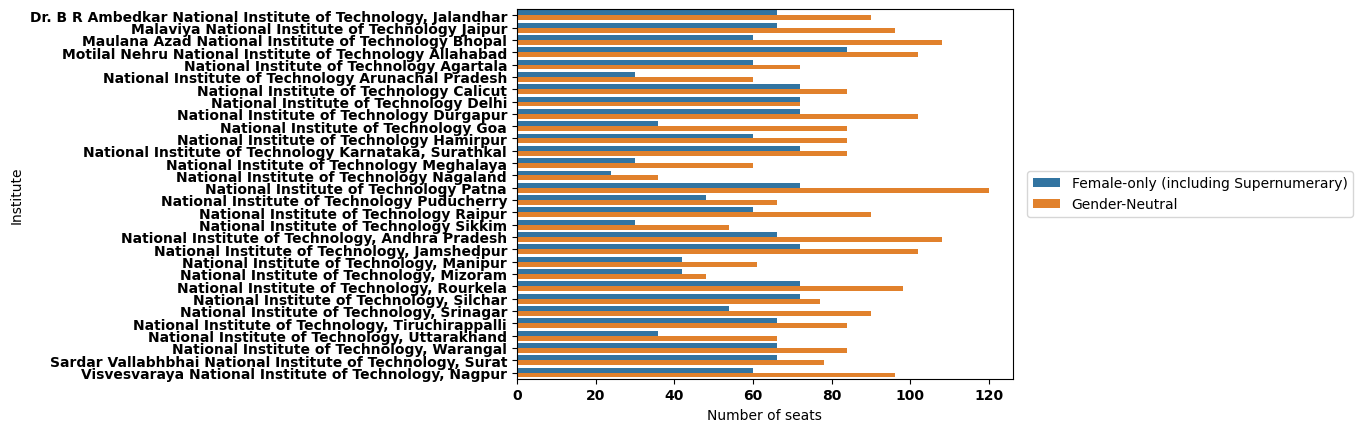

In [159]:
#Plotting the above data using barplot
ax=sns.barplot(data=IGCSNIT4_df,x='Number of seats',y='Institute',hue='Gender') 
plt.legend(bbox_to_anchor=(1.70, 0.5),loc='center right')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold') 
plt.show()

# Grouping by Institute(NIT's) ,Quota and Seat Type

In [160]:
IQSCSNIT4_df=CSENIT4_df.groupby(by=['Institute','Quota','Seat Type']).size().reset_index(name='Number of seats')
IQSCSNIT4_df

Institute Quota      Seat Type  \
0    Dr. B R Ambedkar National Institute of Technol...    HS            EWS   
1    Dr. B R Ambedkar National Institute of Technol...    HS        OBC-NCL   
2    Dr. B R Ambedkar National Institute of Technol...    HS  OBC-NCL (PwD)   
3    Dr. B R Ambedkar National Institute of Technol...    HS           OPEN   
4    Dr. B R Ambedkar National Institute of Technol...    HS     OPEN (PwD)   
..                                                 ...   ...            ...   
420  Visvesvaraya National Institute of Technology,...    OS           OPEN   
421  Visvesvaraya National Institute of Technology,...    OS     OPEN (PwD)   
422  Visvesvaraya National Institute of Technology,...    OS             SC   
423  Visvesvaraya National Institute of Technology,...    OS       SC (PwD)   
424  Visvesvaraya National Institute of Technology,...    OS             ST   

     Number of seats  
0                 12  
1                 12  
2                  6  
3                 12  
4                  6  
..               ...  
420               12  
421                6  
422               12  
423                6  
424               12  

[425 rows x 4 columns]

# Grouping by Institute(NIT's) ,Quota and Gender

In [161]:
IQGCSNIT4_df=CSENIT4_df.groupby(by=['Institute','Quota','Gender']).size().reset_index(name='Number of seats') 
IQGCSNIT4_df

Institute Quota  \
0    Dr. B R Ambedkar National Institute of Technol...    HS   
1    Dr. B R Ambedkar National Institute of Technol...    HS   
2    Dr. B R Ambedkar National Institute of Technol...    OS   
3    Dr. B R Ambedkar National Institute of Technol...    OS   
4     Malaviya National Institute of Technology Jaipur    HS   
..                                                 ...   ...   
118  Sardar Vallabhbhai National Institute of Techn...    OS   
119  Visvesvaraya National Institute of Technology,...    HS   
120  Visvesvaraya National Institute of Technology,...    HS   
121  Visvesvaraya National Institute of Technology,...    OS   
122  Visvesvaraya National Institute of Technology,...    OS   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)               30  
1                           Gender-Neutral               42  
2    Female-only (including Supernumerary)               36  
3                           Gender-Neutral               48  
4    Female-only (including Supernumerary)               30  
..                                     ...              ...  
118                         Gender-Neutral               42  
119  Female-only (including Supernumerary)               30  
120                         Gender-Neutral               42  
121  Female-only (including Supernumerary)               30  
122                         Gender-Neutral               54  

[123 rows x 4 columns]

# Grouping by Institute(NIT's) ,Seat Type and Gender

In [162]:
ISGCSNIT4_df=NIT_df.groupby(by=['Institute','Seat Type','Gender']).size().reset_index(name='Number of seats') 
ISGCSNIT4_df

Institute  Seat Type  \
0    Dr. B R Ambedkar National Institute of Technol...        EWS   
1    Dr. B R Ambedkar National Institute of Technol...        EWS   
2    Dr. B R Ambedkar National Institute of Technol...  EWS (PwD)   
3    Dr. B R Ambedkar National Institute of Technol...  EWS (PwD)   
4    Dr. B R Ambedkar National Institute of Technol...    OBC-NCL   
..                                                 ...        ...   
460  Visvesvaraya National Institute of Technology,...         SC   
461  Visvesvaraya National Institute of Technology,...   SC (PwD)   
462  Visvesvaraya National Institute of Technology,...         ST   
463  Visvesvaraya National Institute of Technology,...         ST   
464  Visvesvaraya National Institute of Technology,...   ST (PwD)   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)              120  
1                           Gender-Neutral              132  
2    Female-only (including Supernumerary)                6  
3                           Gender-Neutral                1  
4    Female-only (including Supernumerary)              132  
..                                     ...              ...  
460                         Gender-Neutral              108  
461                         Gender-Neutral               13  
462  Female-only (including Supernumerary)               84  
463                         Gender-Neutral              108  
464                         Gender-Neutral                6  

[465 rows x 4 columns]

# Analyzing info about my college NIT Delhi

In [163]:
NITD_df=NIT_df.loc[NIT_df['Institute']=='National Institute of Technology Delhi']
NITD_df

Institute  \
4126   National Institute of Technology Delhi   
4127   National Institute of Technology Delhi   
4128   National Institute of Technology Delhi   
4129   National Institute of Technology Delhi   
4130   National Institute of Technology Delhi   
...                                       ...   
53299  National Institute of Technology Delhi   
53300  National Institute of Technology Delhi   
53301  National Institute of Technology Delhi   
53302  National Institute of Technology Delhi   
53303  National Institute of Technology Delhi   

                                   Academic Program Name Quota   Seat Type  \
4126   Civil Engineering (4 Years, Bachelor of Techno...    HS        OPEN   
4127   Civil Engineering (4 Years, Bachelor of Techno...    HS        OPEN   
4128   Civil Engineering (4 Years, Bachelor of Techno...    HS  OPEN (PwD)   
4129   Civil Engineering (4 Years, Bachelor of Techno...    HS         EWS   
4130   Civil Engineering (4 Years, Bachelor of Techno...    HS         EWS   
...                                                  ...   ...         ...   
53299  Mechanical Engineering (4 Years, Bachelor of T...    OS     OBC-NCL   
53300  Mechanical Engineering (4 Years, Bachelor of T...    OS     OBC-NCL   
53301  Mechanical Engineering (4 Years, Bachelor of T...    OS          SC   
53302  Mechanical Engineering (4 Years, Bachelor of T...    OS          SC   
53303  Mechanical Engineering (4 Years, Bachelor of T...    OS          ST   

                                      Gender  Opening Rank  Closing Rank  \
4126                          Gender-Neutral         17922         33847   
4127   Female-only (including Supernumerary)         32784         32784   
4128                          Gender-Neutral           821           821   
4129                          Gender-Neutral          6355          6355   
4130   Female-only (including Supernumerary)         10156         10156   
...                                      ...           ...           ...   
53299                         Gender-Neutral          7442          9797   
53300  Female-only (including Supernumerary)         16131         16568   
53301                         Gender-Neutral          4012          4544   
53302  Female-only (including Supernumerary)          5033          5033   
53303                         Gender-Neutral          1591          1618   

       Round  
4126       1  
4127       1  
4128       1  
4129       1  
4130       1  
...      ...  
53299      6  
53300      6  
53301      6  
53302      6  
53303      6  

[628 rows x 8 columns]

# Counting number of distinct values per column 

In [164]:
NITD_df.nunique(axis=0)

Institute                  1
Academic Program Name      5
Quota                      2
Seat Type                  9
Gender                     2
Opening Rank             229
Closing Rank             308
Round                      6
dtype: int64

### From the above info it is clear that:
1. Total 5 academic programs were offered.
2. There are 9 Seat Type

# Total number of seats offered by NIT Delhi

In [165]:
NITD_df.groupby('Seat Type').size().sum()

628

###### Total of 628 seats are offered

# Total number of seats offered by NIT Delhi based on Seat Type

In [166]:
SNITD_df=NITD_df.groupby('Seat Type').size().reset_index(name='Number of seats')
SNITD_df

Seat Type  Number of seats
0            EWS              102
1      EWS (PwD)               18
2        OBC-NCL              114
3  OBC-NCL (PwD)               22
4           OPEN              120
5     OPEN (PwD)               36
6             SC              120
7             ST               90
8       ST (PwD)                6

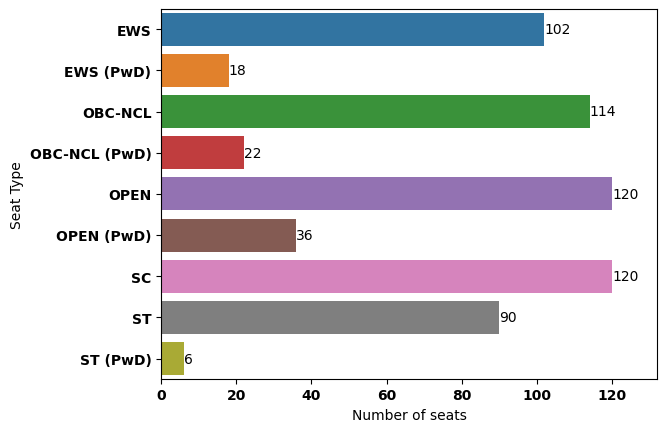

In [167]:
#Plotting the above data using barplot
ax=sns.barplot(data=SNITD_df,x='Number of seats',y='Seat Type')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel('Seat Type')
plt.xlabel('Number of seats')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)
plt.show()

# Total number of seats offered by NIT Delhi based on Gender

In [168]:
GNITD_df=NITD_df.groupby('Gender').size().reset_index(name='Number of seats')
GNITD_df

Gender  Number of seats
0  Female-only (including Supernumerary)              270
1                         Gender-Neutral              358

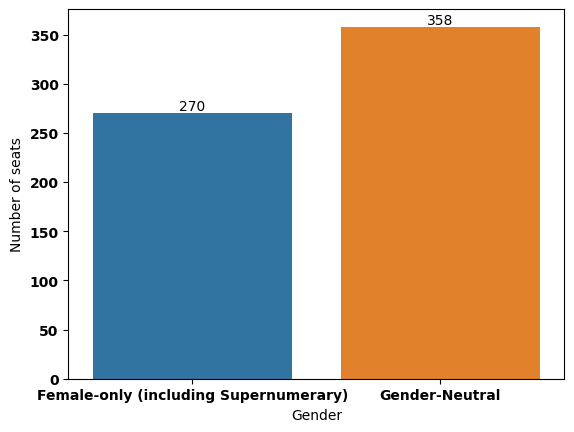

In [169]:
#Plotting the above data using barplot
ax=sns.barplot(data=GNITD_df,y='Number of seats',x='Gender')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])

plt.show()

# Total number of seats offered by NIT Delhi based on Quota

In [170]:
QNITD_df=NITD_df.groupby('Quota').size().reset_index(name='Number of seats')
QNITD_df

Quota  Number of seats
0    HS              310
1    OS              318

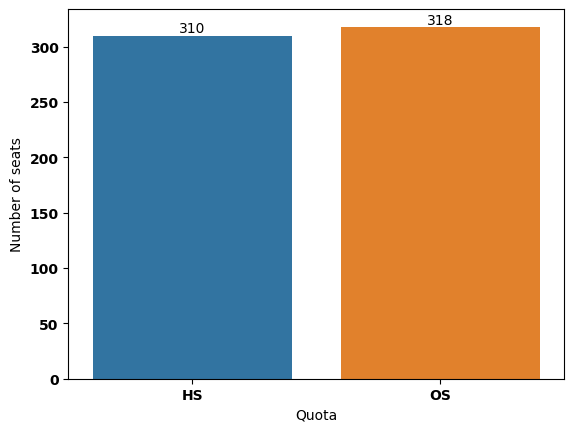

In [171]:
#Plotting the above data using barplot
ax=sns.barplot(data=QNITD_df,y='Number of seats',x='Quota')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])

plt.show()

# Total number of seats offered by NIT Delhi based on Academic Program Name

In [172]:
ANITD_df=NITD_df.groupby('Academic Program Name').size().reset_index(name='Number of seats')
ANITD_df

Academic Program Name  Number of seats
0  Civil Engineering (4 Years, Bachelor of Techno...              108
1  Computer Science and Engineering (4 Years, Bac...              144
2  Electrical Engineering (4 Years, Bachelor of T...              132
3  Electronics and Communication Engineering (4 Y...              136
4  Mechanical Engineering (4 Years, Bachelor of T...              108

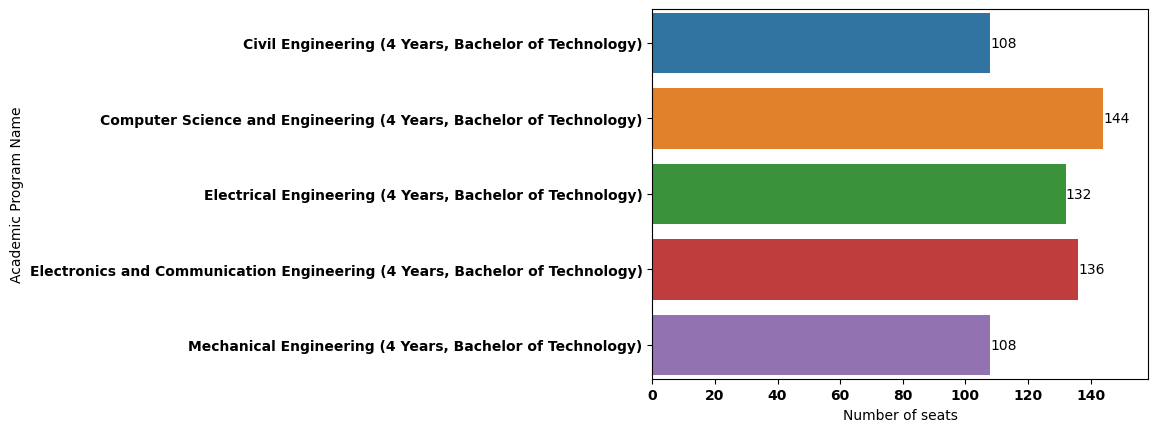

In [173]:
#Plotting the above data using barplot
ax=sns.barplot(data=ANITD_df,x='Number of seats',y='Academic Program Name')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
ax.bar_label(ax.containers[0])
ax.margins(0.1,0.01)

plt.show()

# Grouping by Academic Program Name and Quota for NIT Delhi 

In [174]:
AQNITD_df=NITD_df.groupby(by=['Academic Program Name','Quota']).size().reset_index(name='Number of seats')
AQNITD_df

Academic Program Name Quota  Number of seats
0  Civil Engineering (4 Years, Bachelor of Techno...    HS               60
1  Civil Engineering (4 Years, Bachelor of Techno...    OS               48
2  Computer Science and Engineering (4 Years, Bac...    HS               66
3  Computer Science and Engineering (4 Years, Bac...    OS               78
4  Electrical Engineering (4 Years, Bachelor of T...    HS               66
5  Electrical Engineering (4 Years, Bachelor of T...    OS               66
6  Electronics and Communication Engineering (4 Y...    HS               70
7  Electronics and Communication Engineering (4 Y...    OS               66
8  Mechanical Engineering (4 Years, Bachelor of T...    HS               48
9  Mechanical Engineering (4 Years, Bachelor of T...    OS               60

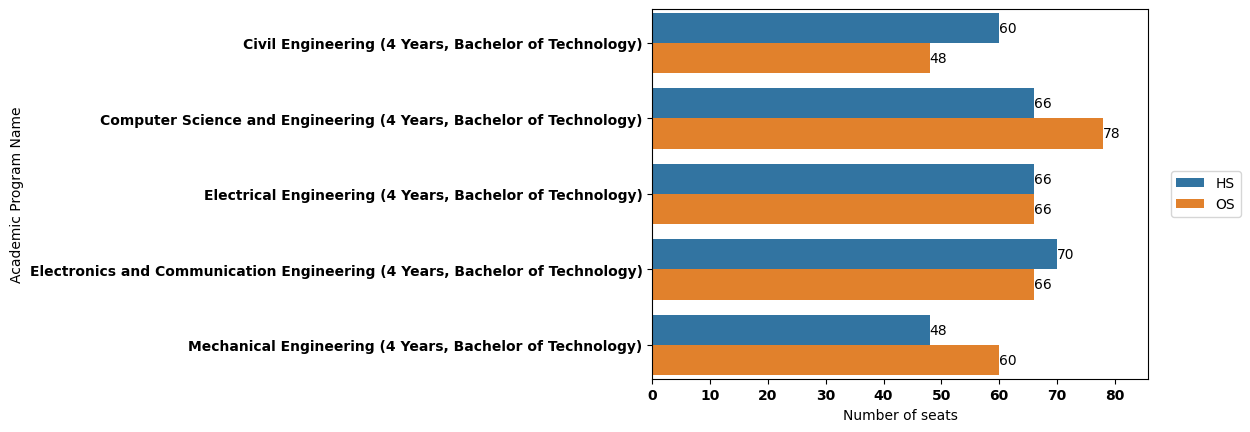

In [175]:
#Plotting the above data using barplot
ax=sns.barplot(data=AQNITD_df,x='Number of seats',y='Academic Program Name',hue='Quota')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 0.5),loc='center right')
for container in ax.containers:
    ax.bar_label(container)
ax.margins(0.1,0.01)

plt.show()

# Grouping by Academic Program Name and Seat Type for NIT Delhi

In [176]:
ASNITD_df=NITD_df.groupby(by=['Academic Program Name','Seat Type']).size().reset_index(name='Number of seats')
ASNITD_df

Academic Program Name      Seat Type  \
0   Civil Engineering (4 Years, Bachelor of Techno...            EWS   
1   Civil Engineering (4 Years, Bachelor of Techno...        OBC-NCL   
2   Civil Engineering (4 Years, Bachelor of Techno...  OBC-NCL (PwD)   
3   Civil Engineering (4 Years, Bachelor of Techno...           OPEN   
4   Civil Engineering (4 Years, Bachelor of Techno...     OPEN (PwD)   
5   Civil Engineering (4 Years, Bachelor of Techno...             SC   
6   Civil Engineering (4 Years, Bachelor of Techno...             ST   
7   Computer Science and Engineering (4 Years, Bac...            EWS   
8   Computer Science and Engineering (4 Years, Bac...      EWS (PwD)   
9   Computer Science and Engineering (4 Years, Bac...        OBC-NCL   
10  Computer Science and Engineering (4 Years, Bac...  OBC-NCL (PwD)   
11  Computer Science and Engineering (4 Years, Bac...           OPEN   
12  Computer Science and Engineering (4 Years, Bac...     OPEN (PwD)   
13  Computer Science and Engineering (4 Years, Bac...             SC   
14  Computer Science and Engineering (4 Years, Bac...             ST   
15  Electrical Engineering (4 Years, Bachelor of T...            EWS   
16  Electrical Engineering (4 Years, Bachelor of T...      EWS (PwD)   
17  Electrical Engineering (4 Years, Bachelor of T...        OBC-NCL   
18  Electrical Engineering (4 Years, Bachelor of T...  OBC-NCL (PwD)   
19  Electrical Engineering (4 Years, Bachelor of T...           OPEN   
20  Electrical Engineering (4 Years, Bachelor of T...     OPEN (PwD)   
21  Electrical Engineering (4 Years, Bachelor of T...             SC   
22  Electrical Engineering (4 Years, Bachelor of T...             ST   
23  Electronics and Communication Engineering (4 Y...            EWS   
24  Electronics and Communication Engineering (4 Y...      EWS (PwD)   
25  Electronics and Communication Engineering (4 Y...        OBC-NCL   
26  Electronics and Communication Engineering (4 Y...  OBC-NCL (PwD)   
27  Electronics and Communication Engineering (4 Y...           OPEN   
28  Electronics and Communication Engineering (4 Y...     OPEN (PwD)   
29  Electronics and Communication Engineering (4 Y...             SC   
30  Electronics and Communication Engineering (4 Y...             ST   
31  Electronics and Communication Engineering (4 Y...       ST (PwD)   
32  Mechanical Engineering (4 Years, Bachelor of T...            EWS   
33  Mechanical Engineering (4 Years, Bachelor of T...        OBC-NCL   
34  Mechanical Engineering (4 Years, Bachelor of T...           OPEN   
35  Mechanical Engineering (4 Years, Bachelor of T...     OPEN (PwD)   
36  Mechanical Engineering (4 Years, Bachelor of T...             SC   
37  Mechanical Engineering (4 Years, Bachelor of T...             ST   

    Number of seats  
0                18  
1                18  
2                 6  
3                24  
4                 6  
5                24  
6                12  
7                24  
8                 6  
9                24  
10                6  
11               24  
12               12  
13               24  
14               24  
15               24  
16                6  
17               24  
18                6  
19               24  
20                6  
21               24  
22               18  
23               18  
24                6  
25               24  
26                4  
27               24  
28                6  
29               24  
30               24  
31                6  
32               18  
33               24  
34               24  
35                6  
36               24  
37               12

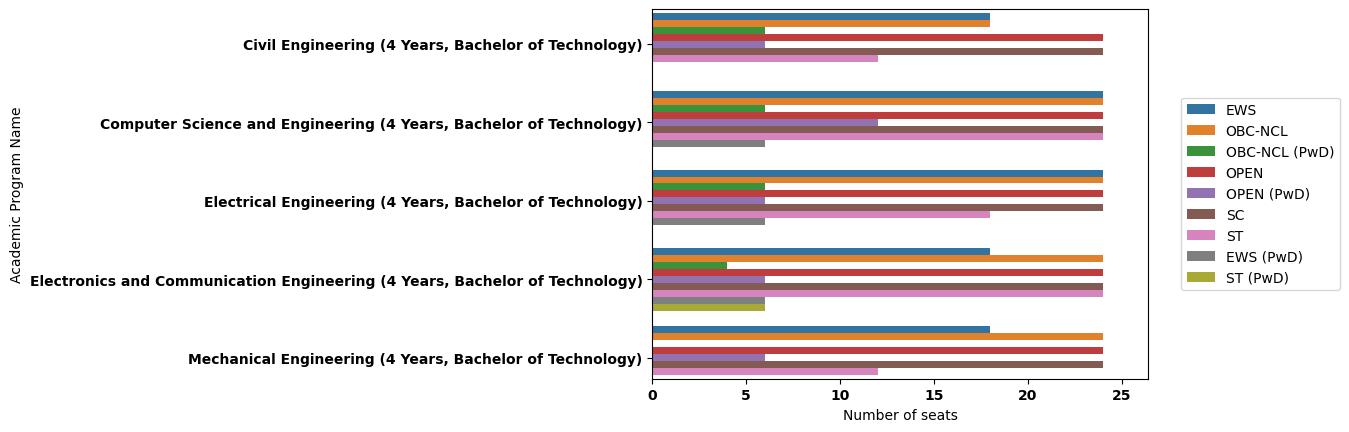

In [177]:
#Plotting the above data using barplot
ax=sns.barplot(data=ASNITD_df,x='Number of seats',y='Academic Program Name',hue='Seat Type')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.4, 0.5),loc='center right')
ax.margins(0.1,0.01)

plt.show()

# Grouping by Academic Program Name and Gender for NIT Delhi

In [178]:
AGNITD_df=NITD_df.groupby(by=['Academic Program Name','Gender']).size().reset_index(name='Number of seats')
AGNITD_df

Academic Program Name  \
0  Civil Engineering (4 Years, Bachelor of Techno...   
1  Civil Engineering (4 Years, Bachelor of Techno...   
2  Computer Science and Engineering (4 Years, Bac...   
3  Computer Science and Engineering (4 Years, Bac...   
4  Electrical Engineering (4 Years, Bachelor of T...   
5  Electrical Engineering (4 Years, Bachelor of T...   
6  Electronics and Communication Engineering (4 Y...   
7  Electronics and Communication Engineering (4 Y...   
8  Mechanical Engineering (4 Years, Bachelor of T...   
9  Mechanical Engineering (4 Years, Bachelor of T...   

                                  Gender  Number of seats  
0  Female-only (including Supernumerary)               42  
1                         Gender-Neutral               66  
2  Female-only (including Supernumerary)               72  
3                         Gender-Neutral               72  
4  Female-only (including Supernumerary)               54  
5                         Gender-Neutral               78  
6  Female-only (including Supernumerary)               60  
7                         Gender-Neutral               76  
8  Female-only (including Supernumerary)               42  
9                         Gender-Neutral               66

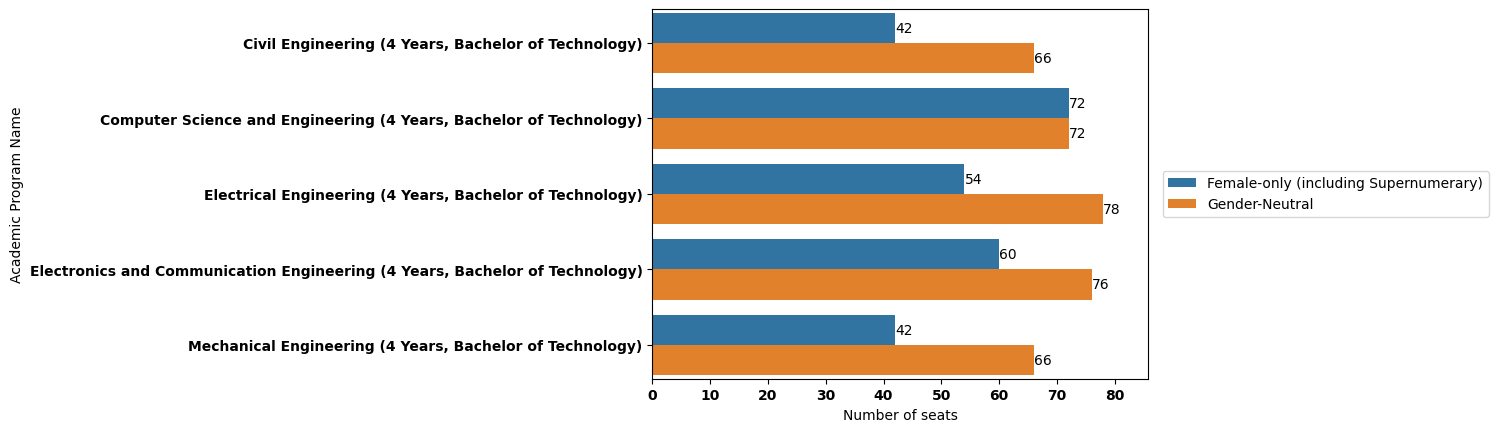

In [179]:
#Plotting the above data using barplot
ax=sns.barplot(data=AGNITD_df,x='Number of seats',y='Academic Program Name',hue='Gender')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.7, 0.5),loc='center right')
for container in ax.containers:
    ax.bar_label(container)
ax.margins(0.1,0.01)

plt.show()

# Grouping by Quota and Seat Type for NIT Delhi

In [180]:
QSNITD_df=NITD_df.groupby(by=['Quota','Seat Type']).size().reset_index(name='Number of seats')
QSNITD_df

Quota      Seat Type  Number of seats
0     HS            EWS               54
1     HS        OBC-NCL               60
2     HS  OBC-NCL (PwD)                4
3     HS           OPEN               60
4     HS     OPEN (PwD)               24
5     HS             SC               60
6     HS             ST               48
7     OS            EWS               48
8     OS      EWS (PwD)               18
9     OS        OBC-NCL               54
10    OS  OBC-NCL (PwD)               18
11    OS           OPEN               60
12    OS     OPEN (PwD)               12
13    OS             SC               60
14    OS             ST               42
15    OS       ST (PwD)                6

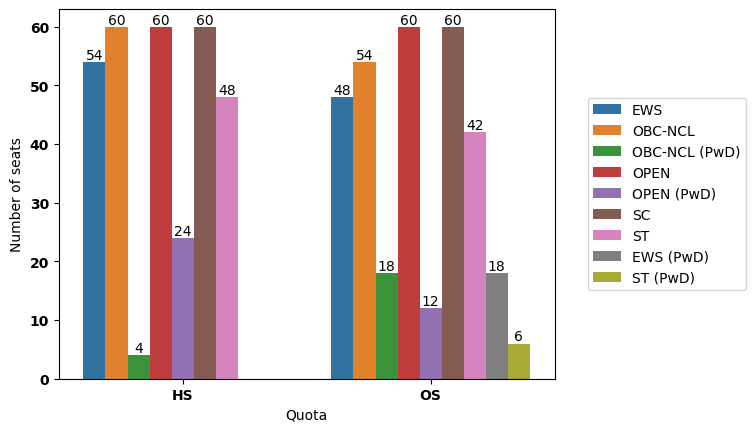

In [181]:
#Plotting the above data using barplot
ax=sns.barplot(data=QSNITD_df,y='Number of seats',x='Quota',hue='Seat Type')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.4, 0.5),loc='center right')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Grouping by Quota and Gender for NIT Delhi

In [182]:
QGNITD_df=NITD_df.groupby(by=['Quota','Gender']).size().reset_index(name='Number of seats')
QGNITD_df

Quota                                 Gender  Number of seats
0    HS  Female-only (including Supernumerary)              132
1    HS                         Gender-Neutral              178
2    OS  Female-only (including Supernumerary)              138
3    OS                         Gender-Neutral              180

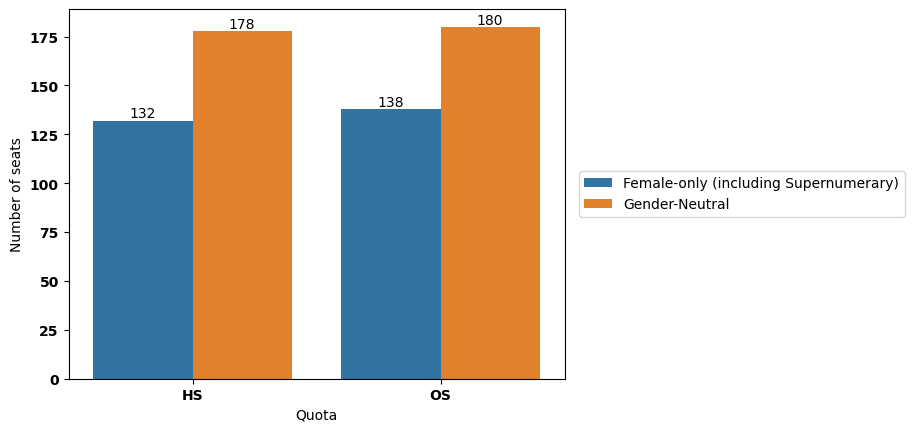

In [183]:
#Plotting the above data using barplot
ax=sns.barplot(data=QGNITD_df,y='Number of seats',x='Quota',hue='Gender')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.7, 0.5),loc='center right')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Grouping by Seat Type and Gender for NIT Delhi

In [184]:
SGNITD_df=NITD_df.groupby(by=['Seat Type','Gender']).size().reset_index(name='Number of seats')
SGNITD_df

Seat Type                                 Gender  Number of seats
0             EWS  Female-only (including Supernumerary)               42
1             EWS                         Gender-Neutral               60
2       EWS (PwD)  Female-only (including Supernumerary)                6
3       EWS (PwD)                         Gender-Neutral               12
4         OBC-NCL  Female-only (including Supernumerary)               54
5         OBC-NCL                         Gender-Neutral               60
6   OBC-NCL (PwD)  Female-only (including Supernumerary)                6
7   OBC-NCL (PwD)                         Gender-Neutral               16
8            OPEN  Female-only (including Supernumerary)               60
9            OPEN                         Gender-Neutral               60
10     OPEN (PwD)  Female-only (including Supernumerary)                6
11     OPEN (PwD)                         Gender-Neutral               30
12             SC  Female-only (including Supernumerary)               60
13             SC                         Gender-Neutral               60
14             ST  Female-only (including Supernumerary)               36
15             ST                         Gender-Neutral               54
16       ST (PwD)                         Gender-Neutral                6

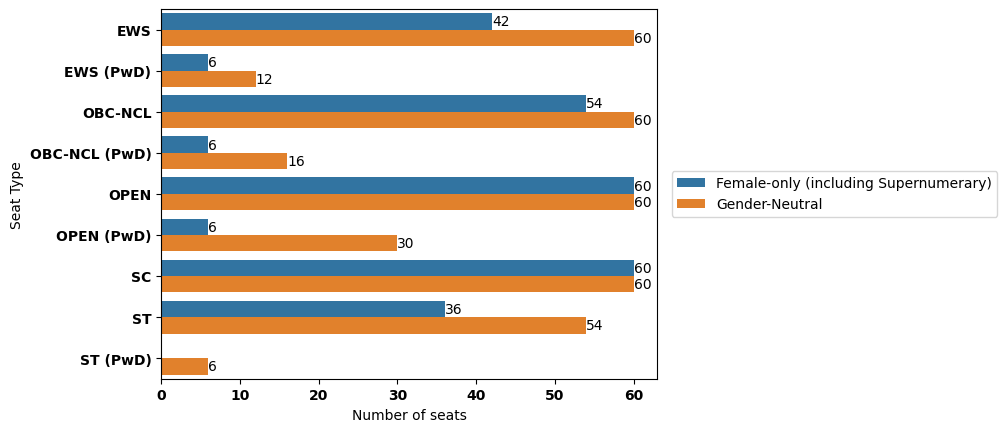

In [185]:
#Plotting the above data using barplot
ax=sns.barplot(data=SGNITD_df,x='Number of seats',y='Seat Type',hue='Gender')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(bbox_to_anchor=(1.7, 0.5),loc='center right')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Grouping by Academic Program Name , Quota and Seat Type for NIT Delhi

In [186]:
AQSNITD_df=NITD_df.groupby(by=['Academic Program Name','Quota','Seat Type']).size().reset_index(name='Number of seats')
AQSNITD_df

Academic Program Name Quota   Seat Type  \
0   Civil Engineering (4 Years, Bachelor of Techno...    HS         EWS   
1   Civil Engineering (4 Years, Bachelor of Techno...    HS     OBC-NCL   
2   Civil Engineering (4 Years, Bachelor of Techno...    HS        OPEN   
3   Civil Engineering (4 Years, Bachelor of Techno...    HS  OPEN (PwD)   
4   Civil Engineering (4 Years, Bachelor of Techno...    HS          SC   
..                                                ...   ...         ...   
59  Mechanical Engineering (4 Years, Bachelor of T...    OS     OBC-NCL   
60  Mechanical Engineering (4 Years, Bachelor of T...    OS        OPEN   
61  Mechanical Engineering (4 Years, Bachelor of T...    OS  OPEN (PwD)   
62  Mechanical Engineering (4 Years, Bachelor of T...    OS          SC   
63  Mechanical Engineering (4 Years, Bachelor of T...    OS          ST   

    Number of seats  
0                12  
1                12  
2                12  
3                 6  
4                12  
..              ...  
59               12  
60               12  
61                6  
62               12  
63                6  

[64 rows x 4 columns]

# Grouping by Academic Program Name , Quota and Gender for NIT Delhi

In [187]:
AQGNITD_df=NITD_df.groupby(by=['Academic Program Name','Quota','Gender']).size().reset_index(name='Number of seats')
AQGNITD_df

Academic Program Name Quota  \
0   Civil Engineering (4 Years, Bachelor of Techno...    HS   
1   Civil Engineering (4 Years, Bachelor of Techno...    HS   
2   Civil Engineering (4 Years, Bachelor of Techno...    OS   
3   Civil Engineering (4 Years, Bachelor of Techno...    OS   
4   Computer Science and Engineering (4 Years, Bac...    HS   
5   Computer Science and Engineering (4 Years, Bac...    HS   
6   Computer Science and Engineering (4 Years, Bac...    OS   
7   Computer Science and Engineering (4 Years, Bac...    OS   
8   Electrical Engineering (4 Years, Bachelor of T...    HS   
9   Electrical Engineering (4 Years, Bachelor of T...    HS   
10  Electrical Engineering (4 Years, Bachelor of T...    OS   
11  Electrical Engineering (4 Years, Bachelor of T...    OS   
12  Electronics and Communication Engineering (4 Y...    HS   
13  Electronics and Communication Engineering (4 Y...    HS   
14  Electronics and Communication Engineering (4 Y...    OS   
15  Electronics and Communication Engineering (4 Y...    OS   
16  Mechanical Engineering (4 Years, Bachelor of T...    HS   
17  Mechanical Engineering (4 Years, Bachelor of T...    HS   
18  Mechanical Engineering (4 Years, Bachelor of T...    OS   
19  Mechanical Engineering (4 Years, Bachelor of T...    OS   

                                   Gender  Number of seats  
0   Female-only (including Supernumerary)               24  
1                          Gender-Neutral               36  
2   Female-only (including Supernumerary)               18  
3                          Gender-Neutral               30  
4   Female-only (including Supernumerary)               30  
5                          Gender-Neutral               36  
6   Female-only (including Supernumerary)               42  
7                          Gender-Neutral               36  
8   Female-only (including Supernumerary)               30  
9                          Gender-Neutral               36  
10  Female-only (including Supernumerary)               24  
11                         Gender-Neutral               42  
12  Female-only (including Supernumerary)               30  
13                         Gender-Neutral               40  
14  Female-only (including Supernumerary)               30  
15                         Gender-Neutral               36  
16  Female-only (including Supernumerary)               18  
17                         Gender-Neutral               30  
18  Female-only (including Supernumerary)               24  
19                         Gender-Neutral               36

# Grouping by Academic Program Name, Seat Type and Gender for NIT Delhi

In [188]:
ASGNITD_df=NITD_df.groupby(by=['Academic Program Name','Seat Type','Gender']).size().reset_index(name='Number of seats')
ASGNITD_df

Academic Program Name      Seat Type  \
0   Civil Engineering (4 Years, Bachelor of Techno...            EWS   
1   Civil Engineering (4 Years, Bachelor of Techno...            EWS   
2   Civil Engineering (4 Years, Bachelor of Techno...        OBC-NCL   
3   Civil Engineering (4 Years, Bachelor of Techno...        OBC-NCL   
4   Civil Engineering (4 Years, Bachelor of Techno...  OBC-NCL (PwD)   
..                                                ...            ...   
58  Mechanical Engineering (4 Years, Bachelor of T...           OPEN   
59  Mechanical Engineering (4 Years, Bachelor of T...     OPEN (PwD)   
60  Mechanical Engineering (4 Years, Bachelor of T...             SC   
61  Mechanical Engineering (4 Years, Bachelor of T...             SC   
62  Mechanical Engineering (4 Years, Bachelor of T...             ST   

                                   Gender  Number of seats  
0   Female-only (including Supernumerary)                6  
1                          Gender-Neutral               12  
2   Female-only (including Supernumerary)                6  
3                          Gender-Neutral               12  
4                          Gender-Neutral                6  
..                                    ...              ...  
58                         Gender-Neutral               12  
59                         Gender-Neutral                6  
60  Female-only (including Supernumerary)               12  
61                         Gender-Neutral               12  
62                         Gender-Neutral               12  

[63 rows x 4 columns]

# Grouping by Quota, Seat Type and Gender for NIT Delhi

In [189]:
QSGNITD_df=NITD_df.groupby(by=['Quota','Seat Type','Gender']).size().reset_index(name='Number of seats')
QSGNITD_df

Quota      Seat Type                                 Gender  \
0     HS            EWS  Female-only (including Supernumerary)   
1     HS            EWS                         Gender-Neutral   
2     HS        OBC-NCL  Female-only (including Supernumerary)   
3     HS        OBC-NCL                         Gender-Neutral   
4     HS  OBC-NCL (PwD)                         Gender-Neutral   
5     HS           OPEN  Female-only (including Supernumerary)   
6     HS           OPEN                         Gender-Neutral   
7     HS     OPEN (PwD)                         Gender-Neutral   
8     HS             SC  Female-only (including Supernumerary)   
9     HS             SC                         Gender-Neutral   
10    HS             ST  Female-only (including Supernumerary)   
11    HS             ST                         Gender-Neutral   
12    OS            EWS  Female-only (including Supernumerary)   
13    OS            EWS                         Gender-Neutral   
14    OS      EWS (PwD)  Female-only (including Supernumerary)   
15    OS      EWS (PwD)                         Gender-Neutral   
16    OS        OBC-NCL  Female-only (including Supernumerary)   
17    OS        OBC-NCL                         Gender-Neutral   
18    OS  OBC-NCL (PwD)  Female-only (including Supernumerary)   
19    OS  OBC-NCL (PwD)                         Gender-Neutral   
20    OS           OPEN  Female-only (including Supernumerary)   
21    OS           OPEN                         Gender-Neutral   
22    OS     OPEN (PwD)  Female-only (including Supernumerary)   
23    OS     OPEN (PwD)                         Gender-Neutral   
24    OS             SC  Female-only (including Supernumerary)   
25    OS             SC                         Gender-Neutral   
26    OS             ST  Female-only (including Supernumerary)   
27    OS             ST                         Gender-Neutral   
28    OS       ST (PwD)                         Gender-Neutral   

    Number of seats  
0                24  
1                30  
2                30  
3                30  
4                 4  
5                30  
6                30  
7                24  
8                30  
9                30  
10               18  
11               30  
12               18  
13               30  
14                6  
15               12  
16               24  
17               30  
18                6  
19               12  
20               30  
21               30  
22                6  
23                6  
24               30  
25               30  
26               18  
27               24  
28                6

# Grouping by Academic Program Name , Quota , Seat Type and Gender for NIT Delhi

In [190]:
AQSGNITD_df=NITD_df.groupby(by=['Academic Program Name','Quota','Seat Type','Gender']).size().reset_index(name='Number of seats')
AQSGNITD_df

Academic Program Name Quota   Seat Type  \
0    Civil Engineering (4 Years, Bachelor of Techno...    HS         EWS   
1    Civil Engineering (4 Years, Bachelor of Techno...    HS         EWS   
2    Civil Engineering (4 Years, Bachelor of Techno...    HS     OBC-NCL   
3    Civil Engineering (4 Years, Bachelor of Techno...    HS     OBC-NCL   
4    Civil Engineering (4 Years, Bachelor of Techno...    HS        OPEN   
..                                                 ...   ...         ...   
100  Mechanical Engineering (4 Years, Bachelor of T...    OS        OPEN   
101  Mechanical Engineering (4 Years, Bachelor of T...    OS  OPEN (PwD)   
102  Mechanical Engineering (4 Years, Bachelor of T...    OS          SC   
103  Mechanical Engineering (4 Years, Bachelor of T...    OS          SC   
104  Mechanical Engineering (4 Years, Bachelor of T...    OS          ST   

                                    Gender  Number of seats  
0    Female-only (including Supernumerary)                6  
1                           Gender-Neutral                6  
2    Female-only (including Supernumerary)                6  
3                           Gender-Neutral                6  
4    Female-only (including Supernumerary)                6  
..                                     ...              ...  
100                         Gender-Neutral                6  
101                         Gender-Neutral                6  
102  Female-only (including Supernumerary)                6  
103                         Gender-Neutral                6  
104                         Gender-Neutral                6  

[105 rows x 5 columns]

# End